# <span style="color:purple"> Projet 7 : Effectuez une prédiction de revenus </span>

## Importation des données

Nous importons les données et les librairies.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
import scipy
import seaborn as sns
import scipy.stats as st
from collections import Counter

## Téléchargement des données :

In [2]:
world_income = pd.read_csv("DATA/World_income_data-projet7.csv" , decimal =',')
world_income

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


In [3]:
gini=pd.read_excel('DATA/Gini_WIID_31MAY2021_0.xlsx') # coefficient de gini
gini

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
0,1,Afghanistan,AFG,AF,2008,29.00,NaN,NaN,NaN,NaN,...,27722282.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
1,2,Afghanistan,AFG,AF,2012,33.00,NaN,NaN,NaN,NaN,...,31161378.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
2,3,Afghanistan,AFG,AF,2017,31.00,NaN,NaN,NaN,NaN,...,36296108.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...,Yes
3,4,Albania,ALB,AL,1996,27.01,NaN,NaN,NaN,NaN,...,3098699.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
4,5,Albania,ALB,AL,2002,31.74,NaN,NaN,NaN,NaN,...,3126183.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,21249,Slovakia,SVK,SK,2019,30.68,17.17,15.08,15.67,3.80,...,5457012.0,New 2021,High,13,Eurostat,Eurostat microdata,Own construction based on microdata,European Union Statistics on Income and Living...,NaN,No
20671,21250,Slovakia,SVK,SK,2019,26.39,13.39,11.81,12.62,2.97,...,5457012.0,New 2021,High,13,Eurostat,Eurostat microdata,Own construction based on microdata,European Union Statistics on Income and Living...,NaN,No
20672,21251,Slovakia,SVK,SK,2019,24.83,11.84,10.24,10.38,2.60,...,5457012.0,New 2021,High,13,Eurostat,Eurostat microdata,Own construction based on microdata,European Union Statistics on Income and Living...,NaN,No
20673,21252,Slovakia,SVK,SK,2019,25.69,12.48,10.79,10.84,2.74,...,5457012.0,New 2021,High,13,Eurostat,Eurostat microdata,Own construction based on microdata,European Union Statistics on Income and Living...,NaN,No


In [4]:
gini_info = gini.copy() # stockage des informations contenues dans le df

In [5]:
pop=pd.read_csv("DATA/POP_WB.csv", decimal=',', header=0) 
pop

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,12412311.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835428
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25758872.0,32692153.0,33149720.0,33641007.0,34166976.0,34730604.0,...,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44616626
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47351.0,59684.0,59557.0,59109.0,58367.0,57490.0,...,55669,55717,55791,55806,55739,55617,55461,55312,55197,55103
4,"Population, total",SP.POP.TOTL,Andorra,AND,54508.0,76250.0,78871.0,80995.0,82682.0,83860.0,...,82427,80770,79213,77993,77295,76997,77008,77146,77265,77354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> # Mission 1 :
Résumez les données utilisées
>- année(s) des données utilisées ;
>- nombre de pays présents ;
>- population couverte par l'analyse (en termes de pourcentage de la population mondiale).

Les données de la __World Income Distribution__ présentent pour 116 pays, les quantiles de la distribution des revenus de leur population respective, pour les années 2004, 2006, 2007, 2008, 2009, 2010, 2011.

In [6]:
world_income.head(n=10)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0
5,ALB,2008,6,100,1171.14120,7297.0
6,ALB,2008,7,100,1201.13240,7297.0
7,ALB,2008,8,100,1240.89760,7297.0
8,ALB,2008,9,100,1285.69140,7297.0
9,ALB,2008,10,100,1325.25330,7297.0


In [7]:
world_income['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

world_income['country'].value_counts()

Pour évaluer quel est le __pourcentage de la population mondiale présente dans les données de la World Income Distribution__ on associe à chaque pays son nombre d'habitants en effectuant une jointure entre la base de données population, issue de la Banque Mondiale et notre dataframe world_income.

Le rapport entre la population représentée dans le dataframe world_income et la population mondiale totale, permet d'estimer le pourcentage d'habitants représentés.

Nous savons par ailleurs que la population mondiale en 2008 était estimée à 6,76 Mds d'après la Banque mondiale (source : https://donnees.banquemondiale.org/indicateur/SP.POP.TOTL).

Le dataframe pop présente les données de la population par pays.

In [8]:
pop.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,12412311.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835428
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25758872.0,32692153.0,33149720.0,33641007.0,34166976.0,34730604.0,...,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44616626
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47351.0,59684.0,59557.0,59109.0,58367.0,57490.0,...,55669,55717,55791,55806,55739,55617,55461,55312,55197,55103
4,"Population, total",SP.POP.TOTL,Andorra,AND,54508.0,76250.0,78871.0,80995.0,82682.0,83860.0,...,82427,80770,79213,77993,77295,76997,77008,77146,77265,77354


Nous associons à chaque pays, sa population en 2008.

In [9]:
# population en 2008
pop_2008 = pop[['Country Name', 'Country Code', '2008 [YR2008]']].copy() 
pop_2008

,Country Name,Country Code,2008 [YR2008]
0,Afghanistan,AFG,27722281.0
1,Albania,ALB,2947314.0
2,Algeria,DZA,34730604.0
3,American Samoa,ASM,57490.0
4,Andorra,AND,83860.0
...,...,...,...
217,NaN,NaN,NaN
218,NaN,NaN,NaN
219,NaN,NaN,NaN
220,NaN,NaN,NaN


In [10]:
world_income

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


On joint les données du dataframe population et celui de la World income distribution.

In [11]:
pop_represented=world_income.merge(pop_2008, left_on=['country'], right_on=['Country Code'])
pop_represented

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,2008 [YR2008]
0,ALB,2008,1,100,728.89795,7297.00000,Albania,ALB,2947314.0
1,ALB,2008,2,100,916.66235,7297.00000,Albania,ALB,2947314.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,ALB,2947314.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,ALB,2947314.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,ALB,2947314.0
...,...,...,...,...,...,...,...,...,...
11494,COD,2008,96,100,810.62330,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11495,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11496,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11497,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",COD,60411195.0


In [12]:
pop_represented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11499 entries, 0 to 11498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        11499 non-null  object 
 1   year_survey    11499 non-null  int64  
 2   quantile       11499 non-null  int64  
 3   nb_quantiles   11499 non-null  int64  
 4   income         11499 non-null  float64
 5   gdpppp         11299 non-null  float64
 6   Country Name   11499 non-null  object 
 7   Country Code   11499 non-null  object 
 8   2008 [YR2008]  11499 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 898.4+ KB


In [13]:
pop_represented['2008 [YR2008]'].unique().sum()

6180824944.0

In [14]:
pop_wid = (6.18/6.76)*100
pop_wid

91.42011834319527

Les données contenue dans la base de données wid represénte 6,18 Mds d'habitants, soit __91,42%__ de la population mondiale.

> _Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective._
> _De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?_
_Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?_

Il s'agit de **centiles**. 
Echantillonner une population en utilisant des quantiles apparaît être une bonne méthode car elle permet, notamment ici :
- De comparer les revenus entre les différentes tranches;
- D'évaluer quelle(s) tranche(s) concentre l'essentiel des revenus et donc de mesurer les inégalités.
"Exemple : le top 1% totalise X des revenus au sein de la population".


Nous disposons désormais d'un dataframe contenant les revenus par tranche de 116 pays et enrichi de la population par pays.

In [15]:
pop_2008.head()

,Country Name,Country Code,2008 [YR2008]
0,Afghanistan,AFG,27722281.0
1,Albania,ALB,2947314.0
2,Algeria,DZA,34730604.0
3,American Samoa,ASM,57490.0
4,Andorra,AND,83860.0


In [16]:
world_income.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [17]:
income_pop_by_country = world_income.merge(pop_2008, how='left', left_on=['country'], right_on=['Country Code'])
income_pop_by_country

,country,year_survey,quantile,nb_quantiles,income,gdpppp,Country Name,Country Code,2008 [YR2008]
0,ALB,2008,1,100,728.89795,7297.00000,Albania,ALB,2947314.0
1,ALB,2008,2,100,916.66235,7297.00000,Albania,ALB,2947314.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,ALB,2947314.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,ALB,2947314.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,ALB,2947314.0
...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11595,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",COD,60411195.0


In [18]:
income_pop_by_country = income_pop_by_country.rename(columns={"Country Name" : "country_name", "Country Code" : "country_code", 
"2008 [YR2008]" : "population"})

In [19]:
income_pop_by_country

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
0,ALB,2008,1,100,728.89795,7297.00000,Albania,ALB,2947314.0
1,ALB,2008,2,100,916.66235,7297.00000,Albania,ALB,2947314.0
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,ALB,2947314.0
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,ALB,2947314.0
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,ALB,2947314.0
...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11595,COD,2008,97,100,911.78340,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11596,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",COD,60411195.0
11597,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",COD,60411195.0


## <u>Données manquantes et imputation : </u>

> _Nous appellerons ici chaque quantile une *classe de revenu*.
Ainsi, la valeur de la colonne income pour un quantile donné peut être vue comme le revenu moyen des personnes appartenant à la classe de revenu correspondante à ce quantile._
> _L'unité utilisée dans la colonne income de la world income distribution est le $PPP. Cette unité est calculée par la Banque mondiale, selon la méthode Eltöte-Köves-Szulc. 
Après vous être documenté, vous expliquerez à votre mentor très brièvement à quoi correspond cette unité et pourquoi elle est pertinente pour une comparaison de pays différents (Il n'est pas nécessaire de donner cette explication lors de la soutenance)._*

**PPP** se réfère à Purchasing Power Parities ou "parité de pouvoir d'achat en français" (PPA).

Il permet d'exprimer dans un une unité commune, les pouvoirs d'achat des différentes monnaies. 
L'OCDE dans sa documentation donne l'exemple suivant : si je dois dépenser pour un litre de coca, 2.30€ en France contre 2$ aux Etats-Unis, cela signifie que chaque dollar dépensé pour obtenir du Coca aux Etats-Unis, 1.15€ auraient été dépensé en France pour obtenir la même quantité.

La PPP est ici obtenu en faisant le rapport suivant 2.30/2.

In [20]:
income_pop_by_country.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,2947314.0


In [21]:
income_pop_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
 6   country_name  11499 non-null  object 
 7   country_code  11499 non-null  object 
 8   population    11499 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 906.2+ KB


In [22]:
income_pop_by_country.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
country_name    100
country_code    100
population      100
dtype: int64

Pour le dataframe contenant les revenus par tranches et la population, certaines données manquent s'agissant du __gdpppp__(revenu par tête à parité de pouvoir d'achat), __d'un nom de pays et sa population__.

### GDPPPP (PIB à parité de pouvoir d'achat) manquant(s) :

In [23]:
missing_gdpppp = pd.DataFrame(income_pop_by_country.groupby(by=['country'])['gdpppp'].count())
missing_gdpppp[missing_gdpppp['gdpppp'] < 100]

,gdpppp
country,
LTU,99
PSE,0
XKX,0


_Nous importons les données de la Banque Mondiale sur le gdpppp._

In [24]:
gdpppp = pd.read_csv("DATA/P7_GDPPPP.csv", header=2)
gdpppp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36830.156611,36782.227117,37314.564389,37587.065942,38893.960556,40143.000266,39834.223903,31182.833881,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3365.684322,3503.826534,3533.336591,3627.474284,3702.514504,3794.094730,3845.618592,3687.728286,3912.176961,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.392197,2152.190243,2078.479082,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.321093,4335.409188,4241.522499,4474.970700,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7682.475646,8179.297828,7337.569901,7103.226249,7310.896551,7148.933253,6995.299736,6478.332182,6581.042021,NaN


In [25]:
income_pop_by_country.loc[income_pop_by_country['gdpppp'].isnull()==True]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
5800,XKX,2008,1,100,437.89370,NaN,Kosovo,XKX,1747383.0
5801,XKX,2008,2,100,508.17133,NaN,Kosovo,XKX,1747383.0
5802,XKX,2008,3,100,591.82820,NaN,Kosovo,XKX,1747383.0
5803,XKX,2008,4,100,668.00000,NaN,Kosovo,XKX,1747383.0
5804,XKX,2008,5,100,730.40220,NaN,Kosovo,XKX,1747383.0
...,...,...,...,...,...,...,...,...,...
11294,PSE,2009,96,100,2763.88480,NaN,West Bank and Gaza,PSE,3591977.0
11295,PSE,2009,97,100,3077.83330,NaN,West Bank and Gaza,PSE,3591977.0
11296,PSE,2009,98,100,3449.22240,NaN,West Bank and Gaza,PSE,3591977.0
11297,PSE,2009,99,100,4165.99700,NaN,West Bank and Gaza,PSE,3591977.0


In [26]:
gdpppp_2008 = gdpppp[['Country Name', 'Country Code', '2008']].copy()
gdpppp_2008.loc[gdpppp_2008['Country Code'].isin(['PSE', 'XKX'])]

,Country Name,Country Code,2008
196,West Bank and Gaza,PSE,3712.204098
261,Kosovo,XKX,6545.420726


__Imputation des données :__

In [27]:
income_pop_by_country.loc[income_pop_by_country['country']=='XKX','gdpppp']=6545.42
income_pop_by_country.loc[income_pop_by_country['country']=='PSE','gdpppp']=3712.20

In [28]:
income_pop_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 11598
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11599 non-null  float64
 6   country_name  11499 non-null  object 
 7   country_code  11499 non-null  object 
 8   population    11499 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 906.2+ KB


In [29]:
income_pop_by_country[income_pop_by_country['country']=='LTU']

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
6200,LTU,2008,1,100,566.3453,17571.0,Lithuania,LTU,3198231.0
6201,LTU,2008,2,100,1147.0587,17571.0,Lithuania,LTU,3198231.0
6202,LTU,2008,3,100,1490.8408,17571.0,Lithuania,LTU,3198231.0
6203,LTU,2008,4,100,1746.5715,17571.0,Lithuania,LTU,3198231.0
6204,LTU,2008,5,100,1842.9542,17571.0,Lithuania,LTU,3198231.0
...,...,...,...,...,...,...,...,...,...
6294,LTU,2008,96,100,14597.0360,17571.0,Lithuania,LTU,3198231.0
6295,LTU,2008,97,100,15659.0080,17571.0,Lithuania,LTU,3198231.0
6296,LTU,2008,98,100,17883.8770,17571.0,Lithuania,LTU,3198231.0
6297,LTU,2008,99,100,22551.1700,17571.0,Lithuania,LTU,3198231.0


Une ligne pour laquelle les informations sont manquantes.

In [30]:
gdpppp_check = pd.DataFrame(income_pop_by_country.groupby(by='country')['gdpppp'].count())
gdpppp_check

,gdpppp
country,
ALB,100
ARG,100
ARM,100
AUT,100
AZE,100
...,...
VEN,100
VNM,100
XKX,100


In [31]:
gdpppp_check.loc[gdpppp_check['gdpppp'] < 100]

,gdpppp
country,
LTU,99


### Quantiles manquants :

On compte en théorie cent centiles par pays.

In [32]:
income_pop_by_country.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp            0
country_name    100
country_code    100
population      100
dtype: int64

In [33]:
check_quantiles = pd.DataFrame(income_pop_by_country.groupby(by='country')['quantile'].count())
check_quantiles

,quantile
country,
ALB,100
ARG,100
ARM,100
AUT,100
AZE,100
...,...
VEN,100
VNM,100
XKX,100


In [34]:
check_quantiles.loc[check_quantiles['quantile'] < 100]

,quantile
country,
LTU,99


Nous cherchons à identifier le **quantile manquant** pour ce pays.

In [35]:
missing_quantile = income_pop_by_country.groupby(by='quantile').count()
missing_quantile

,country,year_survey,nb_quantiles,income,gdpppp,country_name,country_code,population
quantile,,,,,,,,
1,116,116,116,116,116,115,115,115
2,116,116,116,116,116,115,115,115
3,116,116,116,116,116,115,115,115
4,116,116,116,116,116,115,115,115
5,116,116,116,116,116,115,115,115
...,...,...,...,...,...,...,...,...
96,116,116,116,116,116,115,115,115
97,116,116,116,116,116,115,115,115
98,116,116,116,116,116,115,115,115


In [36]:
missing_quantile.loc[missing_quantile['country'] < 116]

,country,year_survey,nb_quantiles,income,gdpppp,country_name,country_code,population
quantile,,,,,,,,
41,115,115,115,115,115,114,114,114


**Imputation du 41e quantile par la moyenne des quantiles 40 et 42 :**

In [37]:
LTU = income_pop_by_country[income_pop_by_country['country']=='LTU']
LTU

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
6200,LTU,2008,1,100,566.3453,17571.0,Lithuania,LTU,3198231.0
6201,LTU,2008,2,100,1147.0587,17571.0,Lithuania,LTU,3198231.0
6202,LTU,2008,3,100,1490.8408,17571.0,Lithuania,LTU,3198231.0
6203,LTU,2008,4,100,1746.5715,17571.0,Lithuania,LTU,3198231.0
6204,LTU,2008,5,100,1842.9542,17571.0,Lithuania,LTU,3198231.0
...,...,...,...,...,...,...,...,...,...
6294,LTU,2008,96,100,14597.0360,17571.0,Lithuania,LTU,3198231.0
6295,LTU,2008,97,100,15659.0080,17571.0,Lithuania,LTU,3198231.0
6296,LTU,2008,98,100,17883.8770,17571.0,Lithuania,LTU,3198231.0
6297,LTU,2008,99,100,22551.1700,17571.0,Lithuania,LTU,3198231.0


In [38]:
LTU.loc[(LTU["quantile"].isin([40, 42]))]['income'].values

array([4868.4507, 4895.8306])

In [39]:
moyenne_40_42 = (4868.4507+4895.8306)/2
moyenne_40_42

4882.14065

Nous procédons à l'imputation :

In [40]:
income_pop_by_country = income_pop_by_country.append(
    {'country' : 'LTU' , 
     'year_survey' : 2008,
     'quantile': 41,
     'nb_quantiles': 100,
     'income': 4882.14065,
     'gdpppp': 17571,
    } , ignore_index=True)

/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18000/1777687377.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  income_pop_by_country = income_pop_by_country.append(


In [41]:
income_pop_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11600 non-null  object 
 1   year_survey   11600 non-null  int64  
 2   quantile      11600 non-null  int64  
 3   nb_quantiles  11600 non-null  int64  
 4   income        11600 non-null  float64
 5   gdpppp        11600 non-null  float64
 6   country_name  11499 non-null  object 
 7   country_code  11499 non-null  object 
 8   population    11499 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 815.8+ KB


In [42]:
income_pop_by_country.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp            0
country_name    101
country_code    101
population      101
dtype: int64

### Données manquantes pour la colonne _population_ : 

In [43]:
check_population = pd.DataFrame(income_pop_by_country.groupby(by=["country"])["population"].count())
check_population.loc[check_population["population"]< 100]

,population
country,
LTU,99
TWN,0


Les données manquent pour une ligne de la Lituanie et pour Taïwan.

In [44]:
income_pop_by_country[income_pop_by_country["country"]=="LTU"]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
6200,LTU,2008,1,100,566.34530,17571.0,Lithuania,LTU,3198231.0
6201,LTU,2008,2,100,1147.05870,17571.0,Lithuania,LTU,3198231.0
6202,LTU,2008,3,100,1490.84080,17571.0,Lithuania,LTU,3198231.0
6203,LTU,2008,4,100,1746.57150,17571.0,Lithuania,LTU,3198231.0
6204,LTU,2008,5,100,1842.95420,17571.0,Lithuania,LTU,3198231.0
...,...,...,...,...,...,...,...,...,...
6295,LTU,2008,97,100,15659.00800,17571.0,Lithuania,LTU,3198231.0
6296,LTU,2008,98,100,17883.87700,17571.0,Lithuania,LTU,3198231.0
6297,LTU,2008,99,100,22551.17000,17571.0,Lithuania,LTU,3198231.0
6298,LTU,2008,100,100,38836.53000,17571.0,Lithuania,LTU,3198231.0


Plus précisément au _41e quantile_ pour la Lituanie.

In [45]:
income_pop_by_country.loc[income_pop_by_country['country']=='LTU','population']=3198231.0

In [46]:
income_pop_by_country.loc[income_pop_by_country['country']=='LTU','country_name']="Lithuania"
income_pop_by_country.loc[income_pop_by_country['country']=='LTU','country_code']="LTU"

In [47]:
income_pop_by_country[income_pop_by_country["country"]=="LTU"]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
6200,LTU,2008,1,100,566.34530,17571.0,Lithuania,LTU,3198231.0
6201,LTU,2008,2,100,1147.05870,17571.0,Lithuania,LTU,3198231.0
6202,LTU,2008,3,100,1490.84080,17571.0,Lithuania,LTU,3198231.0
6203,LTU,2008,4,100,1746.57150,17571.0,Lithuania,LTU,3198231.0
6204,LTU,2008,5,100,1842.95420,17571.0,Lithuania,LTU,3198231.0
...,...,...,...,...,...,...,...,...,...
6295,LTU,2008,97,100,15659.00800,17571.0,Lithuania,LTU,3198231.0
6296,LTU,2008,98,100,17883.87700,17571.0,Lithuania,LTU,3198231.0
6297,LTU,2008,99,100,22551.17000,17571.0,Lithuania,LTU,3198231.0
6298,LTU,2008,100,100,38836.53000,17571.0,Lithuania,LTU,3198231.0


Informations concernant la population taïwanaise :

Nous cherchons dans la base de données à disposition de la Banque Mondiale.

In [48]:
pop.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,12412311.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835428
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25758872.0,32692153.0,33149720.0,33641007.0,34166976.0,34730604.0,...,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44616626
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47351.0,59684.0,59557.0,59109.0,58367.0,57490.0,...,55669,55717,55791,55806,55739,55617,55461,55312,55197,55103
4,"Population, total",SP.POP.TOTL,Andorra,AND,54508.0,76250.0,78871.0,80995.0,82682.0,83860.0,...,82427,80770,79213,77993,77295,76997,77008,77146,77265,77354


In [49]:
pop[pop['Country Code']=="TWN"]

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]


In [50]:
pop["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Is

Les données sont absentes, toutes années confondues.
Il est possible qu'elles soient comprises dans les données concernant la Chine.

Les données de la FAO nous renseigne toutefois sur la population taïwanaise en 2008.

In [51]:
# téléchargement des données et aperçu 

pop_twn = pd.read_csv("DATA/FAOSTAT_TWN_pop_2008.csv")
pop_twn.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,214,"China, Taiwan Province of",511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,23019.045,X,International reliable sources,NaN


In [52]:
print("La population taïwanaise en 2008 est estimé selon la FAO en 2008 à", (23019*1000), "habitants. Toutefois pour éviter un double comptage nous n'intègrerons pas ces données.")

La population taïwanaise en 2008 est estimé selon la FAO en 2008 à 23019000 habitants. Toutefois pour éviter un double comptage nous n'intègrerons pas ces données.


#### Suppression des données sur Taïwan :

In [53]:
income_pop_by_country[income_pop_by_country["country"]=="TWN"]

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
10399,TWN,2008,1,100,3477.1800,25342.0,NaN,NaN,NaN
10400,TWN,2008,2,100,4740.2637,25342.0,NaN,NaN,NaN
10401,TWN,2008,3,100,5331.3013,25342.0,NaN,NaN,NaN
10402,TWN,2008,4,100,5761.6577,25342.0,NaN,NaN,NaN
10403,TWN,2008,5,100,6093.2017,25342.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10494,TWN,2008,96,100,38123.4600,25342.0,NaN,NaN,NaN
10495,TWN,2008,97,100,41663.7900,25342.0,NaN,NaN,NaN
10496,TWN,2008,98,100,46650.5820,25342.0,NaN,NaN,NaN
10497,TWN,2008,99,100,54016.9920,25342.0,NaN,NaN,NaN


In [54]:
income_pop_by_country = income_pop_by_country.drop(labels = range(10399,10499), axis=0)

In [55]:
income_pop_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11500 entries, 0 to 11599
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11500 non-null  object 
 1   year_survey   11500 non-null  int64  
 2   quantile      11500 non-null  int64  
 3   nb_quantiles  11500 non-null  int64  
 4   income        11500 non-null  float64
 5   gdpppp        11500 non-null  float64
 6   country_name  11500 non-null  object 
 7   country_code  11500 non-null  object 
 8   population    11500 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 898.4+ KB


### <u>Valeurs extrêmes :</u>

In [56]:
income_pop_by_country.head() # les chiffres avec des virgules sont considérés comme des string, dans income il faudrait les remplacer par des points

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
0,ALB,2008,1,100,728.89795,7297.0,Albania,ALB,2947314.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,ALB,2947314.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,ALB,2947314.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,ALB,2947314.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,ALB,2947314.0


#### Distribution de la variable income et valeurs extrêmes :

In [57]:
income_pop_by_country.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp,population
count,11500.000000,11500.000000,11500.0,11500.000000,1.150000e+04,1.150000e+04
mean,2007.982609,50.500000,100.0,5978.416692,4.965056e+04,5.374630e+07
std,0.913539,28.867325,0.0,9345.318290,3.983453e+05,1.684500e+08
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02,3.174140e+05
25%,2008.000000,25.750000,100.0,891.929640,2.576000e+03,4.489544e+06
50%,2008.000000,50.500000,100.0,2361.672400,7.505000e+03,1.373930e+07
75%,2008.000000,75.250000,100.0,7309.606250,1.800400e+04,4.008016e+07
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06,1.324655e+09


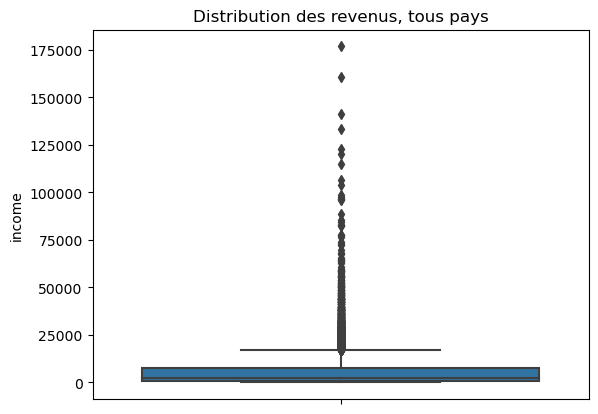

In [58]:
boxplot_income = sns.boxplot(y=income_pop_by_country["income"])
plt.title("Distribution des revenus, tous pays")
plt.savefig("Boxplot - revenus pour l'ensemble des pays")

In [59]:
# Position de la valeur extrême
print(np.where(world_income['income']>125000))

(array([ 1599,  3499,  4899, 10998]),)


In [60]:
income_pop_by_country.loc[10998]

country                   USA
year_survey              2008
quantile                  100
nb_quantiles              100
income              176928.55
gdpppp                43261.0
country_name    United States
country_code              USA
population        304093966.0
Name: 10998, dtype: object

In [61]:
income_pop_by_country.loc[1599]

country                CAN
year_survey           2008
quantile               100
nb_quantiles           100
income           133454.84
gdpppp             35895.0
country_name        Canada
country_code           CAN
population      33247118.0
Name: 1599, dtype: object

In [62]:
income_pop_by_country.loc[3499]

country                    GBR
year_survey               2008
quantile                   100
nb_quantiles               100
income               141565.23
gdpppp                 34048.0
country_name    United Kingdom
country_code               GBR
population          61806995.0
Name: 3499, dtype: object

In [63]:
income_pop_by_country.loc[4899]

country               ISL
year_survey          2008
quantile              100
nb_quantiles          100
income          160645.27
gdpppp            36527.0
country_name      Iceland
country_code          ISL
population       317414.0
Name: 4899, dtype: object

On retrouve en tête des pays à hauts revenus, ce qui ne semble pas aberrant.

### <u> Distribution du GDPPPPP: </u>

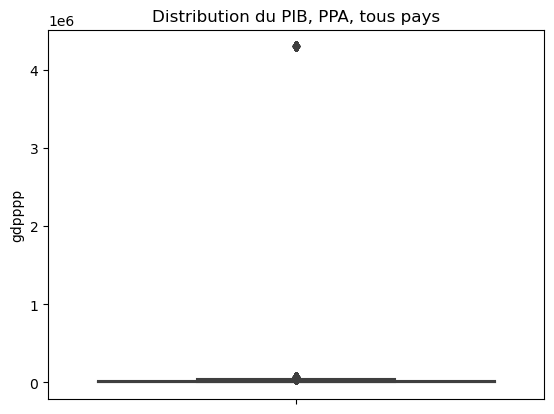

In [64]:
boxplot_gdpppp = sns.boxplot(y=income_pop_by_country['gdpppp'])
plt.title("Distribution du PIB, PPA, tous pays")
plt.savefig("Boxplot - PIB PPA pour l'ensemble des pays")

In [65]:
income_pop_by_country.sort_values('gdpppp', ascending=False).head(260)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
3250,FJI,2008,51,100,1461.8413,4300332.0,Fiji,FJI,845356.0
3274,FJI,2008,75,100,2303.4287,4300332.0,Fiji,FJI,845356.0
3272,FJI,2008,73,100,2210.0690,4300332.0,Fiji,FJI,845356.0
3271,FJI,2008,72,100,2159.8118,4300332.0,Fiji,FJI,845356.0
3270,FJI,2008,71,100,2104.9932,4300332.0,Fiji,FJI,845356.0
...,...,...,...,...,...,...,...,...,...
8120,NOR,2008,22,100,14584.9530,49070.0,Norway,NOR,4768212.0
8119,NOR,2008,21,100,14400.1650,49070.0,Norway,NOR,4768212.0
8118,NOR,2008,20,100,14190.9530,49070.0,Norway,NOR,4768212.0
8117,NOR,2008,19,100,13990.0110,49070.0,Norway,NOR,4768212.0


Les FIJI ont un revenu par habitant (à parité de pouvoir d'achat) exceptionnellement élevé, par rapport aux autres pays.
Ce qui ne semble pas cohérent compte tenu de son profil (pays à revenu moyen tranche haute et non pays à hauts revenus selon la Banque Mondiale, source : https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups).

Nous cherchons donc l'information concernant son gdpppp dans la base de données de la Banque Mondiale.

In [66]:
gdpppp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36830.156611,36782.227117,37314.564389,37587.065942,38893.960556,40143.000266,39834.223903,31182.833881,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3365.684322,3503.826534,3533.336591,3627.474284,3702.514504,3794.094730,3845.618592,3687.728286,3912.176961,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.392197,2152.190243,2078.479082,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.321093,4335.409188,4241.522499,4474.970700,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7682.475646,8179.297828,7337.569901,7103.226249,7310.896551,7148.933253,6995.299736,6478.332182,6581.042021,NaN


In [67]:
(gdpppp[gdpppp["Country Code"] == "FJI"])["2008"]

76    7785.161991
Name: 2008, dtype: float64

Nous remplaçons les données concernant les Fiji du dataframe world_income_2008 par leurs valeurs réelles, celles issues de la base de données de la Banque Mondiale.

In [68]:
income_pop_by_country.loc[income_pop_by_country['country']=='FJI','gdpppp']=7785.161991

In [69]:
income_pop_by_country.sort_values('gdpppp', ascending=False).head(260)

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population
6306,LUX,2008,8,100,10340.483,73127.0,Luxembourg,LUX,488650.0
6343,LUX,2008,45,100,20479.889,73127.0,Luxembourg,LUX,488650.0
6333,LUX,2008,35,100,17743.800,73127.0,Luxembourg,LUX,488650.0
6334,LUX,2008,36,100,18009.268,73127.0,Luxembourg,LUX,488650.0
6335,LUX,2008,37,100,18438.160,73127.0,Luxembourg,LUX,488650.0
...,...,...,...,...,...,...,...,...,...
10917,USA,2008,19,100,8838.466,43261.0,United States,USA,304093966.0
10916,USA,2008,18,100,8492.648,43261.0,United States,USA,304093966.0
10915,USA,2008,17,100,8191.837,43261.0,United States,USA,304093966.0
10914,USA,2008,16,100,7871.505,43261.0,United States,USA,304093966.0


## Complétion du notebook : coefficient de GINI

### Calcul des indices de Gini manquants :

In [70]:
gini.head() # dataframe contenant les coefficients de Gini

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
0,1,Afghanistan,AFG,AF,2008,29.00,NaN,NaN,NaN,NaN,...,27722282.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
1,2,Afghanistan,AFG,AF,2012,33.00,NaN,NaN,NaN,NaN,...,31161378.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
2,3,Afghanistan,AFG,AF,2017,31.00,NaN,NaN,NaN,NaN,...,36296108.0,New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...,Yes
3,4,Albania,ALB,AL,1996,27.01,NaN,NaN,NaN,NaN,...,3098699.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
4,5,Albania,ALB,AL,2002,31.74,NaN,NaN,NaN,NaN,...,3126183.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes


In [71]:
income_pop_by_country.info() # 115 pays

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11500 entries, 0 to 11599
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11500 non-null  object 
 1   year_survey   11500 non-null  int64  
 2   quantile      11500 non-null  int64  
 3   nb_quantiles  11500 non-null  int64  
 4   income        11500 non-null  float64
 5   gdpppp        11500 non-null  float64
 6   country_name  11500 non-null  object 
 7   country_code  11500 non-null  object 
 8   population    11500 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.1+ MB


### Nouveau dataframe contenant le coefficient de gini :

Ajout des informations sur le coefficient de gini à notre dataframe contenant les revenus par centile et la population.

In [72]:
gini_wb = gini[gini["source"] == "World Bank"] # sélection des données issues de la BM
gini_wb

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
3,4,Albania,ALB,AL,1996,27.01,NaN,NaN,NaN,NaN,...,3098699.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
4,5,Albania,ALB,AL,2002,31.74,NaN,NaN,NaN,NaN,...,3126183.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
5,6,Albania,ALB,AL,2005,30.60,NaN,NaN,NaN,NaN,...,3086810.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
6,7,Albania,ALB,AL,2008,29.98,NaN,NaN,NaN,NaN,...,3002683.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
7,8,Albania,ALB,AL,2012,28.96,NaN,NaN,NaN,NaN,...,2914091.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20206,20785,Zimbabwe,ZWE,ZW,1990,56.80,NaN,NaN,NaN,NaN,...,10432409.0,NaN,Low,13,World Bank,World Bank 2002,Poverty Monitoring Database,Poverty Income Consumption and Expenditure Sur...,NaN,No
20207,20786,Zimbabwe,ZWE,ZW,1995,74.60,NaN,NaN,NaN,NaN,...,11410721.0,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,Poverty Income Consumption and Expenditure Sur...,NaN,Yes
20208,20787,Zimbabwe,ZWE,ZW,1995,70.30,NaN,NaN,NaN,NaN,...,11410721.0,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,Poverty Income Consumption and Expenditure Sur...,NaN,No
20212,20791,Zimbabwe,ZWE,ZW,2011,43.15,NaN,NaN,NaN,NaN,...,12894323.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes


In [73]:
gini_df = gini_wb.copy()
gini_df = gini_df[['country','year', 'gini']]
gini_df.head()

,country,year,gini
3,Albania,1996,27.01
4,Albania,2002,31.74
5,Albania,2005,30.60
6,Albania,2008,29.98
7,Albania,2012,28.96


In [74]:
# création du dataframe
dataset_P7 = income_pop_by_country.merge(gini_df, how='left', left_on=["country_name", "year_survey"], right_on=["country", "year"])
dataset_P7

,country_x,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population,country_y,year,gini
0,ALB,2008,1,100,728.89795,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
1,ALB,2008,2,100,916.66235,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
...,...,...,...,...,...,...,...,...,...,...,...,...
12295,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",COD,60411195.0,NaN,NaN,NaN
12296,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",COD,60411195.0,NaN,NaN,NaN
12297,COD,2008,100,100,2243.12260,303.19305,"Congo, Dem. Rep.",COD,60411195.0,NaN,NaN,NaN
12298,LTU,2008,41,100,4882.14065,17571.00000,Lithuania,LTU,3198231.0,Lithuania,2008.0,35.73


In [75]:
dataset_P7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12300 entries, 0 to 12299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_x     12300 non-null  object 
 1   year_survey   12300 non-null  int64  
 2   quantile      12300 non-null  int64  
 3   nb_quantiles  12300 non-null  int64  
 4   income        12300 non-null  float64
 5   gdpppp        12300 non-null  float64
 6   country_name  12300 non-null  object 
 7   country_code  12300 non-null  object 
 8   population    12300 non-null  float64
 9   country_y     9000 non-null   object 
 10  year          9000 non-null   float64
 11  gini          9000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.2+ MB


In [76]:
dataset = dataset_P7.rename(columns={"country_x" : "country"})
dataset

,country,year_survey,quantile,nb_quantiles,income,gdpppp,country_name,country_code,population,country_y,year,gini
0,ALB,2008,1,100,728.89795,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
1,ALB,2008,2,100,916.66235,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,ALB,2947314.0,Albania,2008.0,29.98
...,...,...,...,...,...,...,...,...,...,...,...,...
12295,COD,2008,98,100,1057.80740,303.19305,"Congo, Dem. Rep.",COD,60411195.0,NaN,NaN,NaN
12296,COD,2008,99,100,1286.60290,303.19305,"Congo, Dem. Rep.",COD,60411195.0,NaN,NaN,NaN
12297,COD,2008,100,100,2243.12260,303.19305,"Congo, Dem. Rep.",COD,60411195.0,NaN,NaN,NaN
12298,LTU,2008,41,100,4882.14065,17571.00000,Lithuania,LTU,3198231.0,Lithuania,2008.0,35.73


In [77]:
dataset = dataset[["country", "country_name", "year_survey", "quantile", "nb_quantiles", "income", "gdpppp", "population", "gini"]]
dataset

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.98
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.98
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.98
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.98
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.98
...,...,...,...,...,...,...,...,...,...
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,NaN
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,NaN
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,NaN
12298,LTU,Lithuania,2008,41,100,4882.14065,17571.00000,3198231.0,35.73


In [78]:
dataset.isnull().sum()

country            0
country_name       0
year_survey        0
quantile           0
nb_quantiles       0
income             0
gdpppp             0
population         0
gini            3300
dtype: int64

In [79]:
dataset_final = dataset[dataset["quantile"]==50] # Pour plus de clarté, sélection d'un seul quantile
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 49 to 12247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       123 non-null    object 
 1   country_name  123 non-null    object 
 2   year_survey   123 non-null    int64  
 3   quantile      123 non-null    int64  
 4   nb_quantiles  123 non-null    int64  
 5   income        123 non-null    float64
 6   gdpppp        123 non-null    float64
 7   population    123 non-null    float64
 8   gini          90 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 9.6+ KB


In [80]:
# On met de côté le dataset avec l'ensemble des quantiles
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12300 entries, 0 to 12299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       12300 non-null  object 
 1   country_name  12300 non-null  object 
 2   year_survey   12300 non-null  int64  
 3   quantile      12300 non-null  int64  
 4   nb_quantiles  12300 non-null  int64  
 5   income        12300 non-null  float64
 6   gdpppp        12300 non-null  float64
 7   population    12300 non-null  float64
 8   gini          9000 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 960.9+ KB


In [81]:
dataset.isnull().sum()

country            0
country_name       0
year_survey        0
quantile           0
nb_quantiles       0
income             0
gdpppp             0
population         0
gini            3300
dtype: int64

In [82]:
LVA = gini_wb[gini_wb["c3"]=="LVA"]
LVA_2008 = LVA[LVA["year"]==2008]
LVA_2008

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
10926,11227,Latvia,LVA,LV,2008,37.21,NaN,NaN,NaN,NaN,...,2171248.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No
10927,11228,Latvia,LVA,LV,2008,35.82,NaN,NaN,NaN,NaN,...,2171248.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No


In [83]:
# Pour plusieurs pays, plusieurs coefficients de Gini par an 

In [84]:
count_gini = pd.DataFrame(dataset_final.groupby(by=["country"])["gini"].count())
count_gini

,gini
country,
ALB,1
ARG,1
ARM,1
AUT,1
AZE,0
...,...
VEN,0
VNM,1
XKX,0


In [85]:
count_gini.loc[count_gini['gini'] > 1] # Certains pays ont plusieurs coefficients de gini

,gini
country,
IDN,3
LTU,2
LVA,2
MEX,2
NGA,2
POL,2
ROU,2


In [86]:
LVA = gini_wb[gini_wb["c3"]=="LVA"]
LVA_2008 = LVA[LVA["year"]==2008]
LVA_2008

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
10926,11227,Latvia,LVA,LV,2008,37.21,NaN,NaN,NaN,NaN,...,2171248.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No
10927,11228,Latvia,LVA,LV,2008,35.82,NaN,NaN,NaN,NaN,...,2171248.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No


In [87]:
IDN = gini_wb[gini_wb["c3"]=="IDN"]
IDN_2008 = IDN[IDN["year"]==2008]
IDN_2008

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
9092,9325,Indonesia,IDN,ID,2008,35.15,NaN,NaN,NaN,NaN,...,235469744.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
9093,9326,Indonesia,IDN,ID,2008,29.98,NaN,NaN,NaN,NaN,...,235469744.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No
9094,9327,Indonesia,IDN,ID,2008,36.72,NaN,NaN,NaN,NaN,...,235469744.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No


In [88]:
MEX = gini_wb[gini_wb["c3"]=="MEX"]
MEX_2008 = MEX[MEX["year"]==2008]
MEX_2008

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
12191,12552,Mexico,MEX,MX,2008,49.88,NaN,NaN,NaN,NaN,...,110815272.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No
12192,12553,Mexico,MEX,MX,2008,44.55,NaN,NaN,NaN,NaN,...,110815272.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No


In [89]:
NGA = gini_wb[gini_wb["c3"]=="NGA"]
NGA_2010 = NGA[NGA["year"]==2010]
NGA_2010

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
13004,13385,Nigeria,NGA,NG,2010,42.97,NaN,NaN,NaN,NaN,...,158503200.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
13005,13386,Nigeria,NGA,NG,2010,48.80,NaN,NaN,NaN,NaN,...,158503200.0,NaN,High,10,World Bank,World Bank,Mean Income at constant 2005 prices,NaN,NaN,No


In [90]:
POL = gini_wb[gini_wb["c3"]=="POL"]
POL_2008 = POL[POL["year"]==2008]
POL_2008

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
14498,14926,Poland,POL,PL,2008,33.49,NaN,NaN,NaN,NaN,...,38356784.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No
14499,14927,Poland,POL,PL,2008,33.72,NaN,NaN,NaN,NaN,...,38356784.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No


In [91]:
ROU = gini_wb[gini_wb["c3"]=="ROU"]
ROU_2008 = ROU[ROU["year"]==2008]
ROU_2008

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
15077,15517,Romania,ROU,RO,2008,36.43,NaN,NaN,NaN,NaN,...,20829522.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No
15078,15518,Romania,ROU,RO,2008,29.57,NaN,NaN,NaN,NaN,...,20829522.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,No


In [92]:
dataset_final[dataset_final["country"]=='NGA']

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
8396,NGA,Nigeria,2010,50,100,459.36218,1946.0,150269622.0,42.97
8397,NGA,Nigeria,2010,50,100,459.36218,1946.0,150269622.0,48.80


In [93]:
# Même chose pour le dataset avec l'ensemble des quantiles
dataset[dataset["country"]=='NGA']

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
8298,NGA,Nigeria,2010,1,100,51.049760,1946.0,150269622.0,42.97
8299,NGA,Nigeria,2010,1,100,51.049760,1946.0,150269622.0,48.80
8300,NGA,Nigeria,2010,2,100,81.135445,1946.0,150269622.0,42.97
8301,NGA,Nigeria,2010,2,100,81.135445,1946.0,150269622.0,48.80
8302,NGA,Nigeria,2010,3,100,97.403180,1946.0,150269622.0,42.97
...,...,...,...,...,...,...,...,...,...
8493,NGA,Nigeria,2010,98,100,2644.717800,1946.0,150269622.0,48.80
8494,NGA,Nigeria,2010,99,100,3379.285000,1946.0,150269622.0,42.97
8495,NGA,Nigeria,2010,99,100,3379.285000,1946.0,150269622.0,48.80
8496,NGA,Nigeria,2010,100,100,6711.466300,1946.0,150269622.0,42.97


In [94]:
# Pour NGA on garde la ligne quality = high
dataset_final = dataset_final.drop(labels=8396, axis =0)
dataset_final

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,NaN
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.79
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.46
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,NaN
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,NaN


In [95]:
# suppression des doublons dans le dataframe à 100 quantiles (dataset)
row_to_drop = dataset.loc[dataset["gini"]==42.97]
row_to_drop.index

Int64Index([8298, 8300, 8302, 8304, 8306, 8308, 8310, 8312, 8314, 8316, 8318,
            8320, 8322, 8324, 8326, 8328, 8330, 8332, 8334, 8336, 8338, 8340,
            8342, 8344, 8346, 8348, 8350, 8352, 8354, 8356, 8358, 8360, 8362,
            8364, 8366, 8368, 8370, 8372, 8374, 8376, 8378, 8380, 8382, 8384,
            8386, 8388, 8390, 8392, 8394, 8396, 8398, 8400, 8402, 8404, 8406,
            8408, 8410, 8412, 8414, 8416, 8418, 8420, 8422, 8424, 8426, 8428,
            8430, 8432, 8434, 8436, 8438, 8440, 8442, 8444, 8446, 8448, 8450,
            8452, 8454, 8456, 8458, 8460, 8462, 8464, 8466, 8468, 8470, 8472,
            8474, 8476, 8478, 8480, 8482, 8484, 8486, 8488, 8490, 8492, 8494,
            8496],
           dtype='int64')

In [96]:
dataset = dataset.drop(labels=[8298, 8300, 8302, 8304, 8306, 8308, 8310, 8312, 8314, 8316, 8318,
            8320, 8322, 8324, 8326, 8328, 8330, 8332, 8334, 8336, 8338, 8340,
            8342, 8344, 8346, 8348, 8350, 8352, 8354, 8356, 8358, 8360, 8362,
            8364, 8366, 8368, 8370, 8372, 8374, 8376, 8378, 8380, 8382, 8384,
            8386, 8388, 8390, 8392, 8394, 8396, 8398, 8400, 8402, 8404, 8406,
            8408, 8410, 8412, 8414, 8416, 8418, 8420, 8422, 8424, 8426, 8428,
            8430, 8432, 8434, 8436, 8438, 8440, 8442, 8444, 8446, 8448, 8450,
            8452, 8454, 8456, 8458, 8460, 8462, 8464, 8466, 8468, 8470, 8472,
            8474, 8476, 8478, 8480, 8482, 8484, 8486, 8488, 8490, 8492, 8494,
            8496], axis=0)

In [97]:
dataset

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.98
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.98
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.98
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.98
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.98
...,...,...,...,...,...,...,...,...,...
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,NaN
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,NaN
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,NaN
12298,LTU,Lithuania,2008,41,100,4882.14065,17571.00000,3198231.0,35.73


In [98]:
# On fait la moyenne des coefficients de gini pour les autres pays ayant des doublons

a = dataset_final.loc[dataset_final["country"]=='IDN', "gini"].mean()
b = dataset_final.loc[dataset_final["country"]=='LTU', "gini"].mean()
c = dataset_final.loc[dataset_final["country"]=='LVA', "gini"].mean()
d = dataset_final.loc[dataset_final["country"]=='MEX', "gini"].mean()
e = dataset_final.loc[dataset_final["country"]=='POL', "gini"].mean()
f = dataset_final.loc[dataset_final["country"]=='ROU', "gini"].mean()

In [99]:
 # Même chose pour dataset
g = dataset.loc[dataset["country"]=='IDN', "gini"].mean()
h = dataset.loc[dataset["country"]=='LTU', "gini"].mean()
i = dataset.loc[dataset["country"]=='LVA', "gini"].mean()
j = dataset.loc[dataset["country"]=='MEX', "gini"].mean()
k = dataset.loc[dataset["country"]=='POL', "gini"].mean()
l = dataset.loc[dataset["country"]=='ROU', "gini"].mean()

In [100]:
# remplacement des valeurs dans le dataset final
dataset_final.loc[dataset_final['country']=='IDN','gini']=a
dataset_final.loc[dataset_final['country']=='LTU','gini']=b
dataset_final.loc[dataset_final['country']=='LVA','gini']=c
dataset_final.loc[dataset_final['country']=='MEX','gini']=d
dataset_final.loc[dataset_final['country']=='POL','gini']=e
dataset_final.loc[dataset_final['country']=='ROU','gini']=f

In [101]:
# et remplacement des valeurs dans le dataframe dataset
dataset.loc[dataset['country']=='IDN','gini']=g
dataset.loc[dataset['country']=='LTU','gini']=h
dataset.loc[dataset['country']=='LVA','gini']=i
dataset.loc[dataset['country']=='MEX','gini']=j
dataset.loc[dataset['country']=='POL','gini']=k
dataset.loc[dataset['country']=='ROU','gini']=l

In [102]:
dataset_final[dataset_final['country']=="ROU"] # OK

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
9796,ROU,Romania,2008,50,100,2753.764,11782.0,20537875.0,33.0
9797,ROU,Romania,2008,50,100,2753.764,11782.0,20537875.0,33.0


In [103]:
dataset[dataset['country']=="ROU"] # OK

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
9698,ROU,Romania,2008,1,100,199.77019,11782.0,20537875.0,33.0
9699,ROU,Romania,2008,1,100,199.77019,11782.0,20537875.0,33.0
9700,ROU,Romania,2008,2,100,364.82950,11782.0,20537875.0,33.0
9701,ROU,Romania,2008,2,100,364.82950,11782.0,20537875.0,33.0
9702,ROU,Romania,2008,3,100,472.35422,11782.0,20537875.0,33.0
...,...,...,...,...,...,...,...,...,...
9893,ROU,Romania,2008,98,100,9831.80300,11782.0,20537875.0,33.0
9894,ROU,Romania,2008,99,100,11502.82400,11782.0,20537875.0,33.0
9895,ROU,Romania,2008,99,100,11502.82400,11782.0,20537875.0,33.0
9896,ROU,Romania,2008,100,100,17002.11300,11782.0,20537875.0,33.0


In [104]:
dataset_final = dataset_final.drop(labels=[4448, 4449, 6497, 6797, 7297, 9397, 9797]) # suppression des doublons
dataset_final

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,NaN
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.79
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.46
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,NaN
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,NaN


In [105]:
dataset = dataset. drop_duplicates() 
dataset

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.980
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.980
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.980
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.980
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.980
...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911.78340,303.19305,60411195.0,NaN
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,NaN
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,NaN
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,NaN


Certaines informations concernant les coefficients de gini de plusieurs pays sont manquantes.

In [106]:
dataset.isnull().sum()

country            0
country_name       0
year_survey        0
quantile           0
nb_quantiles       0
income             0
gdpppp             0
population         0
gini            3300
dtype: int64

In [107]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 49 to 12247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       115 non-null    object 
 1   country_name  115 non-null    object 
 2   year_survey   115 non-null    int64  
 3   quantile      115 non-null    int64  
 4   nb_quantiles  115 non-null    int64  
 5   income        115 non-null    float64
 6   gdpppp        115 non-null    float64
 7   population    115 non-null    float64
 8   gini          82 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 9.0+ KB


In [108]:
country_missing_gini = dataset_final.loc[dataset_final["gini"].isnull()]
country_missing_gini = country_missing_gini.set_index('country')
country_missing_gini

,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
country,,,,,,,,
AZE,Azerbaijan,2008,50,100,1939.94010,8101.000000,8.763400e+06,NaN
CAN,Canada,2008,50,100,20165.55300,35895.000000,3.324712e+07,NaN
CHN,China,2007,50,100,1610.75590,5712.000000,1.324655e+09,NaN
CZE,Czech Republic,2008,50,100,7298.85100,23223.000000,1.038460e+07,NaN
EGY,"Egypt, Arab Rep.",2009,50,100,1548.22240,5011.000000,7.963608e+07,NaN
FJI,Fiji,2008,50,100,1443.74570,7785.161991,8.453560e+05,NaN
GTM,Guatemala,2011,50,100,1158.26300,4367.000000,1.373930e+07,NaN
IND,India,2007,50,100,704.64310,2796.000000,1.200670e+09,NaN
IRN,"Iran, Islamic Rep.",2008,50,100,4218.92870,10446.000000,7.212061e+07,NaN


In [109]:
country_missing_gini.index

Index(['AZE', 'CAN', 'CHN', 'CZE', 'EGY', 'FJI', 'GTM', 'IND', 'IRN', 'IRQ',
       'ISR', 'JOR', 'KEN', 'KGZ', 'KOR', 'XKX', 'LAO', 'MNG', 'MOZ', 'MWI',
       'NER', 'NPL', 'RUS', 'SVK', 'SWZ', 'SYR', 'TUR', 'UGA', 'USA', 'VEN',
       'YEM', 'ZAF', 'COD'],
      dtype='object', name='country')

In [110]:
# liste des pays avec coefficient de Gini manquants
liste_pays = ['AZE', 'CAN', 'CHN', 'CZE', 'EGY', 'FJI', 'GTM', 'IND', 'IRN', 'IRQ',
       'ISR', 'JOR', 'KEN', 'KGZ', 'KOR', 'XKX', 'LAO', 'MNG', 'MOZ', 'MWI',
       'NER', 'NPL', 'RUS', 'SVK', 'SWZ', 'SYR', 'TUR', 'UGA', 'USA', 'VEN',
       'YEM', 'ZAF', 'COD'] # obtenue en faisant mettant les pays en index dans country_missing_gini

### <u>Calcul des coefficients de gini manquants :<u>

In [111]:
dataset_final.loc[dataset_final["country"].isin(liste_pays)]

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.000000,8.763400e+06,NaN
1549,CAN,Canada,2008,50,100,20165.55300,35895.000000,3.324712e+07,NaN
1749,CHN,China,2007,50,100,1610.75590,5712.000000,1.324655e+09,NaN
2349,CZE,Czech Republic,2008,50,100,7298.85100,23223.000000,1.038460e+07,NaN
2849,EGY,"Egypt, Arab Rep.",2009,50,100,1548.22240,5011.000000,7.963608e+07,NaN
3249,FJI,Fiji,2008,50,100,1443.74570,7785.161991,8.453560e+05,NaN
3949,GTM,Guatemala,2011,50,100,1158.26300,4367.000000,1.373930e+07,NaN
4649,IND,India,2007,50,100,704.64310,2796.000000,1.200670e+09,NaN
4849,IRN,"Iran, Islamic Rep.",2008,50,100,4218.92870,10446.000000,7.212061e+07,NaN
4949,IRQ,Iraq,2008,50,100,1345.73000,3171.000000,2.838574e+07,NaN


In [112]:
dataset

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.980
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.980
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.980
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.980
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.980
...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911.78340,303.19305,60411195.0,NaN
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,NaN
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,NaN
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,NaN


In [113]:
dataset[dataset.country=="ALB"]["income"].values

array([  728.89795,   916.66235,  1010.916  ,  1086.9078 ,  1132.6997 ,
        1171.1412 ,  1201.1324 ,  1240.8976 ,  1285.6914 ,  1325.2533 ,
        1351.3123 ,  1379.9443 ,  1416.7827 ,  1467.0759 ,  1503.6356 ,
        1535.6703 ,  1571.8933 ,  1604.8568 ,  1636.6593 ,  1669.9136 ,
        1709.7347 ,  1746.391  ,  1765.3282 ,  1789.8435 ,  1821.8538 ,
        1844.6742 ,  1863.2518 ,  1880.7145 ,  1903.7499 ,  1929.054  ,
        1950.4482 ,  1967.546  ,  1993.7744 ,  2026.2073 ,  2057.9592 ,
        2085.9587 ,  2115.247  ,  2141.773  ,  2170.2737 ,  2195.6135 ,
        2216.396  ,  2258.5613 ,  2291.3662 ,  2318.385  ,  2343.677  ,
        2367.7053 ,  2394.3325 ,  2414.1929 ,  2450.6875 ,  2493.837  ,
        2515.8542 ,  2545.9229 ,  2585.2053 ,  2624.496  ,  2653.148  ,
        2689.833  ,  2727.5537 ,  2760.3188 ,  2789.3022 ,  2820.4968 ,
        2853.7224 ,  2892.096  ,  2937.91   ,  2981.6497 ,  3007.7898 ,
        3061.0693 ,  3103.5266 ,  3146.2292 ,  3181.6255 ,  3230

In [114]:
liste_pays

['AZE',
 'CAN',
 'CHN',
 'CZE',
 'EGY',
 'FJI',
 'GTM',
 'IND',
 'IRN',
 'IRQ',
 'ISR',
 'JOR',
 'KEN',
 'KGZ',
 'KOR',
 'XKX',
 'LAO',
 'MNG',
 'MOZ',
 'MWI',
 'NER',
 'NPL',
 'RUS',
 'SVK',
 'SWZ',
 'SYR',
 'TUR',
 'UGA',
 'USA',
 'VEN',
 'YEM',
 'ZAF',
 'COD']

In [115]:
liste = list()
for i in range(len(liste_pays)):
    revenu = dataset[dataset.country==liste_pays[i]]["income"].values
    # dataset_final.loc[dataset_final["country"].isin(liste_pays)]["income"].values
    n = 33
    lorenz = np.cumsum(np.sort(revenu)) / revenu.sum()
    lorenz = np.append([0], lorenz)
    
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n #aire sous la courbe de Lorenz
    
    S = 0.5 - AUC
    gini_calc = 2*S
   # dataset_final.loc[dataset_final["country"].isin(liste_pays), "gini"] = gini_calc 
    liste.append(gini_calc)
liste

[-1.0838752052642393,
 -0.9690340202278414,
 -0.5810134259020205,
 -1.2640487712908208,
 -1.0285806681589569,
 -0.7326628046725379,
 -0.3082038238767755,
 -1.0163243228266263,
 -0.71401770929993,
 -0.9391413305881273,
 -0.7750986378854243,
 -1.0068947227691942,
 -1.1244640067527705,
 -0.9836864538629171,
 -0.9648055889323754,
 -1.0773496739847186,
 -0.9569374228969734,
 -0.9453014232821977,
 -0.6473626003551274,
 -0.6624217785596183,
 -0.8996857368876916,
 -1.0352323542620705,
 -0.7676031653960911,
 -1.2811548017978094,
 -0.6256909088676179,
 -0.9466301430848387,
 -0.7513703439081112,
 -0.7367005098784867,
 -0.7218207176342957,
 -0.715086804346126,
 -0.8964811053504802,
 -0.0006712085163753656,
 -0.6848578882708931]

In [116]:
country_missing_gini = country_missing_gini.reset_index

In [117]:
for i in range(len(liste_pays)):
    revenu = dataset_final.loc[dataset_final["country"].isin(liste_pays)]["income"].values
    n = 33
    lorenz = np.cumsum(np.sort(revenu)) / revenu.sum()
    lorenz = np.append([0], lorenz)
    
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n #aire sous la courbe de Lorenz
    
    S = 0.5 - AUC
    gini_calc = 2*S
    dataset_final.loc[dataset_final["country"].isin(liste_pays), "gini"] = gini_calc 

In [118]:
# Indice de gini pour un ensemble de pays 

def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

revenus = dataset_final.loc[dataset_final["country"].isin(liste_pays)]["income"].values

gini(revenus)

0.609736395590331

In [119]:
dataset_final

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.980000
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.300000
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.190000
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.440000
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,0.609736
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.790000
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.460000
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,0.609736
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,0.609736


In [120]:
dataset_final.loc[dataset_final['country']=='AZE','gini']=0.337*100 # 33.7 source CIA, wiki 2008
dataset_final.loc[dataset_final['country']=='CAN','gini']=0.314*100 # 31.4, le Québec économique / 32.1 et 43.8 OECD
dataset_final.loc[dataset_final['country']=='CHN','gini']=0.491*100 # 49.1 WIID archive 2014
dataset_final.loc[dataset_final['country']=='CZE','gini']=0.247*100 # 24.7, WIID 2018
dataset_final.loc[dataset_final['country']=='EGY','gini']=0.337*100 # 33.7 Egypt Income and Expenditure Survey / WIID
dataset_final.loc[dataset_final['country']=='FJI','gini']=0.428*100 # 42.78 WID dec. 2018
dataset_final.loc[dataset_final['country']=='GTM','gini']=0.559*100 # 55.9 Statista
dataset_final.loc[dataset_final['country']=='IND','gini']=0.35*100 # 35 WIID
dataset_final.loc[dataset_final['country']=='IRN','gini']=0.421*100 # 42.1, 2009, WB
dataset_final.loc[dataset_final['country']=='ISR','gini']=0.371*100 # 37.1 et 49.8 WID dec. 2018
dataset_final.loc[dataset_final['country']=='JOR','gini']=0.337725*100 # 33.8 WDI WIID
dataset_final.loc[dataset_final['country']=='KGZ','gini']=0.3145*100 # 31.45 WId dec. 2018
dataset_final.loc[dataset_final['country']=='KOR','gini']=0.314*100 # 31.4 et 34.4 OECD
dataset_final.loc[dataset_final['country']=='LAO','gini']=0.367*100 # 36.7, CIA, wiki 2008, WIID
dataset_final.loc[dataset_final['country']=='MNG','gini']=0.365*100 # 36.5, CIA, wiki 2008
dataset_final.loc[dataset_final['country']=='MOZ','gini']=0.456*100 # 45.6, CIA, wiki 2008
dataset_final.loc[dataset_final['country']=='NER','gini']=0.345*100 # 34.5 WDI
dataset_final.loc[dataset_final['country']=='NPL','gini']=0.472*100 # 47.2, CIA, wiki 2008
dataset_final.loc[dataset_final['country']=='RUS','gini']=0.423*100 # 42.3, WDI, WIID archives
dataset_final.loc[dataset_final['country']=='SVK','gini']=0.237*100 # 23.7 Eurostat
dataset_final.loc[dataset_final['country']=='SWZ','gini']=0.337*100 # 33.7, CIA, wiki 2008
dataset_final.loc[dataset_final['country']=='TUR','gini']=0.39*100 # 39 WDI
dataset_final.loc[dataset_final['country']=='UGA','gini']=0.442*100 # 44.2 2009 WB
dataset_final.loc[dataset_final['country']=='USA','gini']=0.378*100 # 37.8  + 46.6 OCDE
dataset_final.loc[dataset_final['country']=='VEN','gini']=0.38*100 # 38, SEDLAc 2014, WID
dataset_final.loc[dataset_final['country']=='ZAF','gini']=0.63*100 # 63 Index Mundi
dataset_final.loc[dataset_final['country']=='COD','gini']=0.457*100 # 45.7, WID dec. 2018

In [121]:
dataset_final

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.980000
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.300000
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.190000
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.440000
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,33.700000
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.790000
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.460000
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,0.609736
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,63.000000


__Imputation des données (informations extraites de bdd officielles)__

In [122]:
dataset.loc[dataset['country']=='AZE','gini']=0.337*100 # 33.7 source CIA, wiki 2008
dataset.loc[dataset['country']=='CAN','gini']=0.314*100 # 31.4, le Québec économique / 32.1 et 43.8 OECD
dataset.loc[dataset['country']=='CHN','gini']=0.491*100 # 49.1 WIID archive 2014
dataset.loc[dataset['country']=='CZE','gini']=0.247*100 # 24.7, WIID 2018
dataset.loc[dataset['country']=='EGY','gini']=0.337*100 # 33.7 Egypt Income and Expenditure Survey / WIID
dataset.loc[dataset['country']=='FJI','gini']=0.428*100 # 42.78 WID dec. 2018
dataset.loc[dataset['country']=='GTM','gini']=0.559*100 # 55.9 Statista
dataset.loc[dataset['country']=='IND','gini']=0.35*100 # 35 WIID
dataset.loc[dataset['country']=='IRN','gini']=0.421*100 # 42.1, 2009, WB
dataset.loc[dataset['country']=='ISR','gini']=0.371*100 # 37.1 et 49.8 WID dec. 2018
dataset.loc[dataset['country']=='JOR','gini']=0.337725*100 # 33.8 WDI WIID
dataset.loc[dataset['country']=='KGZ','gini']=0.3145*100 # 31.45 WId dec. 2018
dataset.loc[dataset['country']=='KOR','gini']=0.314*100 # 31.4 et 34.4 OECD
dataset.loc[dataset['country']=='LAO','gini']=0.367*100 # 36.7, CIA, wiki 2008, WIID
dataset.loc[dataset['country']=='MNG','gini']=0.365*100 # 36.5, CIA, wiki 2008
dataset.loc[dataset['country']=='MOZ','gini']=0.456*100 # 45.6, CIA, wiki 2008
dataset.loc[dataset['country']=='NER','gini']=0.345*100 # 34.5 WDI
dataset.loc[dataset['country']=='NPL','gini']=0.472*100 # 47.2, CIA, wiki 2008
dataset.loc[dataset['country']=='RUS','gini']=0.423*100 # 42.3, WDI, WIID archives
dataset.loc[dataset['country']=='SVK','gini']=0.237*100 # 23.7 Eurostat
dataset.loc[dataset['country']=='SWZ','gini']=0.337*100 # 33.7, CIA, wiki 2008
dataset.loc[dataset['country']=='TUR','gini']=0.39*100 # 39 WDI
dataset.loc[dataset['country']=='UGA','gini']=0.442*100 # 44.2 2009 WB
dataset.loc[dataset['country']=='USA','gini']=0.378*100 # 37.8  + 46.6 OCDE
dataset.loc[dataset['country']=='VEN','gini']=0.38*100 # 38, SEDLAc 2014, WID
dataset.loc[dataset['country']=='ZAF','gini']=0.63*100 # 63 Index Mundi
dataset.loc[dataset['country']=='COD','gini']=0.457*100 # 45.7, WID dec. 2018

__Imputation par la moyenne pour les éléments restants__

Pays concernés : Iraq, Kenya, Kosovo, Malawi, Syrie, Yemen, pour l'année 2008

In [123]:
irq_gini_moy = gini_wb[gini_wb['c3']=='IRQ']['gini'].mean()
ken_gini_moy = gini_wb[gini_wb['c3']=='KEN']['gini'].mean()
kos_gini_moy = gini_wb[gini_wb['c3']=='XKX']['gini'].mean()
malawi_gini_moy = gini_wb[gini_wb['c3']=='MWI']['gini'].mean()
syr_gini_moy = gini_wb[gini_wb['c3']=='SYR']['gini'].mean()
yemen_gini_moy = gini_wb[gini_wb['c3']=='YEM']['gini'].mean()

print(irq_gini_moy, ken_gini_moy, kos_gini_moy, malawi_gini_moy, syr_gini_moy, yemen_gini_moy)

40.346666666666664 49.19714285714286 29.008333333333336 50.800000000000004 35.78 36.485


In [124]:
dataset.loc[dataset['country']=='IRQ','gini']=0.4034*100 
dataset.loc[dataset['country']=='KEN','gini']=0.4919*100 
dataset.loc[dataset['country']=='XKX','gini']=0.29*100
dataset.loc[dataset['country']=='MWI','gini']=0.508*100 
dataset.loc[dataset['country']=='SYR','gini']=0.3578*100
dataset.loc[dataset['country']=='YEM','gini']=0.3648*100 

In [125]:
dataset_final.loc[dataset_final['country']=='IRQ','gini']=0.4034*100 
dataset_final.loc[dataset_final['country']=='KEN','gini']=0.4919*100 
dataset_final.loc[dataset_final['country']=='XKX','gini']=0.29*100
dataset_final.loc[dataset_final['country']=='MWI','gini']=0.508*100 
dataset_final.loc[dataset_final['country']=='SYR','gini']=0.3578*100
dataset_final.loc[dataset_final['country']=='YEM','gini']=0.3648*100

In [126]:
dataset_final

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.79
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.46
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,36.48
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,63.00


# Mission 2

> - Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
> - Représentez la courbe de Lorenz de chacun des pays choisis.
> - Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
> - Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

### Diversité des pays:

Choisir 5 à 10 pays implique d'__identifier des pays représentatifs__.

Nous créons donc des groupes de pays qui se distinguent selon certaines caractéristiques (variables). Avec pour objectif de désigner des pays représentatifs de ces groupes.

In [127]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 49 to 12247
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       115 non-null    object 
 1   country_name  115 non-null    object 
 2   year_survey   115 non-null    int64  
 3   quantile      115 non-null    int64  
 4   nb_quantiles  115 non-null    int64  
 5   income        115 non-null    float64
 6   gdpppp        115 non-null    float64
 7   population    115 non-null    float64
 8   gini          115 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 9.0+ KB


#### Préparation et sélection des données :

In [128]:
dataset_final

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.79
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.46
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,36.48
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,63.00


In [129]:
dataset_final['year_survey'].unique()

array([2008, 2009, 2010, 2007, 2006, 2011, 2004])

Résumé : 115 pays, données de 2004 à 2011.

In [130]:
# La question qui se pose est sur combien d'années allons nous faire des groupes ?
# Doit-on se concentrer uniquement sur l'année 2008 ?
# Je calcul le nombre de pays pour lesquelles chaque année on a des info sur les revenu de chaque centile.

pays_annee_nb_quantiles = dataset_final[['country', 'year_survey', 'quantile']].groupby(['country', 'year_survey'], as_index=False).count()
pays_annee_nb_quantiles

,country,year_survey,quantile
0,ALB,2008,1
1,ARG,2008,1
2,ARM,2008,1
3,AUT,2008,1
4,AZE,2008,1
...,...,...,...
110,VEN,2006,1
111,VNM,2006,1
112,XKX,2008,1
113,YEM,2008,1


In [131]:
# Maintenant j'ai besoin du nombre de pays par année 
info_nombre_pays_par_annee = pays_annee_nb_quantiles[['country', 'year_survey']].groupby(['year_survey'], as_index=False).count()
info_nombre_pays_par_annee

,year_survey,country
0,2004,1
1,2006,5
2,2007,15
3,2008,75
4,2009,12
5,2010,6
6,2011,1


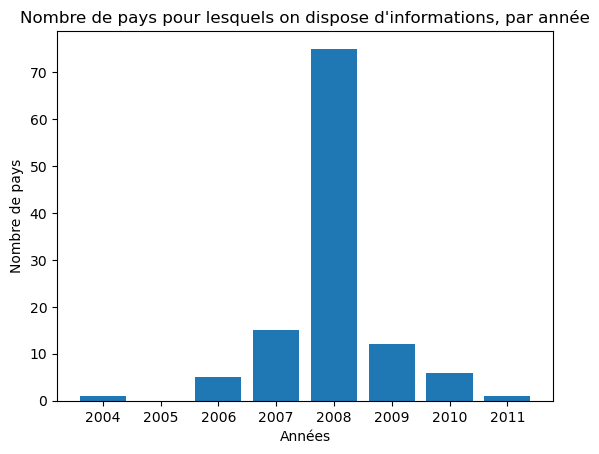

In [132]:
# représentation graphique
plt.bar(info_nombre_pays_par_annee['year_survey'], info_nombre_pays_par_annee['country'])
plt.title("Nombre de pays pour lesquels on dispose d'informations, par année")
plt.xlabel("Années")
plt.ylabel("Nombre de pays")
plt.savefig("Informations contenues dans la base de données WIID par année")

On sélectionne les données de 2008, pour des raisons conjoncturelles.
Compte tenu de la crise économique de 2008, la sitution d'un pays en 2004 n'est pas comparable à celle d'un autre pays en 2011. 

In [133]:
dataset_2008 = dataset_final.copy()
dataset_2008= dataset_2008[dataset_2008['year_survey']==2008]
dataset_2008

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...,...,...,...,...,...
11547,URY,Uruguay,2008,50,100,3532.97440,11682.00000,3340221.0,45.06
11647,USA,United States,2008,50,100,18981.20700,43261.00000,304093966.0,37.80
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,36.48
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,63.00


Pour étudier plus clairement les variations entre pays, nous nous concentrons sur un centile en particulier (par exemple la médiane des revenus: le __centile 50__).

In [134]:
df = dataset_2008.copy()
df = dataset_2008[dataset_2008["quantile"]==50]
df = df[['country', 'country_name', 'income','gdpppp', 'population', 'gini']]
df

,country,country_name,income,gdpppp,population,gini
49,ALB,Albania,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...,...,...
11547,URY,Uruguay,3532.97440,11682.00000,3340221.0,45.06
11647,USA,United States,18981.20700,43261.00000,304093966.0,37.80
12047,YEM,"Yemen, Rep.",786.60210,2224.00000,21892149.0,36.48
12147,ZAF,South Africa,2030.94200,9602.00000,49779472.0,63.00


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 49 to 12247
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       75 non-null     object 
 1   country_name  75 non-null     object 
 2   income        75 non-null     float64
 3   gdpppp        75 non-null     float64
 4   population    75 non-null     float64
 5   gini          75 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.1+ KB


### <u>Préparation des données : </u>

In [136]:
#vérification de la version
print(sklearn.__version__) 

1.0.2


In [137]:
# sélection des variables utiles à l'analyse.

In [138]:
D = df[["income", "gdpppp", "population", "gini"]]
D

,income,gdpppp,population,gini
49,2493.83700,7297.00000,2947314.0,29.98
149,4132.66550,13220.00000,40080159.0,45.30
249,1428.15540,5611.00000,2907615.0,29.19
349,14569.91700,36193.00000,8321496.0,30.44
449,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...
11547,3532.97440,11682.00000,3340221.0,45.06
11647,18981.20700,43261.00000,304093966.0,37.80
12047,786.60210,2224.00000,21892149.0,36.48
12147,2030.94200,9602.00000,49779472.0,63.00


In [139]:
D.index = df.country
D.index

Index(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BGR', 'BLR', 'BOL', 'BRA',
       'CAF', 'CAN', 'CIV', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO', 'GRC', 'HND',
       'HRV', 'HUN', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN',
       'KAZ', 'KGZ', 'KHM', 'KOR', 'XKX', 'LTU', 'LUX', 'LVA', 'MDA', 'MEX',
       'MKD', 'MNE', 'MOZ', 'MRT', 'NLD', 'NOR', 'PAK', 'PER', 'POL', 'PRT',
       'PRY', 'ROU', 'RUS', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'TUR', 'UKR',
       'URY', 'USA', 'YEM', 'ZAF', 'COD'],
      dtype='object', name='country')

In [140]:
#dimension
print(D.shape) 
#nombre d'observations
n = D.shape[0]
#nombre de variables
p = D.shape[1]

(75, 4)


In [141]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(D)
print(Z)

[[-0.68297193 -0.68754142 -0.55114658 -0.77746611]
 [-0.41765046 -0.26444945  0.18585848  0.96125786]
 [-0.85550263 -0.80797584 -0.55193452 -0.86712615]
 [ 1.27210962  1.37655879 -0.44448092 -0.72525899]
 [-0.7726462  -0.63011006 -0.4357101  -0.35526943]
 [ 1.03331538  1.18854966 -0.39707492 -0.96019101]
 [-0.42100067 -0.35209656 -0.46093345 -0.37002361]
 [-0.52115245 -0.37652632 -0.42053478 -1.02147763]
 [-0.80198968 -0.92662445 -0.41669478  1.58774325]
 [-0.63852082 -0.52596214  3.20173478  1.95319307]
 [-1.01530499 -1.15985006 -0.52482733  2.20287927]
 [ 2.1780265   1.35527204  0.05023769 -0.61630501]
 [-1.03977358 -1.09977572 -0.22051699  0.72065114]
 [-0.77670577 -0.62410977  0.2687193   2.12343366]
 [-0.533756   -0.46774503 -0.52106111  1.34486667]
 [ 1.35583467  0.66795296 -0.58817752 -0.58112195]
 [ 0.09494559  0.45008524 -0.4035328  -1.37671301]
 [ 1.37535913  1.20262177  1.02006002 -0.65375794]
 [ 1.32626207  1.22919449 -0.500608   -1.31429146]
 [-0.73407193 -0.67268355 -0.42

In [142]:
#moyenne après centrage-réduction
print(np.mean(Z,axis=0))

[-1.53950926e-16  3.75995531e-16  3.25665421e-17  7.69754630e-16]


In [143]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1.]


### <u>Instanciation et lancement des calculs :</u>

In [144]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [145]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [146]:
# calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) 

4


### <u>Valeurs propres et scree plot :</u>

In [147]:
#variance expliquée
print(acp.explained_variance_)

[2.31464222 1.13175787 0.55248982 0.05516414]


In [148]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.28378032 1.11666777 0.54512329 0.05442862]


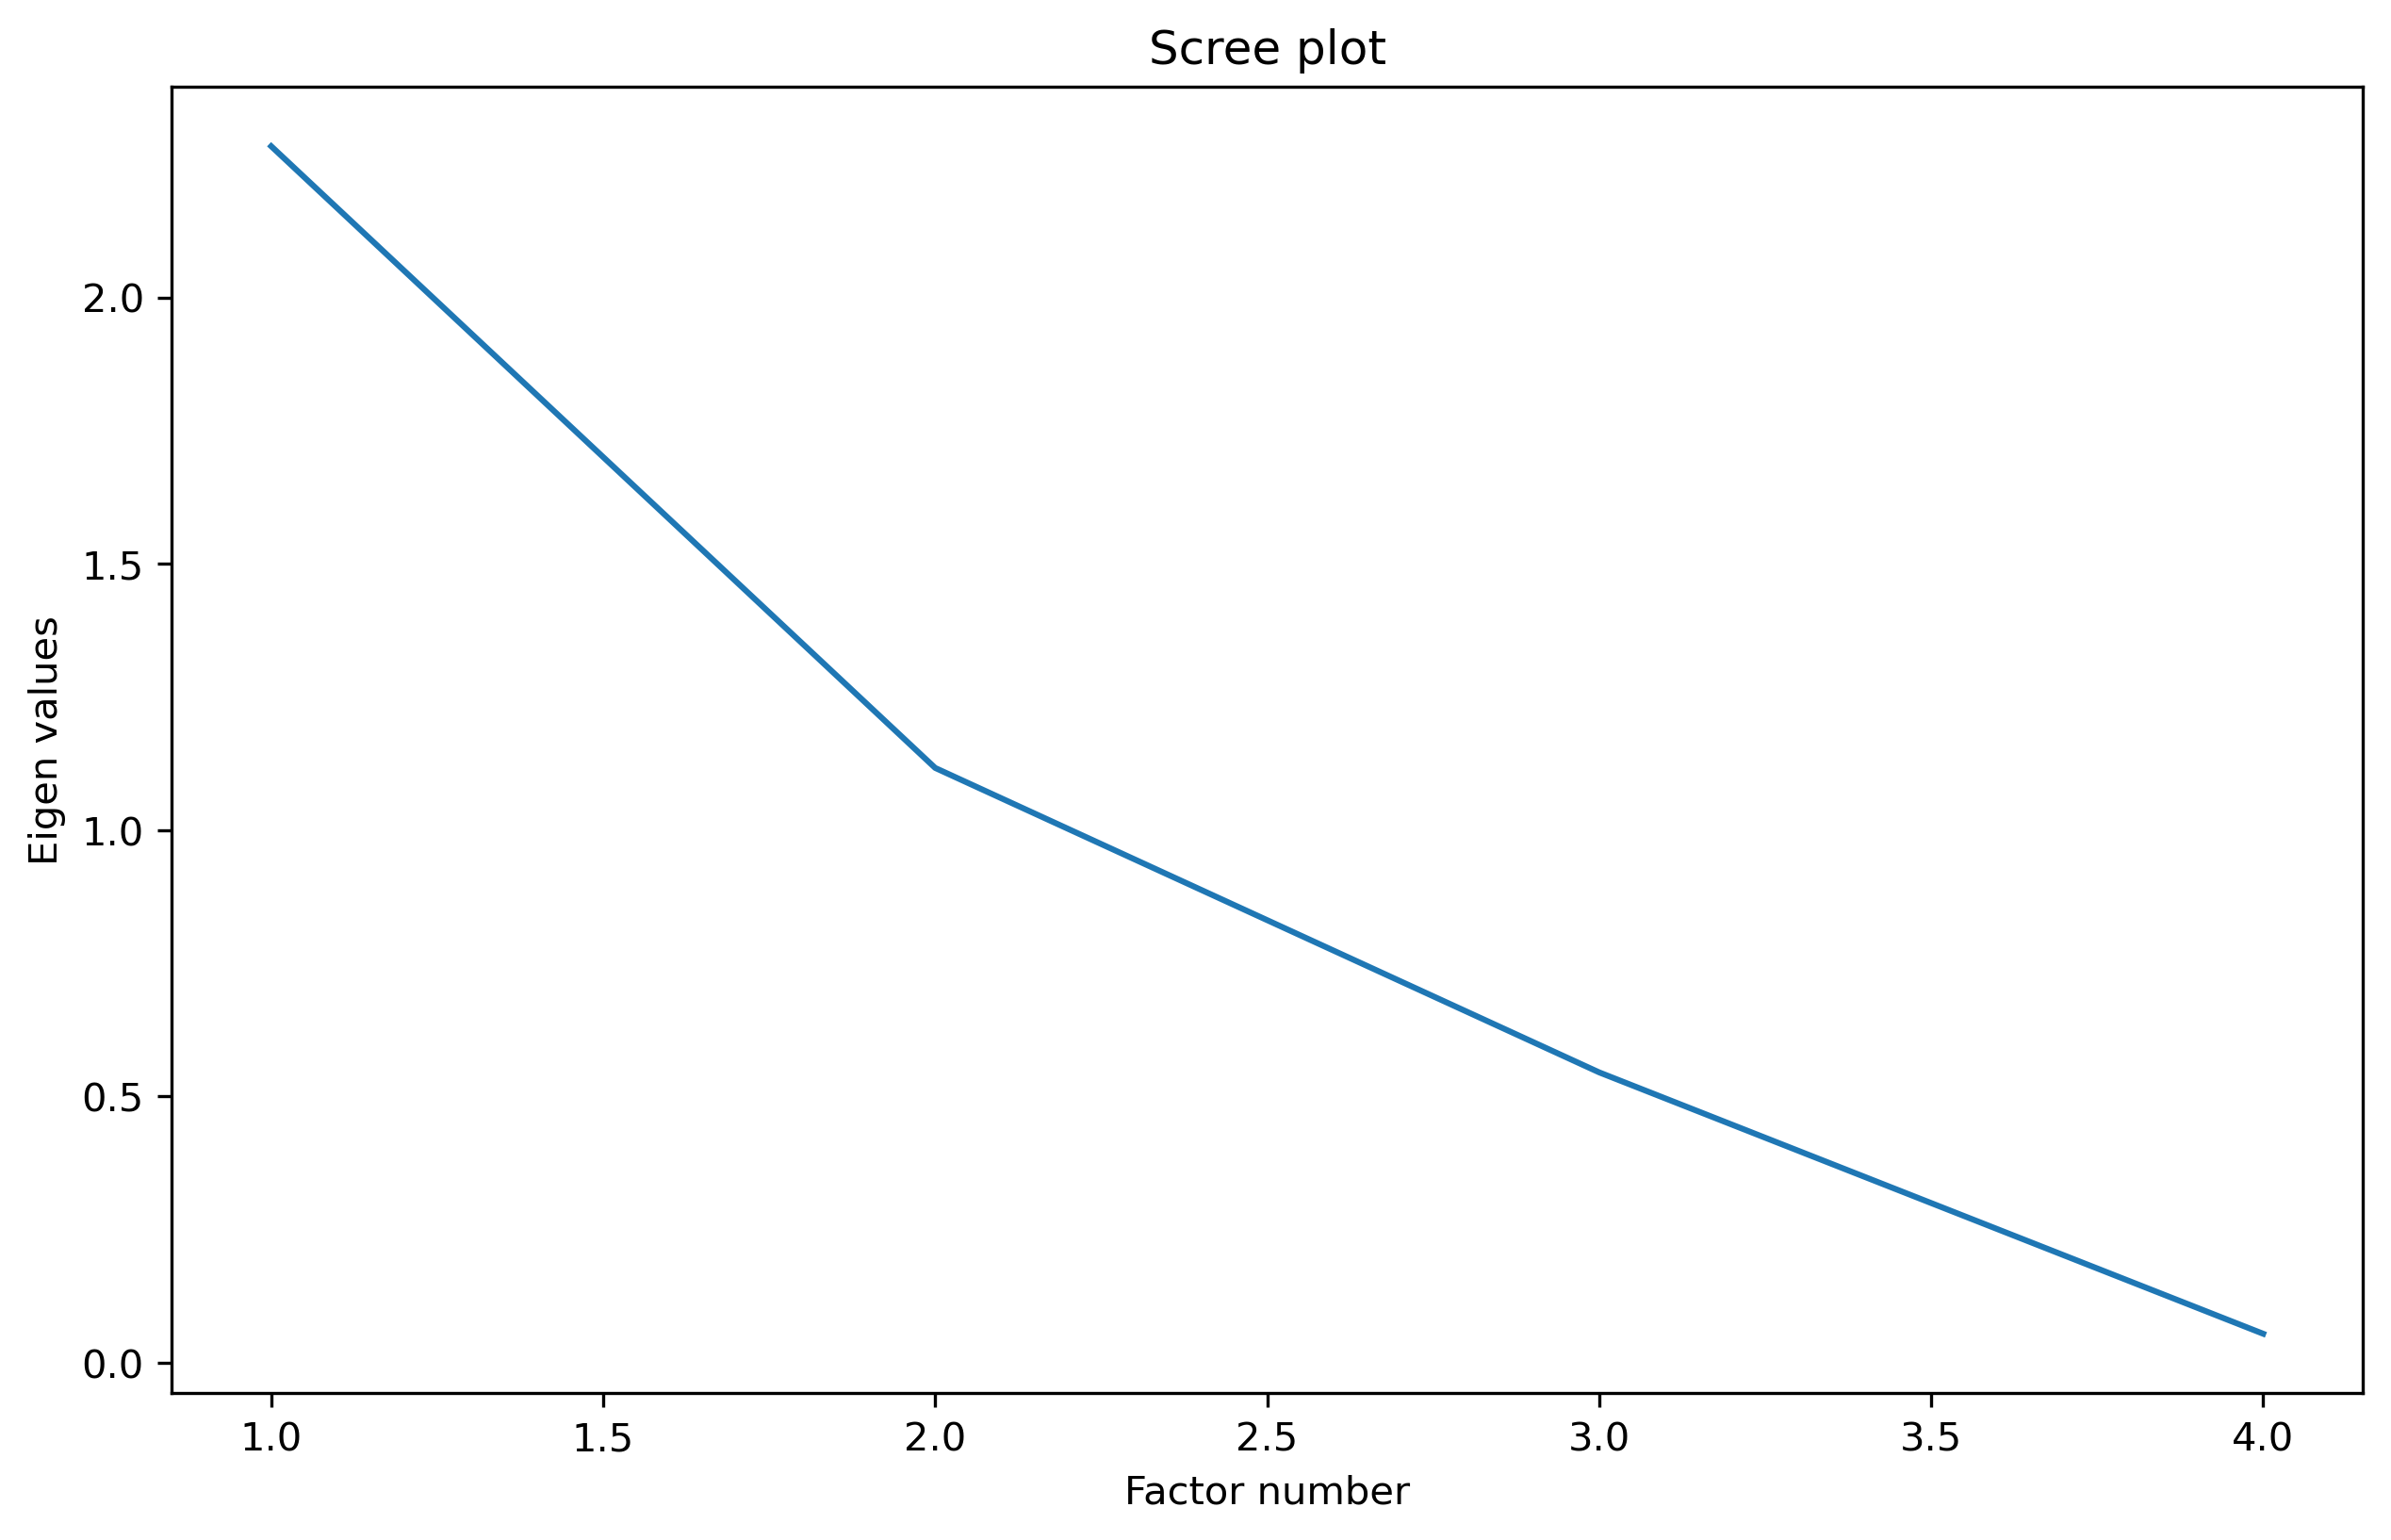

In [149]:
#scree plot
plt.figure(figsize=(10,6), dpi=300)
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.savefig('Scree plot')
plt.show()

Pour déterminer le nombre optimal de clusters, il est possible de sélectionner la valeur de k selon la __«méthode du «coude»__,
c’est-à-dire le point après lequel la distorsion / inertie commence à diminuer de façon linéaire. 

Ainsi, pour les données données, nous concluons que le nombre optimal de grappes pour les données est de __3__.

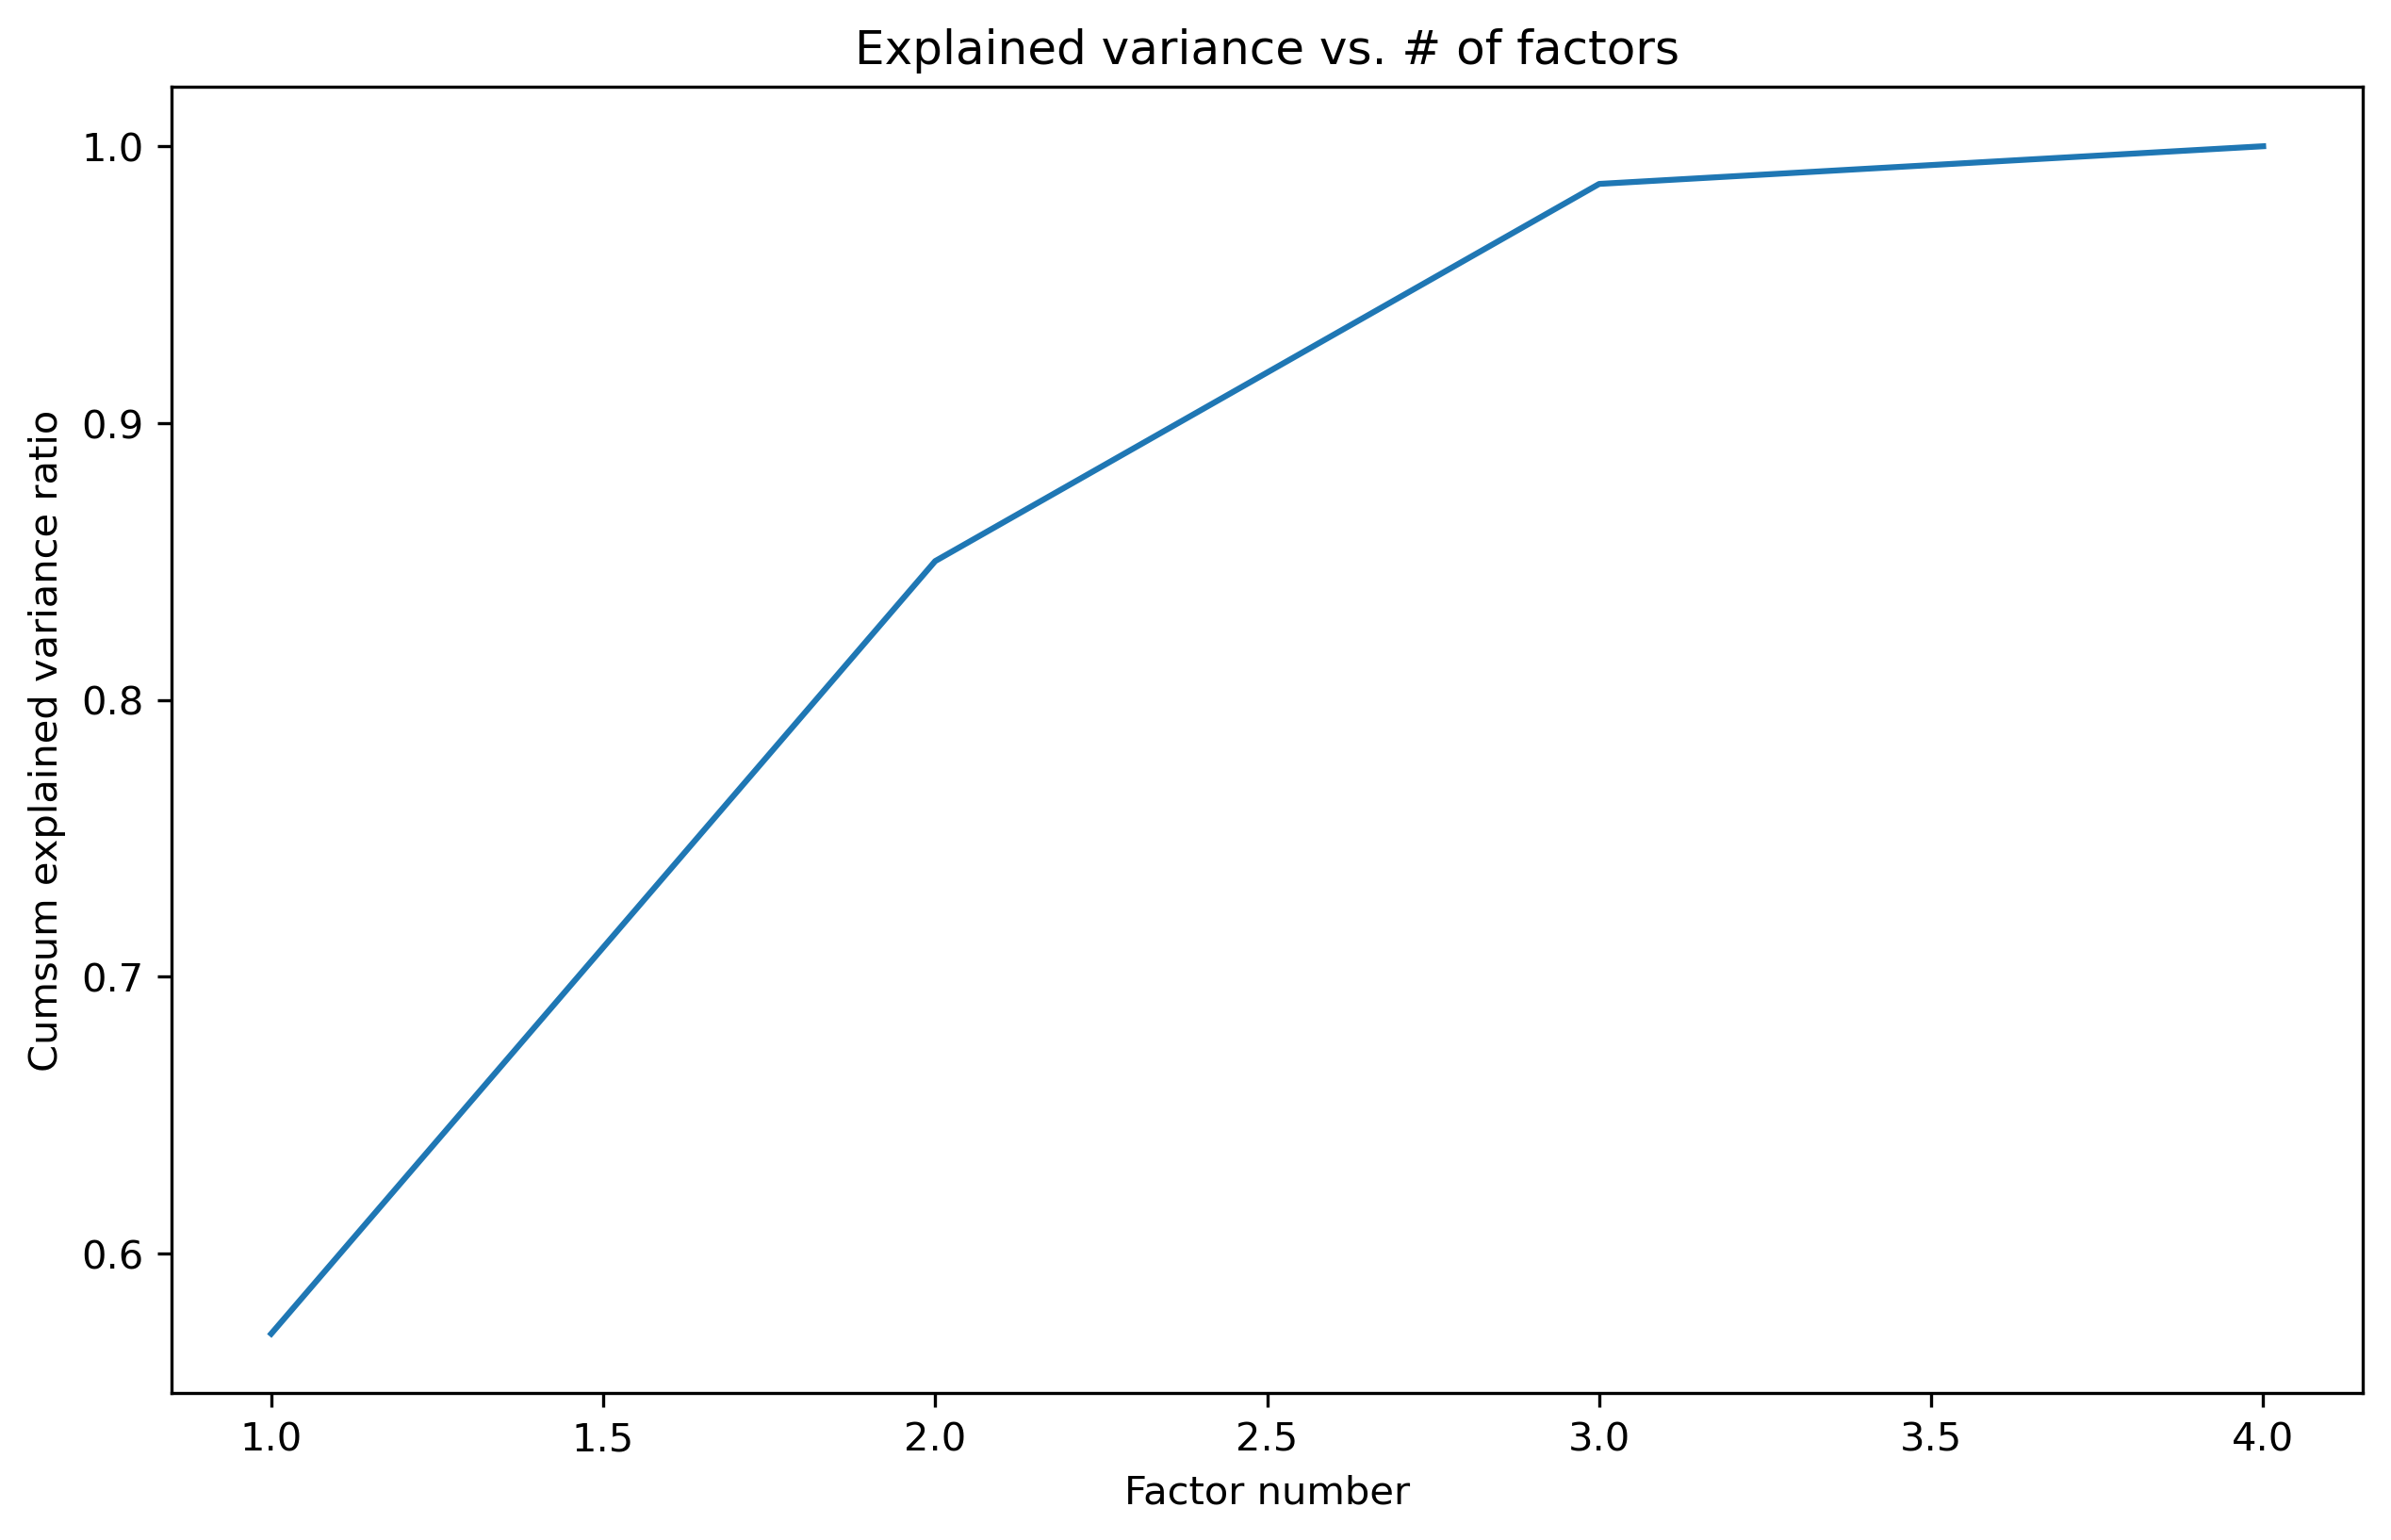

In [150]:
#cumul de variance expliquée
plt.figure(figsize=(10,6), dpi=300)
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.savefig('Explained variance')
plt.show()

In [151]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [152]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.283780  2.083333
1    1.116668  1.083333
2    0.545123  0.583333
3    0.054429  0.250000


### <u>Représentation des individus :</u>

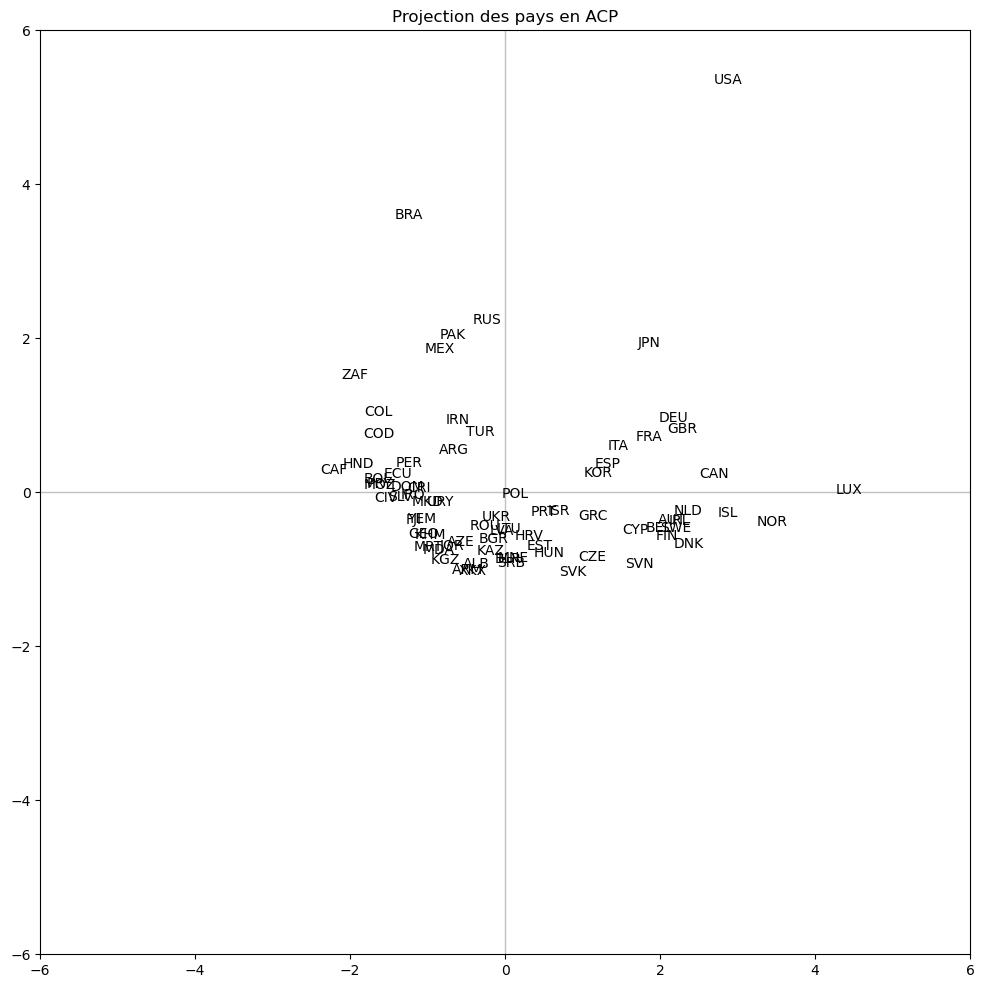

In [153]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(D.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

axes.set_title('Projection des pays en ACP')

plt.savefig('Projection en ACP')
#affichage
plt.show()

### <u>Représentation des variables :</u>

In [154]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.63255482  0.6296523   0.05615899 -0.44750256]
 [ 0.12364368  0.10400736  0.88706969  0.43243736]
 [-0.27574984 -0.31993681  0.45742595 -0.78253688]
 [-0.71312598  0.70025773  0.02674012 -0.01937573]]


In [155]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [156]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.95592833  0.13065737 -0.2035929  -0.16637188]
 [ 0.95154199  0.10990718 -0.23621723  0.16336972]
 [ 0.08486849  0.93738874  0.33772885  0.00623846]
 [-0.676274    0.45696738 -0.57776627 -0.00452035]]


In [157]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':D.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

           id     COR_1     COR_2
0      income  0.955928  0.130657
1      gdpppp  0.951542  0.109907
2  population  0.084868  0.937389
3        gini -0.676274  0.456967


Abscisse : premier axe

Ordonnée : second axe

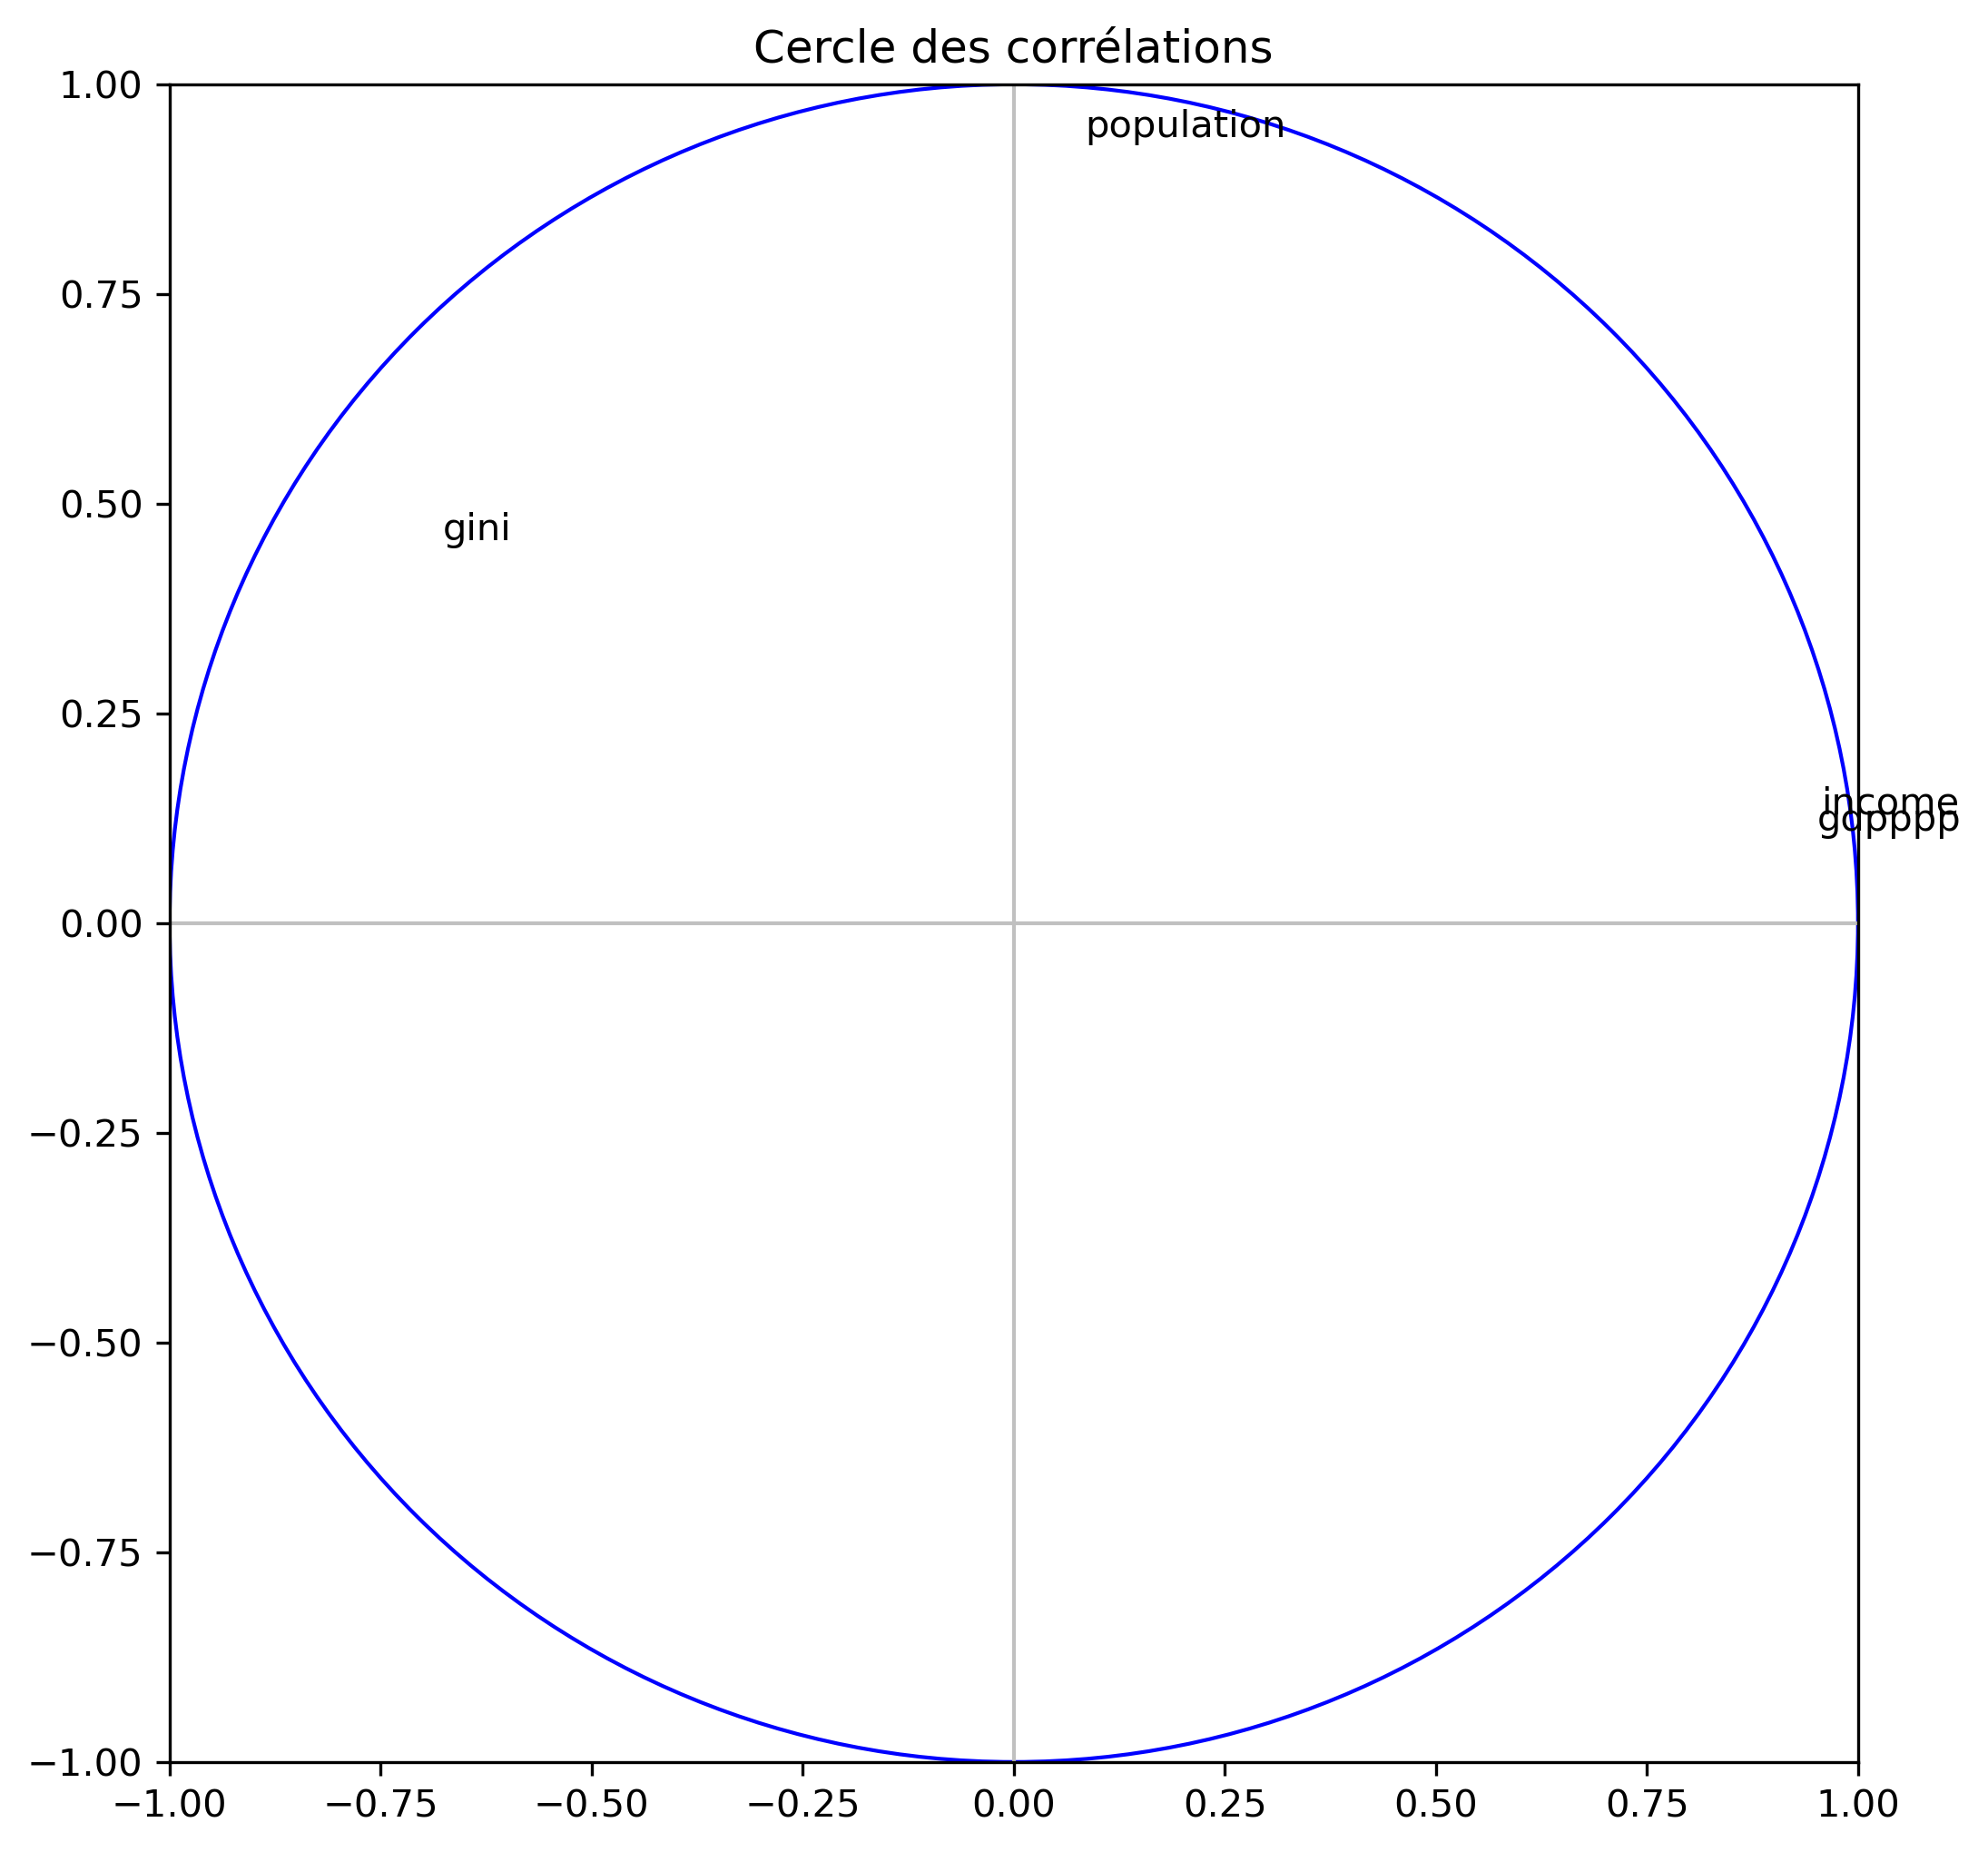

In [158]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8), dpi=300)
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(D.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.title('Cercle des corrélations', size=12)
plt.savefig('Cercle des corrélations')
#affichage
plt.show()

#### Qualité de représentation des variables (COS²) :

In [159]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':D.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

           id    COS2_1    COS2_2
0      income  0.913799  0.017071
1      gdpppp  0.905432  0.012080
2  population  0.007203  0.878698
3        gini  0.457347  0.208819


In [160]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':D.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

           id     CTR_1     CTR_2
0      income  0.400126  0.015288
1      gdpppp  0.396462  0.010818
2  population  0.003154  0.786893
3        gini  0.200259  0.187002


### <u>Clustering par K-means : </u>

In [161]:
coord

array([[-5.47962989e-01, -9.81065352e-01,  7.64586365e-01,
         5.91508581e-03],
       [-8.50425743e-01,  5.01408699e-01, -4.67429073e-01,
         9.89994267e-02],
       [-6.92851067e-01, -1.05439506e+00,  9.20494950e-01,
         4.63322320e-02],
       [ 1.97102614e+00, -4.07454065e-01, -4.26971051e-01,
         5.89384573e-02],
       [-7.50976390e-01, -7.01205907e-01,  4.93358790e-01,
         1.04987304e-01],
       [ 1.80939027e+00, -5.16074758e-01, -9.54448299e-02,
         1.03393613e-01],
       [-3.48303461e-01, -6.57566838e-01,  3.07453721e-01,
         4.85122411e-02],
       [-1.33241110e-01, -9.18367462e-01,  8.71152730e-01,
         1.16528609e-01],
       [-1.82467399e+00,  1.21425462e-01, -9.15464857e-01,
        -1.18862412e-01],
       [-1.42932539e+00,  3.55114253e+00,  2.80457621e-01,
         1.34806968e-01],
       [-2.38780622e+00,  2.40879884e-01, -1.31285499e+00,
        -1.44869946e-01],
       [ 2.50969070e+00,  1.88308511e-01, -5.28930452e-01,
      

In [162]:
km = KMeans(n_clusters = 3)

In [163]:
df_kmeans = km.fit(coord)

In [164]:
clusters = km.labels_
clusters # on a des clusters associés à chaque pays

array([0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1,
       0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       1, 1, 2, 0, 2, 1, 0, 2, 2], dtype=int32)

In [165]:
n = D.shape[0]
n

75

In [166]:
df_kmeans

KMeans(n_clusters=3)

In [167]:
df

,country,country_name,income,gdpppp,population,gini
49,ALB,Albania,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...,...,...
11547,URY,Uruguay,3532.97440,11682.00000,3340221.0,45.06
11647,USA,United States,18981.20700,43261.00000,304093966.0,37.80
12047,YEM,"Yemen, Rep.",786.60210,2224.00000,21892149.0,36.48
12147,ZAF,South Africa,2030.94200,9602.00000,49779472.0,63.00


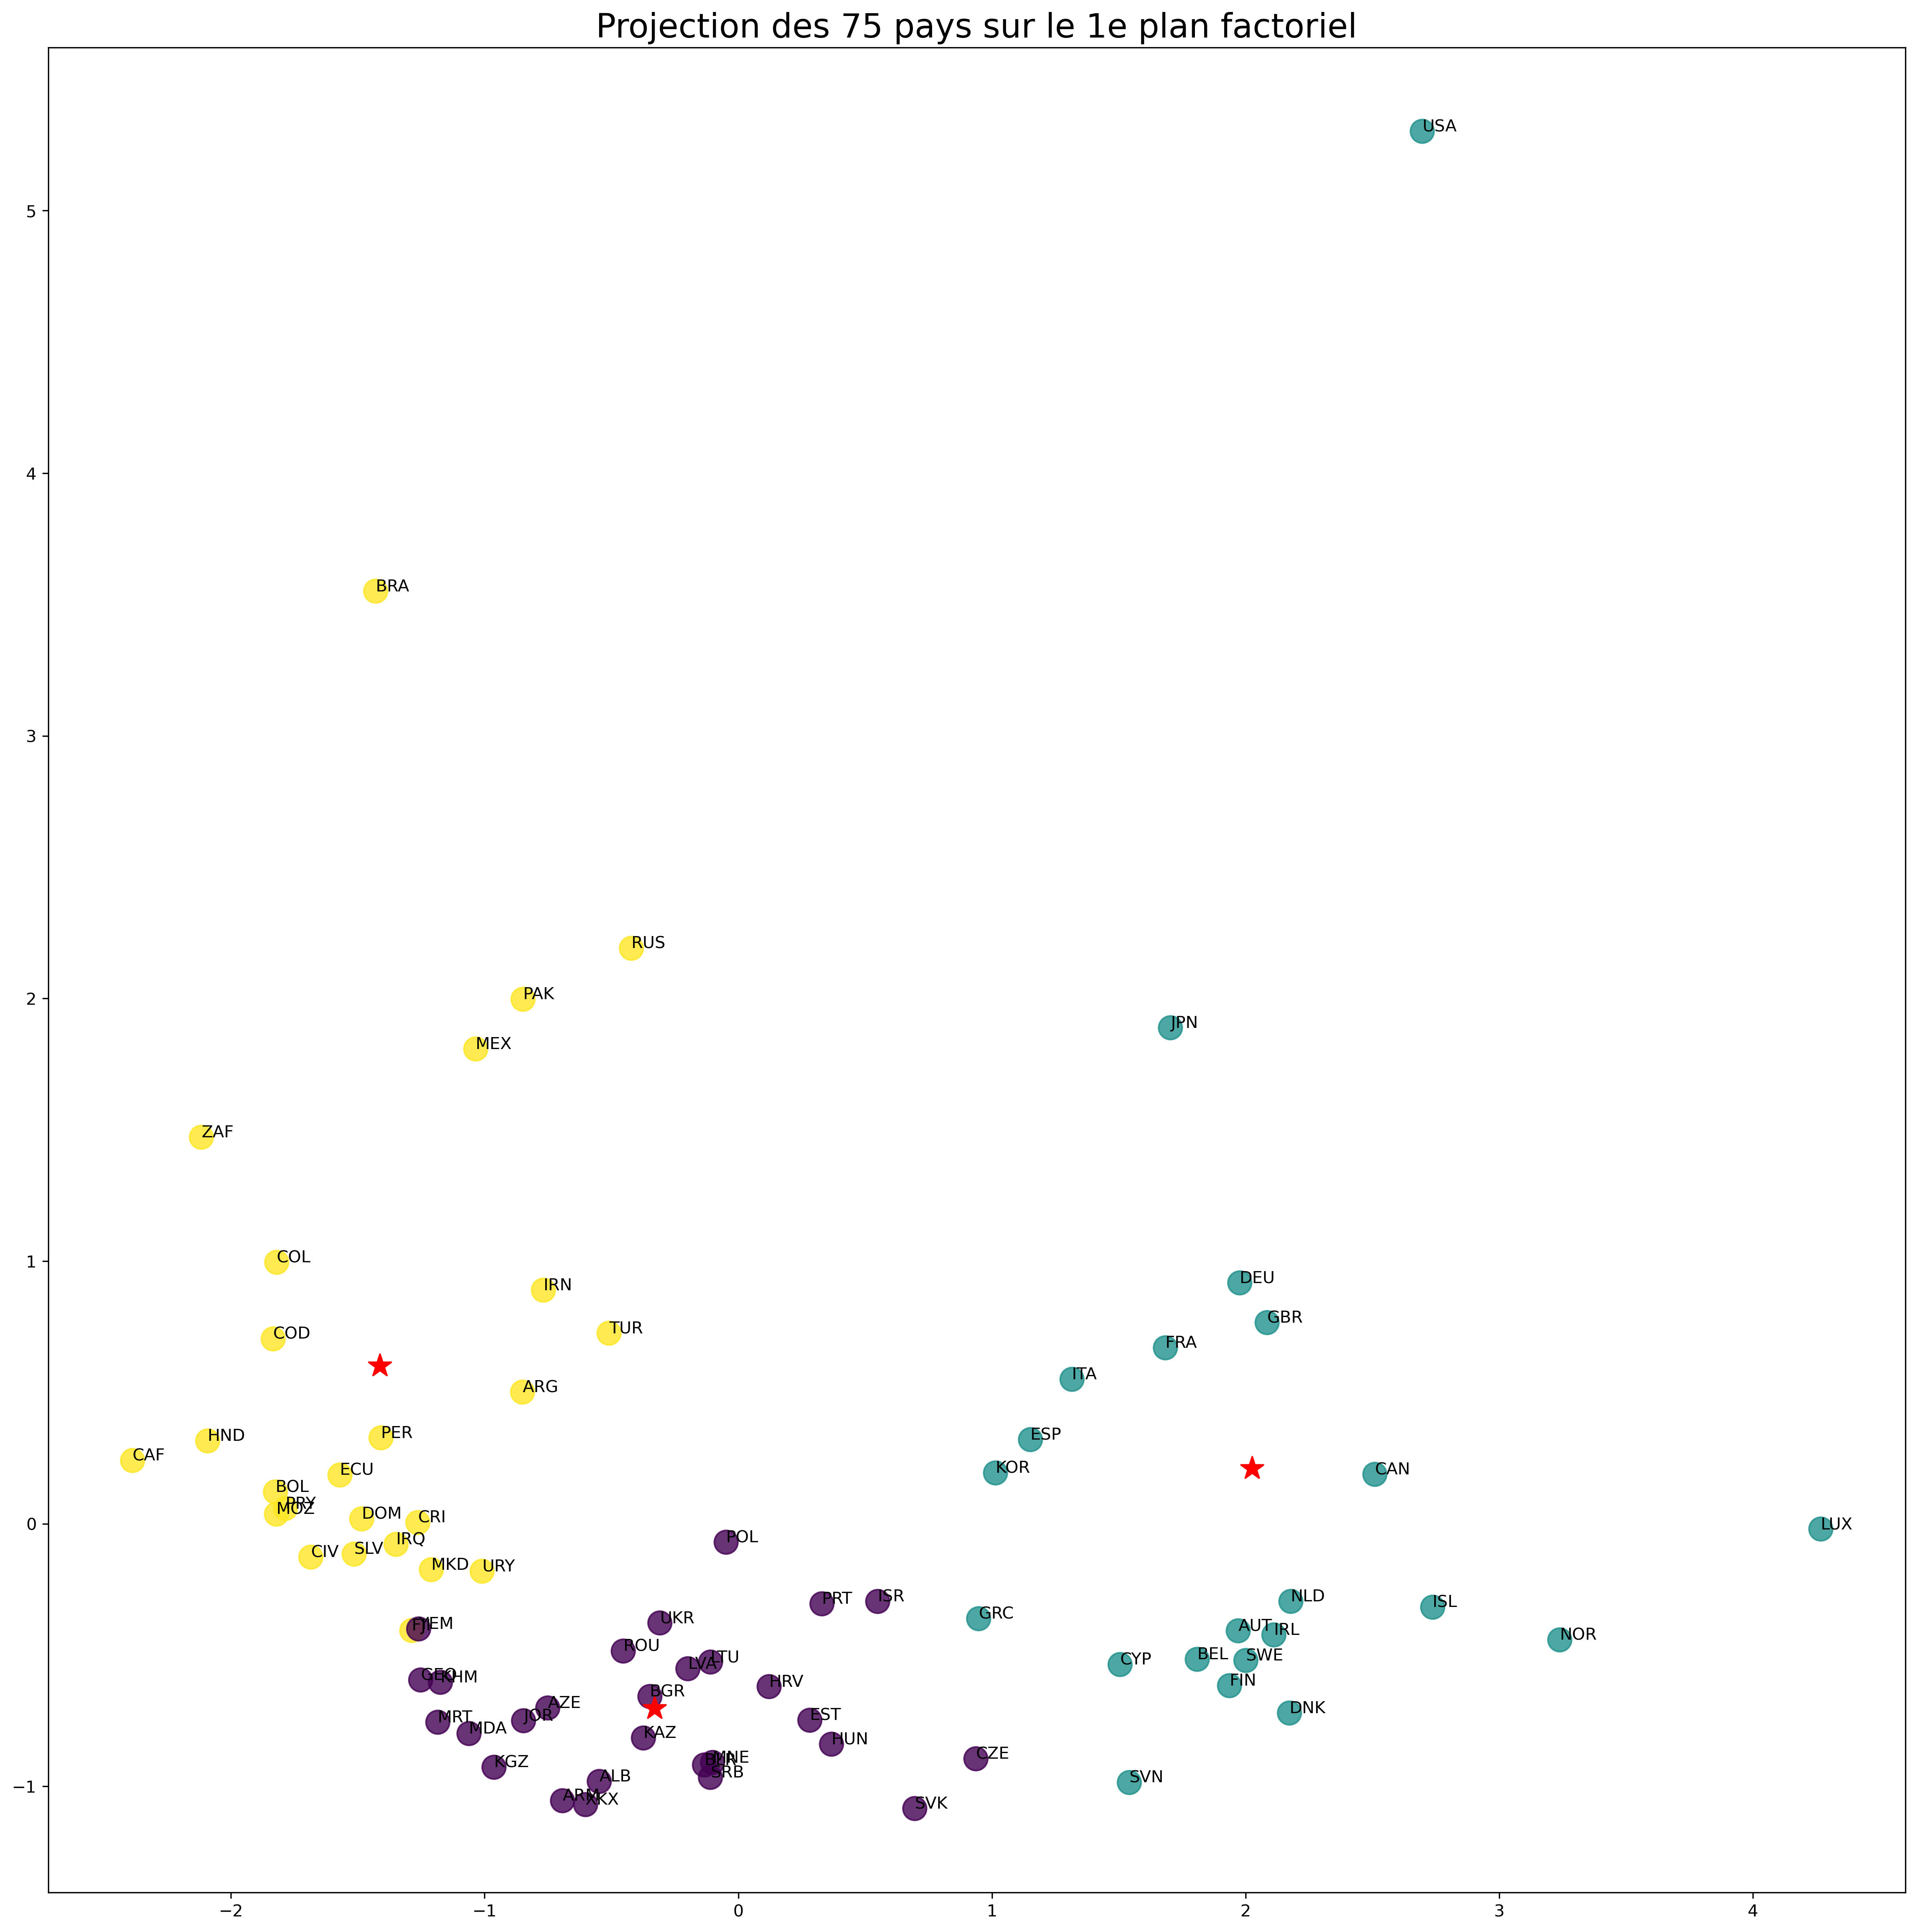

In [168]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.figure(figsize=(20,20), dpi=300)
plt.scatter(coord[:, 0], coord[:, 1], s=50*4, c=clusters, alpha=.8)
plt.title("Projection des {} pays sur le 1e plan factoriel".format(coord.shape[0]), size=20)

for i in range(n):
    plt.annotate(D.index[i],(coord[i,0],coord[i,1]), size=10 ) 
# il suffit d'annoter les nuages de points
# et de les colorier en fonction des clusters associés à chaque pays 'c=clusters.astype(np.float)'

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50*4, color='red', marker='*', label='centroid') # centroïdes
plt.savefig("Projection des pays sur le premier plan factoriel")
plt.show(block=False)

In [169]:
'ECU', 'ZAF', 'BGR', 'ISR', 'NLD', 'LUX','JPN', 'USA', 'RUS', 'BRA'

('ECU', 'ZAF', 'BGR', 'ISR', 'NLD', 'LUX', 'JPN', 'USA', 'RUS', 'BRA')

In [170]:
# création d'un dataframe contenant les clusters associés à chaque pays
df_clusters = df.copy()
df_clusters['clusters'] = clusters
df_clusters

,country,country_name,income,gdpppp,population,gini,clusters
49,ALB,Albania,2493.83700,7297.00000,2947314.0,29.98,0
149,ARG,Argentina,4132.66550,13220.00000,40080159.0,45.30,2
249,ARM,Armenia,1428.15540,5611.00000,2907615.0,29.19,0
349,AUT,Austria,14569.91700,36193.00000,8321496.0,30.44,1
449,AZE,Azerbaijan,1939.94010,8101.00000,8763400.0,33.70,0
...,...,...,...,...,...,...,...
11547,URY,Uruguay,3532.97440,11682.00000,3340221.0,45.06,2
11647,USA,United States,18981.20700,43261.00000,304093966.0,37.80,1
12047,YEM,"Yemen, Rep.",786.60210,2224.00000,21892149.0,36.48,0
12147,ZAF,South Africa,2030.94200,9602.00000,49779472.0,63.00,2


In [171]:
df_clusters[df_clusters["clusters"]==0]

,country,country_name,income,gdpppp,population,gini,clusters
49,ALB,Albania,2493.8370,7297.0000,2947314.0,29.9800,0
249,ARM,Armenia,1428.1554,5611.0000,2907615.0,29.1900,0
449,AZE,Azerbaijan,1939.9401,8101.0000,8763400.0,33.7000,0
849,BGR,Bulgaria,4111.9720,11993.0000,7492561.0,33.5700,0
1049,BLR,Belarus,3493.3580,11651.0000,9527985.0,27.8300,0
2349,CZE,Czech Republic,7298.8510,23223.0000,10384603.0,24.7000,0
3049,EST,Estonia,6539.6855,18773.0000,1337090.0,31.9200,0
3549,GEO,Georgia,1071.5409,4516.0000,3848449.0,38.5300,0
4149,HRV,Croatia,6510.2354,17219.0000,4309705.0,33.7100,0
4249,HUN,Hungary,5429.5820,18004.0000,10038188.0,27.5100,0


In [172]:
df_clusters[df_clusters["clusters"]==1]

,country,country_name,income,gdpppp,population,gini,clusters
349,AUT,Austria,14569.917,36193.0,8321496.0,30.44,1
549,BEL,Belgium,13094.941,33561.0,10709973.0,28.37,1
1549,CAN,Canada,20165.553,35895.0,33247118.0,31.40,1
2249,CYP,Cyprus,15087.067,26273.0,1081568.0,31.71,1
2449,DEU,Germany,15207.665,33758.0,82110097.0,31.07,1
2549,DNK,Denmark,14904.404,34130.0,5493621.0,25.25,1
2949,ESP,Spain,11487.777,28336.0,45954106.0,34.22,1
3149,FIN,Finland,14104.846,33626.0,5313399.0,27.84,1
3349,FRA,France,14989.088,30357.0,64374979.0,33.00,1
3449,GBR,United Kingdom,17876.549,34048.0,61806995.0,34.14,1


In [173]:
df_clusters[df_clusters["clusters"]==2]

,country,country_name,income,gdpppp,population,gini,clusters
149,ARG,Argentina,4132.66550,13220.000000,40080159.0,45.300,2
1149,BOL,Bolivia,1758.69230,3950.000000,9721457.0,50.820,2
1249,BRA,Brazil,2768.40110,9559.000000,192030362.0,54.040,2
1449,CAF,Central African Republic,441.09370,685.000000,4273368.0,56.240,2
1849,CIV,Cote d'Ivoire,289.95697,1526.000000,19605568.0,43.180,2
2049,COL,Colombia,1914.86510,8185.000000,44254972.0,55.540,2
2149,CRI,Costa Rica,3415.50880,10374.000000,4463123.0,48.680,2
2649,DOM,Dominican Republic,2178.20430,7505.000000,9458079.0,48.110,2
2749,ECU,Ecuador,2064.95500,7560.000000,14535740.0,49.730,2
3249,FJI,Fiji,1443.74570,7785.161991,845356.0,42.800,2


__Choix des pays représentatifs :__

Les pays représentatifs sont choisis par rapport à leur proximité avec les centroïdes ou leur position atypique, à l'extrémité.
Ainsi nous sélectionnons au sein des mêmes clusters : 
- L'équateur et l'Afrique du Sud, le Brésil et la Russie;
- Les Etats-Unis, La Nouvelle-Zélande, le Luxembourg, Le Japon;
 - La Bulgarie et Israël.

In [174]:
liste_pays_repr = ['ECU', 'ZAF', 'BGR', 'ISR', 'NLD', 'LUX','JPN', 'USA', 'RUS','BRA']
liste_pays_repr

['ECU', 'ZAF', 'BGR', 'ISR', 'NLD', 'LUX', 'JPN', 'USA', 'RUS', 'BRA']

### Représentation de la diversité des revenus :

In [175]:
mean_rev = dataset[['country', 'country_name', 'year_survey',
       'income', 'gdpppp']].groupby(['country', 'country_name', 'year_survey',
        'gdpppp'], as_index=False).mean()
mean_rev['ln_income'] = np.log(mean_rev["income"])
mean_rev

,country,country_name,year_survey,gdpppp,income,ln_income
0,ALB,Albania,2008,7297.00,2994.829902,8.004643
1,ARG,Argentina,2008,13220.00,5847.884654,8.673835
2,ARM,Armenia,2008,5611.00,1628.382785,7.395343
3,AUT,Austria,2008,36193.00,16637.600204,9.719420
4,AZE,Azerbaijan,2008,8101.00,2357.429023,7.765327
...,...,...,...,...,...,...
110,VEN,"Venezuela, RB",2006,11756.00,3167.147724,8.060587
111,VNM,Vietnam,2006,2578.00,1377.773966,7.228224
112,XKX,Kosovo,2008,6545.42,2176.269035,7.685367
113,YEM,"Yemen, Rep.",2008,2224.00,1042.635870,6.949507


In [176]:
diversite_rev = mean_rev.loc[(mean_rev['country'].isin(liste_pays_repr))] 
diversite_rev

,country,country_name,year_survey,gdpppp,income,ln_income
8,BGR,Bulgaria,2008,11993.0,4984.978559,8.514184
12,BRA,Brazil,2008,9559.0,4807.484594,8.477929
28,ECU,Ecuador,2008,7560.0,3383.741001,8.126737
50,ISR,Israel,2008,25740.0,11100.318137,9.314729
53,JPN,Japan,2008,31307.0,17432.961184,9.766118
63,LUX,Luxembourg,2008,73127.0,25217.562681,10.135296
80,NLD,Netherlands,2008,38065.0,17728.641151,9.782937
92,RUS,Russian Federation,2008,14766.0,7156.770709,8.875814
109,USA,United States,2008,43261.0,25503.581661,10.146574
114,ZAF,South Africa,2008,9602.0,5617.904880,8.633714


In [177]:
diversite_rev = dataset.loc[(dataset['country'].isin(liste_pays_repr))] 
diversite_rev

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
800,BGR,Bulgaria,2008,1,100,271.09310,11993.0,7492561.0,33.57
801,BGR,Bulgaria,2008,2,100,614.30676,11993.0,7492561.0,33.57
802,BGR,Bulgaria,2008,3,100,796.17330,11993.0,7492561.0,33.57
803,BGR,Bulgaria,2008,4,100,963.79090,11993.0,7492561.0,33.57
804,BGR,Bulgaria,2008,5,100,1048.52170,11993.0,7492561.0,33.57
...,...,...,...,...,...,...,...,...,...
12193,ZAF,South Africa,2008,96,100,24553.56800,9602.0,49779472.0,63.00
12194,ZAF,South Africa,2008,97,100,28858.03100,9602.0,49779472.0,63.00
12195,ZAF,South Africa,2008,98,100,35750.29000,9602.0,49779472.0,63.00
12196,ZAF,South Africa,2008,99,100,46297.31600,9602.0,49779472.0,63.00


In [178]:
dataset_log = dataset.copy()
dataset_log['ln_income'] = np.log(dataset["income"])
dataset_log

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini,ln_income
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.980,6.591534
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.980,6.820739
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.980,6.918612
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.980,6.991092
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.980,7.032359
...,...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911.78340,303.19305,60411195.0,45.700,6.815402
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,45.700,6.963954
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,45.700,7.159761
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,45.700,7.715624


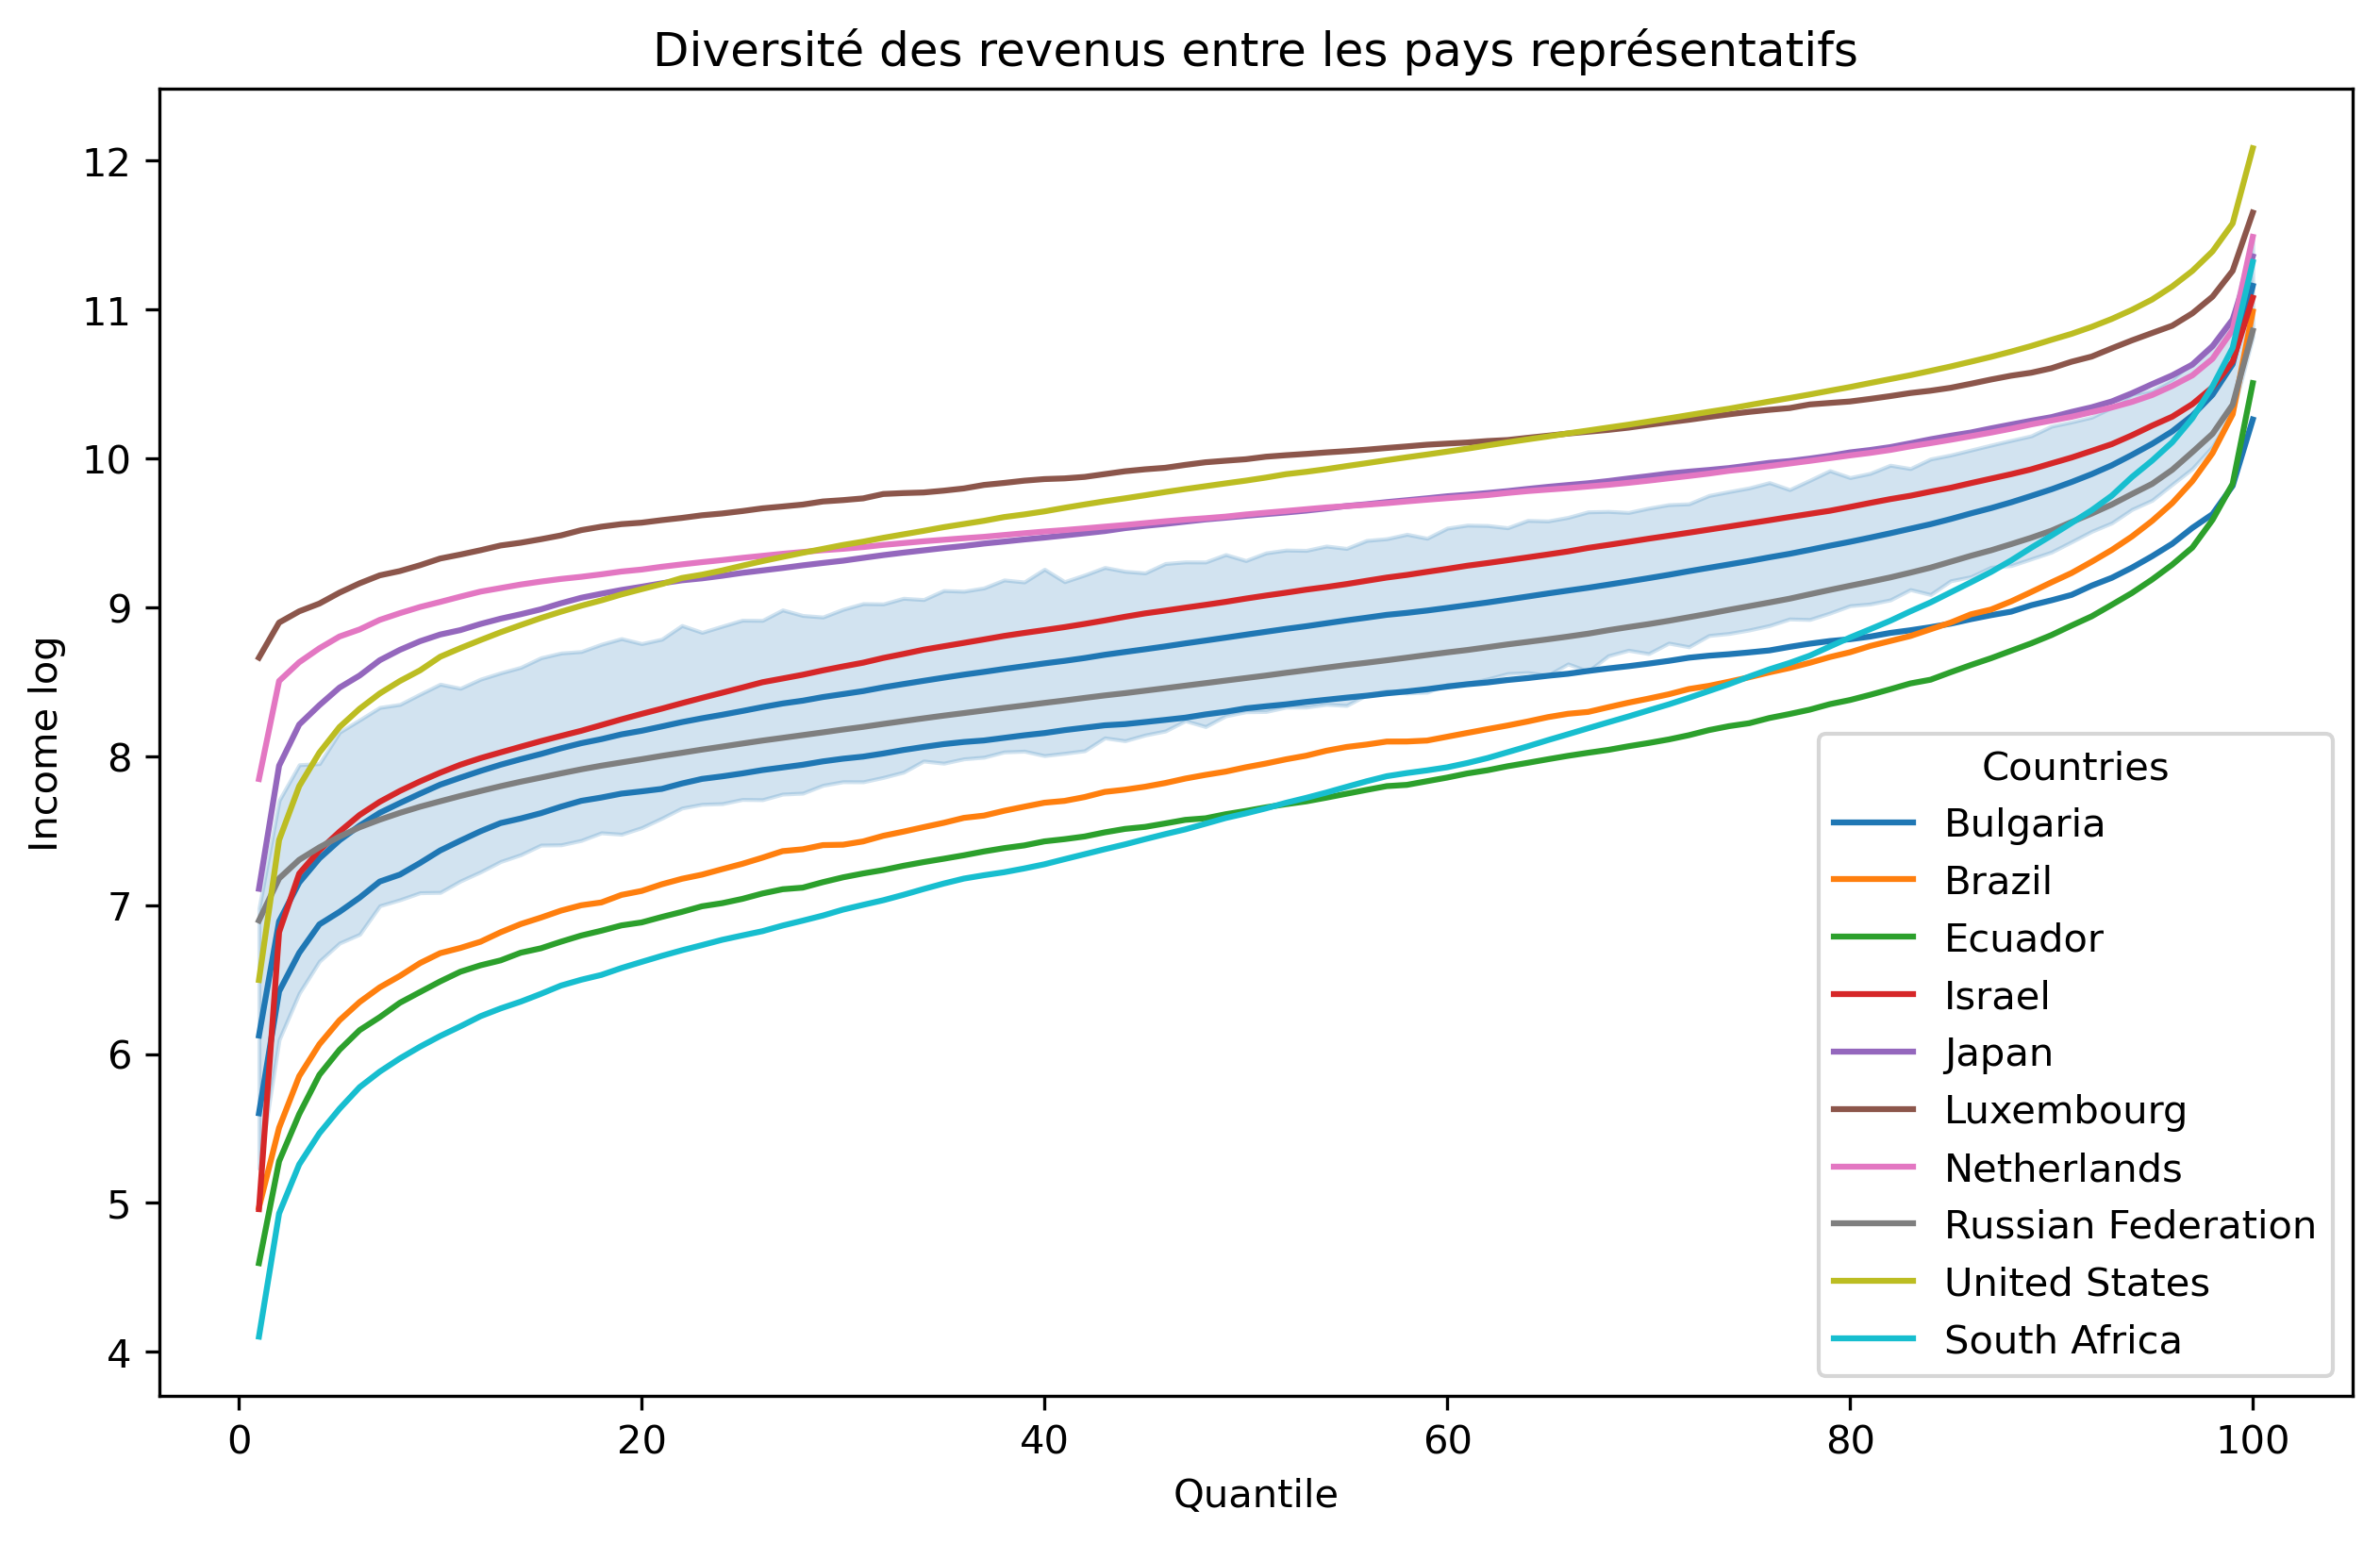

In [179]:
plt.figure(figsize=(10,6), dpi=300)
diversite_rev = dataset_log.loc[(dataset_log['country'].isin(liste_pays_repr))] 

ax = sns.lineplot(x="quantile", y="ln_income", data=diversite_rev)
ax.set_xlabel ("Quantile")
ax.set_ylabel ("Income log")
plt.title("Diversité des revenus entre les pays représentatifs")
                  
sns.lineplot(x=diversite_rev["quantile"], y=diversite_rev["ln_income"], hue=diversite_rev["country_name"])
plt.legend(title = "Countries")
plt.savefig("Diversité des revenus entre pays représentatifs")

### Représentation graphique de la Courbe de Lorenz de chaque pays :

In [180]:
# df avec 100 quantiles par pays
# uniquement les pays sélectionnés 

df_pays_repr = dataset.loc[dataset["country"].isin(liste_pays_repr)]
df_pays_repr

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
800,BGR,Bulgaria,2008,1,100,271.09310,11993.0,7492561.0,33.57
801,BGR,Bulgaria,2008,2,100,614.30676,11993.0,7492561.0,33.57
802,BGR,Bulgaria,2008,3,100,796.17330,11993.0,7492561.0,33.57
803,BGR,Bulgaria,2008,4,100,963.79090,11993.0,7492561.0,33.57
804,BGR,Bulgaria,2008,5,100,1048.52170,11993.0,7492561.0,33.57
...,...,...,...,...,...,...,...,...,...
12193,ZAF,South Africa,2008,96,100,24553.56800,9602.0,49779472.0,63.00
12194,ZAF,South Africa,2008,97,100,28858.03100,9602.0,49779472.0,63.00
12195,ZAF,South Africa,2008,98,100,35750.29000,9602.0,49779472.0,63.00
12196,ZAF,South Africa,2008,99,100,46297.31600,9602.0,49779472.0,63.00


In [181]:
df_pays_repr['country_name'].unique()

array(['Bulgaria', 'Brazil', 'Ecuador', 'Israel', 'Japan', 'Luxembourg',
       'Netherlands', 'Russian Federation', 'United States',
       'South Africa'], dtype=object)

In [182]:
nom_pays_repr = ['Bulgaria', 'Brazil', 'Ecuador', 'Israel', 'Japan', 'Luxembourg',
       'Netherlands', 'Russian Federation','United States',
       'South Africa']
nom_pays_repr

['Bulgaria',
 'Brazil',
 'Ecuador',
 'Israel',
 'Japan',
 'Luxembourg',
 'Netherlands',
 'Russian Federation',
 'United States',
 'South Africa']

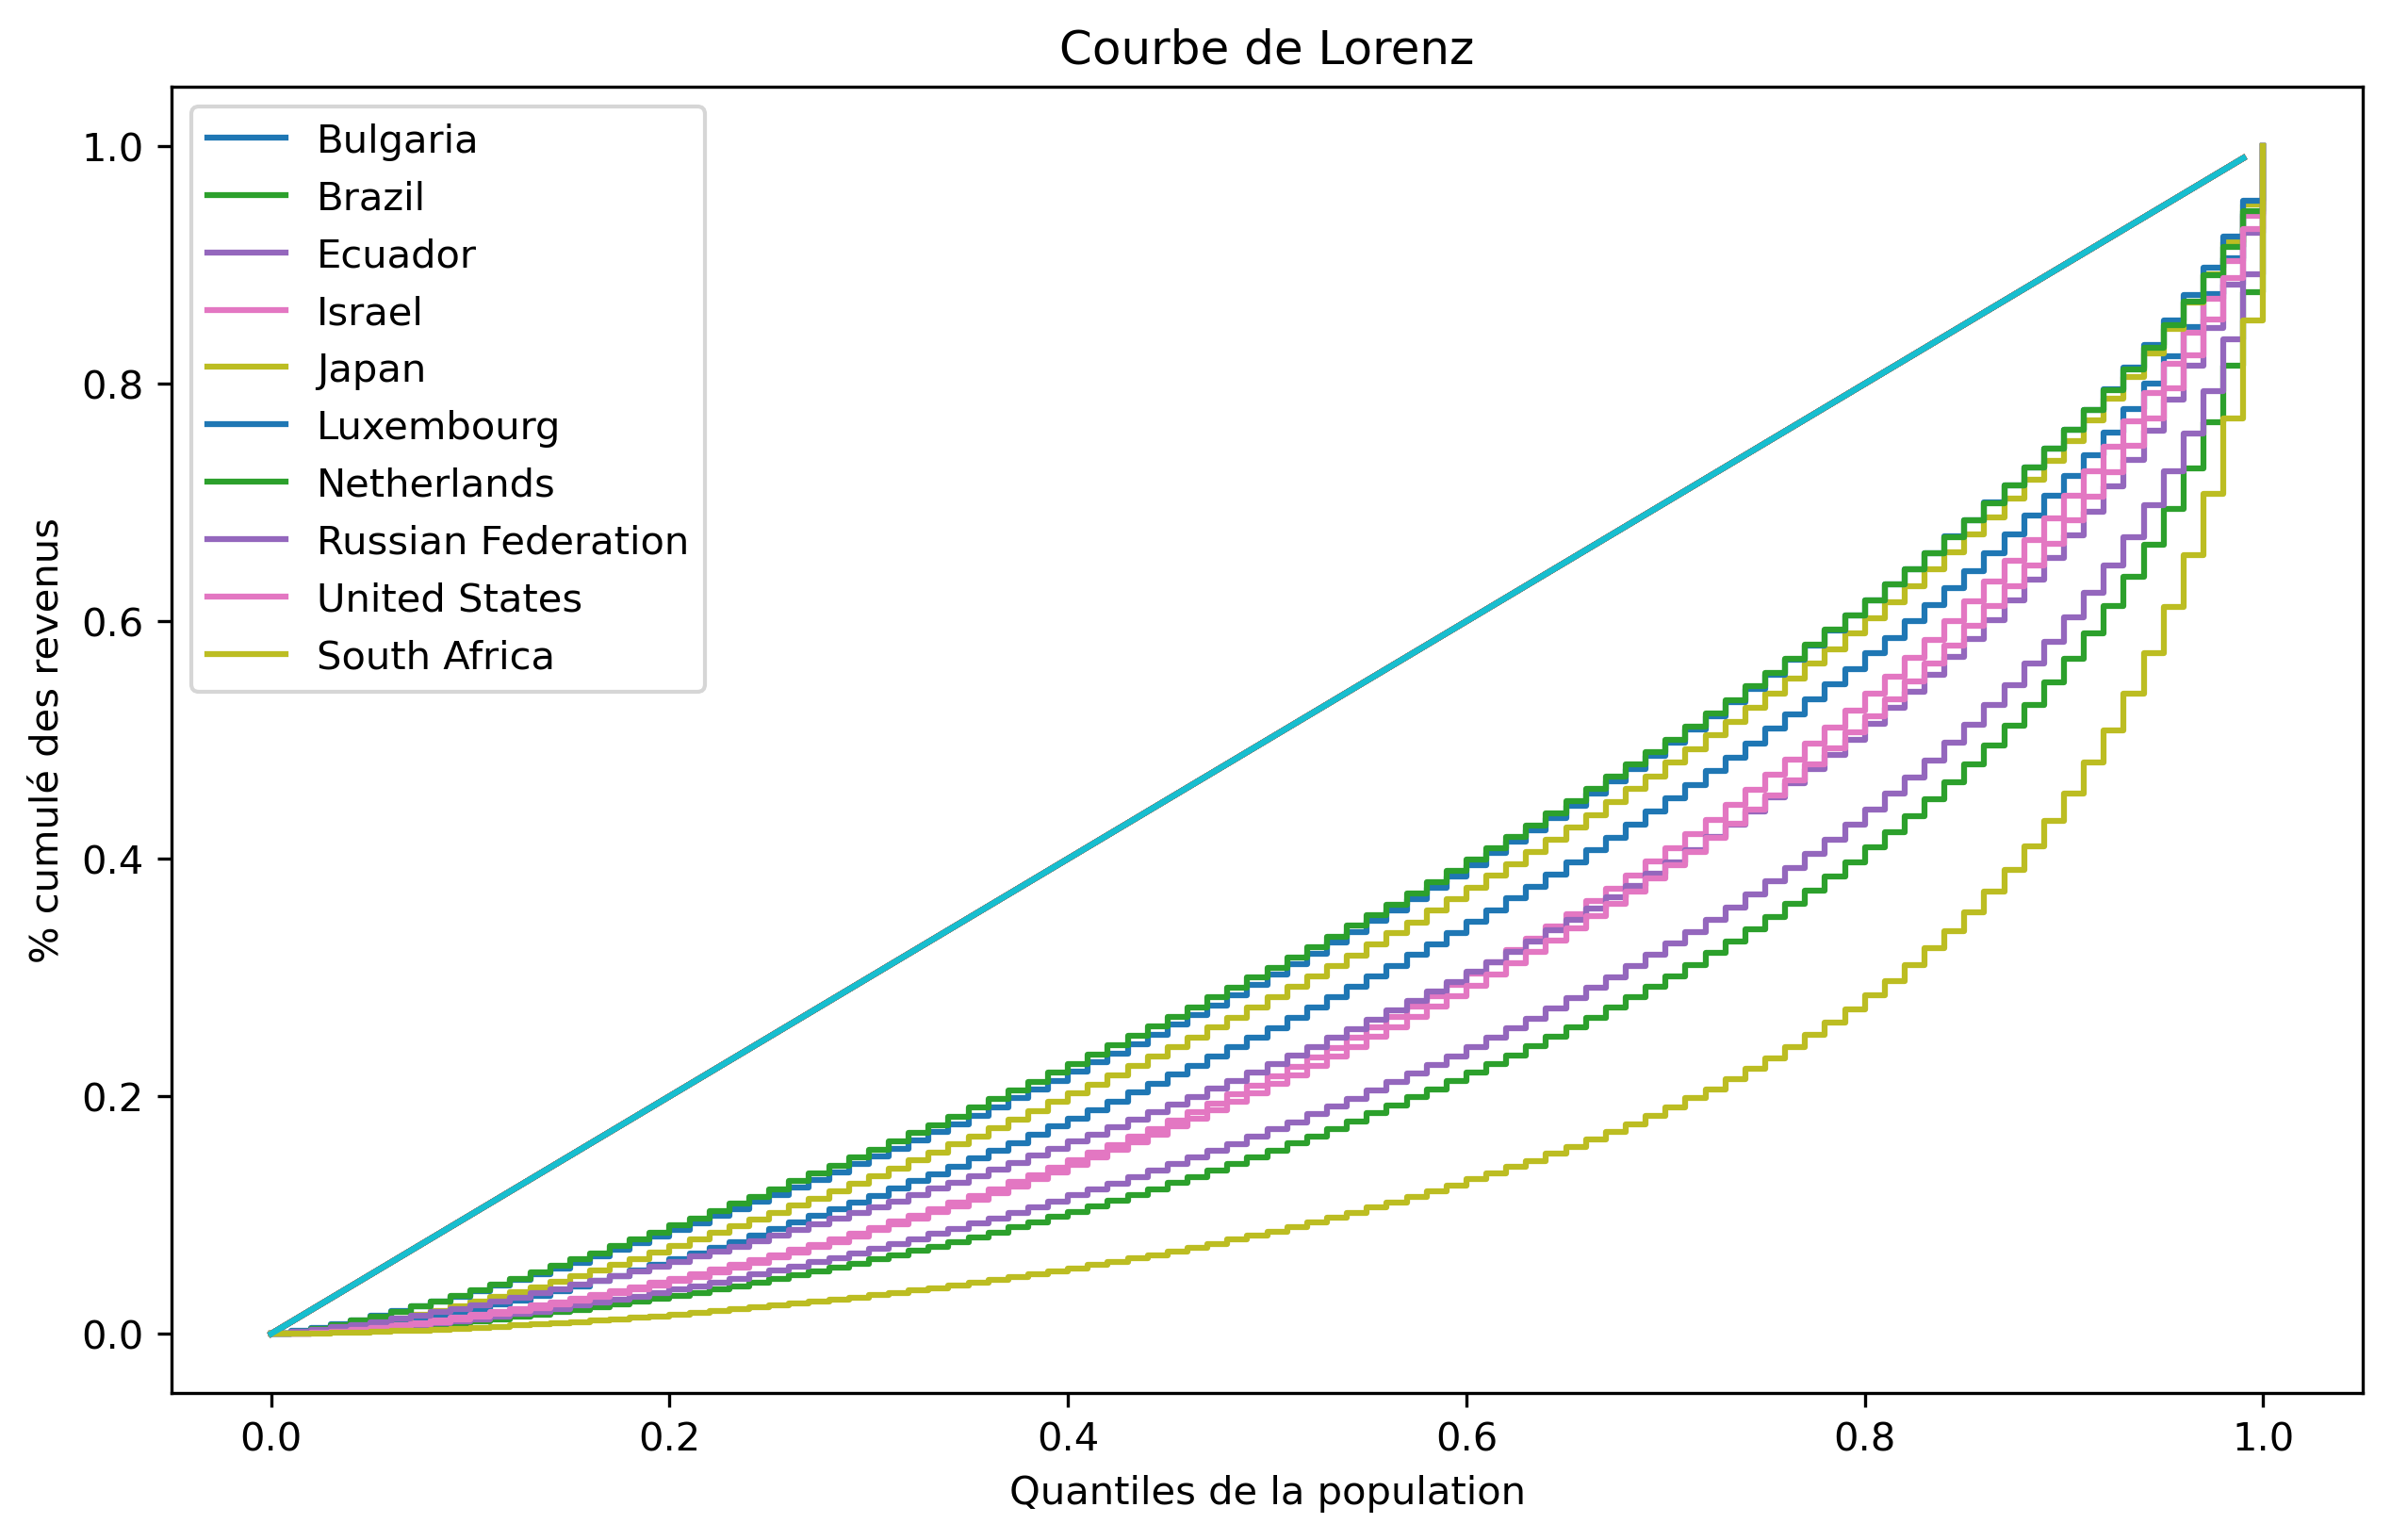

<Figure size 640x480 with 0 Axes>

In [183]:
plt.figure(figsize=(10,6), dpi=300)
for i in range(len(liste_pays_repr)):
    subset=df_pays_repr.loc[(df_pays_repr['country_name']==nom_pays_repr[i]),:] # pour avoir un array de même dimension
    rev = subset['income'].values
    lorenz = np.cumsum(np.sort(rev)) / rev.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post',
         label=nom_pays_repr[i])
    
    a = np.arange(0,1,.01)
    x = a
    y = a
    sns.lineplot(x=x,y=y)
    
plt.title("Courbe de Lorenz")
plt.xlabel('Quantiles de la population')
plt.ylabel('% cumulé des revenus')
plt.legend()
plt.show()

plt.savefig("Courbe_Lorenz_Pays.png")

# commentaire pour la présentation : possible d'en faire une par pays 

### Evolution de l'indice de Gini au fil des ans :

In [184]:
gini_wb # données coefficient de Gini issues de la Banque Mondiale

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
3,4,Albania,ALB,AL,1996,27.01,NaN,NaN,NaN,NaN,...,3098699.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
4,5,Albania,ALB,AL,2002,31.74,NaN,NaN,NaN,NaN,...,3126183.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
5,6,Albania,ALB,AL,2005,30.60,NaN,NaN,NaN,NaN,...,3086810.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
6,7,Albania,ALB,AL,2008,29.98,NaN,NaN,NaN,NaN,...,3002683.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
7,8,Albania,ALB,AL,2012,28.96,NaN,NaN,NaN,NaN,...,2914091.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20206,20785,Zimbabwe,ZWE,ZW,1990,56.80,NaN,NaN,NaN,NaN,...,10432409.0,NaN,Low,13,World Bank,World Bank 2002,Poverty Monitoring Database,Poverty Income Consumption and Expenditure Sur...,NaN,No
20207,20786,Zimbabwe,ZWE,ZW,1995,74.60,NaN,NaN,NaN,NaN,...,11410721.0,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,Poverty Income Consumption and Expenditure Sur...,NaN,Yes
20208,20787,Zimbabwe,ZWE,ZW,1995,70.30,NaN,NaN,NaN,NaN,...,11410721.0,NaN,Low,13,World Bank,"Deininger and Squire, World Bank 2004",World Bank. Compilation,Poverty Income Consumption and Expenditure Sur...,NaN,No
20212,20791,Zimbabwe,ZWE,ZW,2011,43.15,NaN,NaN,NaN,NaN,...,12894323.0,New 2021,Average,13,World Bank,PovcalNet,NaN,NaN,http://iresearch.worldbank.org/PovcalNet/povOn...,Yes


In [185]:
liste_pays_repr

['ECU', 'ZAF', 'BGR', 'ISR', 'NLD', 'LUX', 'JPN', 'USA', 'RUS', 'BRA']

In [186]:
gini_pays_repr = gini_wb.loc[gini_wb["country"].isin(nom_pays_repr)]
gini_pays_repr = gini_pays_repr[["c3", "country", "year", "gini", "quality_score"]]
gini_pays_repr[gini_pays_repr['country']=='Brazil']['year'].unique()

array([1960, 1970, 1972, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1992, 1993, 1995, 1996, 1997,
       1998, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [187]:
gini_pays_repr = gini_wb.loc[gini_wb["country"].isin(nom_pays_repr)]
gini_pays_repr = gini_pays_repr[["c3", "country", "year", "gini"]]
gini_pays_repr[gini_pays_repr['c3']=='USA']['year'].unique()

array([1970, 1974, 1979, 1986, 1991, 1994, 1997, 2000, 2004, 2007, 2010,
       2013, 2016])

In [188]:
gini_pays_repr = gini_wb.loc[gini_wb["country"].isin(nom_pays_repr)]
gini_pays_repr = gini_pays_repr[["c3", "country", "year", "gini", "quality_score"]]
gini_pays_repr[gini_pays_repr['c3']=='ZAF']['year'].unique()

array([1965, 1993, 1996, 1997, 2001, 2005, 2009, 2010, 2015])

In [189]:
gini_pays_repr = gini_wb.loc[gini_wb["country"].isin(nom_pays_repr)]
gini_pays_repr = gini_pays_repr[["c3", "country", "year", "gini", "quality_score"]]
gini_pays_repr[gini_pays_repr['c3']=='PER']['year'].unique()

array([], dtype=int64)

In [190]:
gini_pays_repr = gini_wb.loc[gini_wb["country"].isin(nom_pays_repr)]
gini_pays_repr = gini_pays_repr[["c3", "country", "year", "gini"]]
gini_pays_repr[gini_pays_repr['c3']=='DNK']['year'].unique()

array([], dtype=int64)

In [191]:
year_scope = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
year_scope

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

In [192]:
evolution_gini = gini_pays_repr[gini_pays_repr["year"].isin(year_scope)] # on sélectionne les données entre 2004 et 2011
evolution_gini

,c3,country,year,gini
1873,BRA,Brazil,2004,56.48
1882,BRA,Brazil,2005,56.32
1901,BRA,Brazil,2006,55.65
1910,BRA,Brazil,2007,54.93
1919,BRA,Brazil,2008,54.04
1938,BRA,Brazil,2009,53.69
1962,BRA,Brazil,2011,52.95
2128,BGR,Bulgaria,2006,35.70
2141,BGR,Bulgaria,2007,36.10
2142,BGR,Bulgaria,2007,28.14


In [193]:
# ajout des coefficients de Gini manquants pour l'année 2008

evolution_gini = evolution_gini.append(
    {'c3' : 'ZAF' , 
     'country' : 'South Africa',
     'year': 2008,
     'gini': 0.669779*100,
    } , ignore_index=True)

/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18000/3197794326.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evolution_gini = evolution_gini.append(


In [194]:
evolution_gini = evolution_gini.append(
    {'c3' : 'USA' , 
     'country' : 'United States',
     'year': 2008,
     'gini': 0.431799*100,
    } , ignore_index=True)

/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18000/3746679434.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evolution_gini = evolution_gini.append(


In [195]:
# Brazil 2010
# 2010 : 52.11 (WB, données fin 2009)

# Bulgaria 2004 et 2005
# 2004 : 26, 2005 : 25

# South Africa 2005, 2006, 2007, 2011
# 2005 : 65
# 2006 : 67.4
# 2007 : 63
# 2011, 64 (IMF, données de 2010)

# USA 2005, 2009, 2011
# 2005 : 46.9, 2009 : 46.8, 2011 46.3

In [196]:
# Japon : imputation par la moyenne

jpn_gini_moy = evolution_gini[evolution_gini["c3"] == 'JPN']['gini'].mean()
jpn_gini_moy

33.47

In [197]:
# Israel : imputation par la moyenne

isr_gini_moy = evolution_gini[evolution_gini["c3"] == 'ISR']['gini'].mean()
isr_gini_moy

41.806666666666665

In [198]:
evolution_gini = evolution_gini.append(  # WB
    {'c3' : 'BRA' , 
     'country' : 'Brazil',
     'year': 2010,
     'gini': 52.11,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(  # WID, archives
    {'c3' : 'BGR' , 
     'country' : 'Bulgaria',
     'year': 2004,
     'gini': 26,
    } , ignore_index=True)

evolution_gini = evolution_gini.append( # WID, archies
    {'c3' : 'BGR' , 
     'country' : 'Bulgaria',
     'year': 2005,
     'gini': 25,
    } , ignore_index=True)

evolution_gini = evolution_gini.append( # WId, archives & IMF
    {'c3' : 'ZAF' , 
     'country' : 'South Africa',
     'year': 2005,
     'gini': 65,
    } , ignore_index=True)

evolution_gini = evolution_gini.append( # WId, archives
    {'c3' : 'ZAF' , 
     'country' : 'South Africa',
     'year': 2006,
     'gini': 67.4,
    } , ignore_index=True)

evolution_gini = evolution_gini.append( # IMF
    {'c3' : 'ZAF' , 
     'country' : 'South Africa',
     'year': 2007,
     'gini': 63,
    } , ignore_index=True)

evolution_gini = evolution_gini.append( # IMF
    {'c3' : 'ZAF' , 
     'country' : 'South Africa',
     'year': 2011,
     'gini': 64,
    } , ignore_index=True)

evolution_gini = evolution_gini.append( # WID archives
    {'c3' : 'USA' , 
     'country' : 'United States',
     'year': 2005,
     'gini': 46.9,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'USA' , 
     'country' : 'United States',
     'year': 2009,
     'gini': 46.8,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'USA' , 
     'country' : 'United States',
     'year': 2011,
     'gini': 46.3,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'JPN' , 
     'country' : 'Japan',
     'year': 2004,
     'gini': 33.47,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'JPN' , 
     'country' : 'Japan',
     'year': 2005,
     'gini': 33.47,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'JPN' , 
     'country' : 'Japan',
     'year': 2006,
     'gini': 33.47,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'JPN' , 
     'country' : 'Japan',
     'year': 2007,
     'gini': 33.47,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'JPN' , 
     'country' : 'Japan',
     'year': 2009,
     'gini': 33.47,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'JPN' , 
     'country' : 'Japan',
     'year': 2011,
     'gini': 33.47,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'ISR' , 
     'country' : 'Israel',
     'year': 2004,
     'gini': 41.81,
    } , ignore_index=True)

evolution_gini = evolution_gini.append(
    {'c3' : 'ISR' , 
     'country' : 'Israel',
     'year': 2011,
     'gini': 41.81,
    } , ignore_index=True)

/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18000/808131902.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evolution_gini = evolution_gini.append(  # WB
/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18000/808131902.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evolution_gini = evolution_gini.append(  # WID, archives
/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18000/808131902.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evolution_gini = evolution_gini.append( # WID, archies
/var/folders/n7/k95c1mwn0yn6l4mkzz82jmxh0000gn/T/ipykernel_18000/808131902.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [199]:
evolution_gini

,c3,country,year,gini
0,BRA,Brazil,2004,56.48
1,BRA,Brazil,2005,56.32
2,BRA,Brazil,2006,55.65
3,BRA,Brazil,2007,54.93
4,BRA,Brazil,2008,54.04
...,...,...,...,...
64,JPN,Japan,2007,33.47
65,JPN,Japan,2009,33.47
66,JPN,Japan,2011,33.47
67,ISR,Israel,2004,41.81


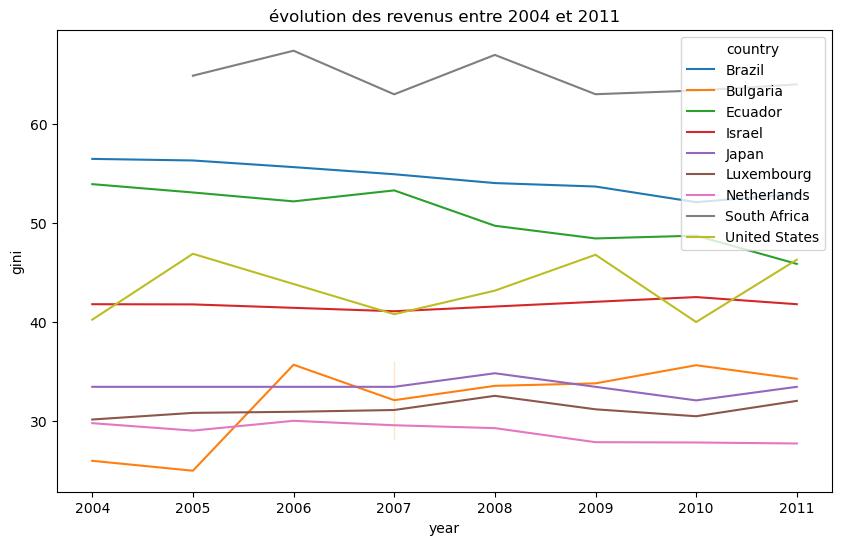

In [200]:
plt.figure(figsize=(10,6))
sns.lineplot(data=evolution_gini, x='year', y='gini', hue='country') # absence de données pour certaines années d'où le profil de la courbe
plt.title("évolution des revenus entre 2004 et 2011")
plt.savefig("évolution des coefficients de Gini entre 2004 et 2011.jpg")

In [201]:
# chercher les valeurs manquantes 

In [202]:
gini_pays_repr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1702 to 19464
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   c3       205 non-null    object 
 1   country  205 non-null    object 
 2   year     205 non-null    int64  
 3   gini     205 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.0+ KB


In [203]:
gini_pays_repr.isnull().sum()

c3         0
country    0
year       0
gini       0
dtype: int64

In [204]:
gini_pays_repr["year"].unique()

array([1960, 1970, 1972, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1992, 1993, 1995, 1996, 1997,
       1998, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 1957, 1962, 1994,
       2010, 1965, 1968, 2000, 1963, 1969, 1971, 1991, 1967, 1974])

In [205]:
liste_pays_repr

['ECU', 'ZAF', 'BGR', 'ISR', 'NLD', 'LUX', 'JPN', 'USA', 'RUS', 'BRA']

In [206]:
dataset

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.980
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.980
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.980
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.980
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.980
...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911.78340,303.19305,60411195.0,45.700
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,45.700
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,45.700
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,45.700


In [207]:
df_quantiles = dataset.copy()
df_quantiles = df_quantiles.astype({'income' : 'int'})  # transformer les valeurs de income en intégrales
df_quantiles

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728,7297.00000,2947314.0,29.980
1,ALB,Albania,2008,2,100,916,7297.00000,2947314.0,29.980
2,ALB,Albania,2008,3,100,1010,7297.00000,2947314.0,29.980
3,ALB,Albania,2008,4,100,1086,7297.00000,2947314.0,29.980
4,ALB,Albania,2008,5,100,1132,7297.00000,2947314.0,29.980
...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911,303.19305,60411195.0,45.700
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057,303.19305,60411195.0,45.700
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286,303.19305,60411195.0,45.700
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243,303.19305,60411195.0,45.700


In [208]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
compute_gini = 2*S
compute_gini

0.5597046682527949

In [209]:
dataset_final

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.79
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.46
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,36.48
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,63.00


> **_Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?_**

In [210]:
top_gini = dataset_final[['country_name', 'gini']].groupby(['country_name'], as_index=False).sum().sort_values(by='gini', ascending=True)
top_gini

,country_name,gini
93,Slovak Republic,23.70
94,Slovenia,23.72
26,Czech Republic,24.70
27,Denmark,25.25
107,Ukraine,26.64
...,...,...
43,Honduras,55.50
20,Colombia,55.54
41,Guatemala,55.90
17,Central African Republic,56.24


Les pays au coefficient de Gini le plus faible en 2008, c'est-à-dire à la répartition la plus égalitaire étaient :
- La Slovénie
- La Slovaquie
- Le Danemark
- La République Tchèque
- L'Ukraine

In [211]:
last_gini = dataset_final[['country_name', 'gini']].groupby(['country_name'], as_index=False).sum().sort_values(by='gini', ascending=False)
last_gini

,country_name,gini
95,South Africa,63.00
17,Central African Republic,56.24
41,Guatemala,55.90
20,Colombia,55.54
43,Honduras,55.50
...,...,...
107,Ukraine,26.64
27,Denmark,25.25
26,Czech Republic,24.70
94,Slovenia,23.72


Les pays au coefficient de Gini le plus élevé en 2008, c'est-à-dire à la répartition la plus inégalitaire étaient :
- L'Afrique du Sud
- Le Guatemala 
- La République centre africaine
- La Colombie
- Le Honduras

In [212]:
mean_gini = dataset_final['gini'].mean()
mean_gini

37.98173188405795

In [213]:
top_gini.loc[top_gini['country_name']=='France']

,country_name,gini
36,France,33.0


Si l'on classe les pays 115 pays du plus égalitaire au plus inégalitaire, la France occupait en 2008 la 36e position.

> ## Mission 3 ##
> Dans l'état actuel, nous avons à disposition deux des trois variables explicatives souhaitées :
>
> - \(m_{j}\) le revenu moyen du pays  \(j\)
> - \(G_{j}\) l'indice de Gini du pays \(j\)

Session 5 : étapes de la mission 3

Mission 2 : 
Pays représentatifs (centroïdes + extrêmes dont la France)
Mission 3 :
obtenir notebook : pays + revenu  + gini
notebook 2 : pays + coeff de gini (de 0 à 1) + income + élasticité par pays
- retrouver les valeurs manquantes en les imputant grâce aux fichiers fournis 
manipuler le code et le modifier en conséquence

In [214]:
dataset

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.980
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.980
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.980
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.980
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.980
...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911.78340,303.19305,60411195.0,45.700
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,45.700
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,45.700
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,45.700


In [215]:
dataset_final # médiane des revenus uniquement

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
49,ALB,Albania,2008,50,100,2493.83700,7297.00000,2947314.0,29.98
149,ARG,Argentina,2008,50,100,4132.66550,13220.00000,40080159.0,45.30
249,ARM,Armenia,2008,50,100,1428.15540,5611.00000,2907615.0,29.19
349,AUT,Austria,2008,50,100,14569.91700,36193.00000,8321496.0,30.44
449,AZE,Azerbaijan,2008,50,100,1939.94010,8101.00000,8763400.0,33.70
...,...,...,...,...,...,...,...,...,...
11847,VNM,Vietnam,2006,50,100,1031.81400,2578.00000,86243424.0,35.79
11947,PSE,West Bank and Gaza,2009,50,100,866.13873,3712.20000,3591977.0,34.46
12047,YEM,"Yemen, Rep.",2008,50,100,786.60210,2224.00000,21892149.0,36.48
12147,ZAF,South Africa,2008,50,100,2030.94200,9602.00000,49779472.0,63.00


In [216]:
data_p7 = dataset_final[["country", "country_name", "gini"]]
data_p7

,country,country_name,gini
49,ALB,Albania,29.98
149,ARG,Argentina,45.30
249,ARM,Armenia,29.19
349,AUT,Austria,30.44
449,AZE,Azerbaijan,33.70
...,...,...,...
11847,VNM,Vietnam,35.79
11947,PSE,West Bank and Gaza,34.46
12047,YEM,"Yemen, Rep.",36.48
12147,ZAF,South Africa,63.00


In [217]:
data_p7_quantiles = dataset[["country", "country_name", "quantile","gini"]]
data_p7_quantiles

,country,country_name,quantile,gini
0,ALB,Albania,1,29.980
1,ALB,Albania,2,29.980
2,ALB,Albania,3,29.980
3,ALB,Albania,4,29.980
4,ALB,Albania,5,29.980
...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",97,45.700
12295,COD,"Congo, Dem. Rep.",98,45.700
12296,COD,"Congo, Dem. Rep.",99,45.700
12297,COD,"Congo, Dem. Rep.",100,45.700


In [218]:
mean_rev

,country,country_name,year_survey,gdpppp,income,ln_income
0,ALB,Albania,2008,7297.00,2994.829902,8.004643
1,ARG,Argentina,2008,13220.00,5847.884654,8.673835
2,ARM,Armenia,2008,5611.00,1628.382785,7.395343
3,AUT,Austria,2008,36193.00,16637.600204,9.719420
4,AZE,Azerbaijan,2008,8101.00,2357.429023,7.765327
...,...,...,...,...,...,...
110,VEN,"Venezuela, RB",2006,11756.00,3167.147724,8.060587
111,VNM,Vietnam,2006,2578.00,1377.773966,7.228224
112,XKX,Kosovo,2008,6545.42,2176.269035,7.685367
113,YEM,"Yemen, Rep.",2008,2224.00,1042.635870,6.949507


In [219]:
data_p7 = data_p7.merge(mean_rev[['country','income']], how='left', on=['country']) # df 1 mission 3
data_p7

,country,country_name,gini,income
0,ALB,Albania,29.98,2994.829902
1,ARG,Argentina,45.30,5847.884654
2,ARM,Armenia,29.19,1628.382785
3,AUT,Austria,30.44,16637.600204
4,AZE,Azerbaijan,33.70,2357.429023
...,...,...,...,...
110,VNM,Vietnam,35.79,1377.773966
111,PSE,West Bank and Gaza,34.46,1114.098514
112,YEM,"Yemen, Rep.",36.48,1042.635870
113,ZAF,South Africa,63.00,5617.904880


In [220]:
data_p7_quantiles = data_p7_quantiles.merge(mean_rev[['country','income']], how='left', on=['country'])
data_p7_quantiles

,country,country_name,quantile,gini,income
0,ALB,Albania,1,29.980,2994.829902
1,ALB,Albania,2,29.980,2994.829902
2,ALB,Albania,3,29.980,2994.829902
3,ALB,Albania,4,29.980,2994.829902
4,ALB,Albania,5,29.980,2994.829902
...,...,...,...,...,...
11495,COD,"Congo, Dem. Rep.",97,45.700,276.016044
11496,COD,"Congo, Dem. Rep.",98,45.700,276.016044
11497,COD,"Congo, Dem. Rep.",99,45.700,276.016044
11498,COD,"Congo, Dem. Rep.",100,45.700,276.016044


### Coefficients d'élasticité :

In [221]:
elasticity_country = pd.read_csv("DATA/GDIM_2018.csv", sep=',', header=0)
elasticity_country

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.10
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.10
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.10
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.10
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1830.0,0.023843,980.0,0.069934,NaN,NaN,NaN,NaN,0.16
6500,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,1948.0,0.010193,912.0,0.098336,NaN,NaN,NaN,NaN,0.16
6501,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,4375.0,0.016527,2269.0,0.072795,NaN,NaN,NaN,NaN,0.16
6502,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,...,NaN,2109.0,0.011469,1183.0,0.088865,NaN,NaN,NaN,NaN,0.16


In [222]:
elasticity_country['year'].unique()

array([1980, 1940, 1950, 1960, 1970])

In [223]:
elasticity_country['region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Latin America & Caribbean', 'High income', 'East Asia & Pacific',
       'Middle East & North Africa'], dtype=object)

In [224]:
elasticity_country.columns

Index(['countryname', 'wbcode', 'iso3', 'region', 'incgroup2', 'incgroup4',
       'fragile', 'survey', 'year', 'status', 'cohort', 'parent', 'child',
       'obs', 'P1', 'P2', 'P3', 'P4', 'P5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'MEANp', 'MEANc', 'SDp', 'SDc', 'GINIp', 'GINIc', 'IGP', 'NL1', 'NL2',
       'COR', 'MAcatM', 'MAcatC1', 'Q4_IGpri', 'BHQ1', 'BHQ2', 'BHQ3', 'BHQ4',
       'Q4BH', 'Q4child', 'Delta50', 'Asher_Q4_IGpri', 'ThreeGen_obs',
       'ThreeGen_IGPp1', 'ThreeGen_IGPg1', 'ThreeGen_IGPgsd', 'All2125_MEANp',
       'All2125_MEANc', 'All2125_IGP', 'All2125_MAcatC1', 'Cores2125_MEANp',
       'Cores2125_MEANc', 'Cores2125_IGP', 'Cores2125_MAcatC1',
       'Shortfall0611_obs', 'Shortfall0611_IGP', 'Shortfall1217_obs',
       'Shortfall1217_IGP', 'IGEincome', 'S1', 'S2', 'S3', 'MLD_psu'],
      dtype='object')

In [225]:
elasticity_country = elasticity_country[['countryname', 'iso3', 'region', 'year', 'IGEincome']]
elasticity_country

,countryname,iso3,region,year,IGEincome
0,Afghanistan,AFG,South Asia,1980,NaN
1,Afghanistan,AFG,South Asia,1980,NaN
2,Afghanistan,AFG,South Asia,1980,NaN
3,Afghanistan,AFG,South Asia,1980,NaN
4,Afghanistan,AFG,South Asia,1980,NaN
...,...,...,...,...,...
6499,Zambia,ZMB,Sub-Saharan Africa,1980,NaN
6500,Zambia,ZMB,Sub-Saharan Africa,1980,NaN
6501,Zambia,ZMB,Sub-Saharan Africa,1980,NaN
6502,Zambia,ZMB,Sub-Saharan Africa,1980,NaN


In [226]:
elasticity_country[elasticity_country['IGEincome'].notna()]

,countryname,iso3,region,year,IGEincome
60,Albania,ALB,Europe & Central Asia,1970,0.815874
61,Albania,ALB,Europe & Central Asia,1970,0.815874
62,Albania,ALB,Europe & Central Asia,1970,0.815874
63,Albania,ALB,Europe & Central Asia,1970,0.815874
64,Albania,ALB,Europe & Central Asia,1970,0.815874
...,...,...,...,...,...
6481,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,1970,0.707703
6482,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,1970,0.707703
6483,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,1970,0.707703
6484,"Congo, Dem. Rep.",COD,Sub-Saharan Africa,1970,0.707703


In [227]:
data_p7 = pd.merge(data_p7, elasticity_country[['iso3', 'region', 'year','IGEincome']], how='left', left_on='country', right_on='iso3')
data_p7

,country,country_name,gini,income,iso3,region,year,IGEincome
0,ALB,Albania,29.98,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
1,ALB,Albania,29.98,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
2,ALB,Albania,29.98,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
3,ALB,Albania,29.98,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
4,ALB,Albania,29.98,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
...,...,...,...,...,...,...,...,...
5502,COD,"Congo, Dem. Rep.",45.70,276.016044,COD,Sub-Saharan Africa,1980.0,NaN
5503,COD,"Congo, Dem. Rep.",45.70,276.016044,COD,Sub-Saharan Africa,1980.0,NaN
5504,COD,"Congo, Dem. Rep.",45.70,276.016044,COD,Sub-Saharan Africa,1980.0,NaN
5505,COD,"Congo, Dem. Rep.",45.70,276.016044,COD,Sub-Saharan Africa,1980.0,NaN


In [228]:
data_p7_quantiles

,country,country_name,quantile,gini,income
0,ALB,Albania,1,29.980,2994.829902
1,ALB,Albania,2,29.980,2994.829902
2,ALB,Albania,3,29.980,2994.829902
3,ALB,Albania,4,29.980,2994.829902
4,ALB,Albania,5,29.980,2994.829902
...,...,...,...,...,...
11495,COD,"Congo, Dem. Rep.",97,45.700,276.016044
11496,COD,"Congo, Dem. Rep.",98,45.700,276.016044
11497,COD,"Congo, Dem. Rep.",99,45.700,276.016044
11498,COD,"Congo, Dem. Rep.",100,45.700,276.016044


In [229]:
data_p7_quantiles = pd.merge(data_p7_quantiles, elasticity_country[['iso3', 'region', 'year','IGEincome']], how='left', left_on='country', right_on='iso3')
data_p7_quantiles

,country,country_name,quantile,gini,income,iso3,region,year,IGEincome
0,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
1,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
2,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
3,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
4,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,NaN
...,...,...,...,...,...,...,...,...,...
550695,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,NaN
550696,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,NaN
550697,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,NaN
550698,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,NaN


In [230]:
#data_p7_quantiles = pd.merge(data_p7_quantiles, elasticity_country[['iso3', 'region', 'year','IGEincome']], how='left', left_on='country', right_on='iso3')
#data_p7_quantiles

In [231]:
data_p7['region'].unique()

array(['Europe & Central Asia', 'Latin America & Caribbean',
       'High income', 'Sub-Saharan Africa', 'South Asia',
       'East Asia & Pacific', 'Middle East & North Africa', nan],
      dtype=object)

In [232]:
data_p7[data_p7['region'].isna()]

,country,country_name,gini,income,iso3,region,year,IGEincome
2874,XKX,Kosovo,29.00,2176.269035,NaN,NaN,NaN,NaN
4893,SYR,Syrian Arab Republic,35.78,685.817495,NaN,NaN,NaN,NaN


In [233]:
data_p7['country'].unique()

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TZA', 'UGA', 'UKR', 'URY',
       'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'], dtype=object)

In [234]:
data_p7.columns

Index(['country', 'country_name', 'gini', 'income', 'iso3', 'region', 'year',
       'IGEincome'],
      dtype='object')

In [235]:
ige_isna = data_p7[data_p7['IGEincome'].isna()][['country', 'country_name', 'gini', 'income', 'region', 'year', 'IGEincome']]
ige_isna

,country,country_name,gini,income,region,year,IGEincome
0,ALB,Albania,29.98,2994.829902,Europe & Central Asia,1940.0,NaN
1,ALB,Albania,29.98,2994.829902,Europe & Central Asia,1940.0,NaN
2,ALB,Albania,29.98,2994.829902,Europe & Central Asia,1940.0,NaN
3,ALB,Albania,29.98,2994.829902,Europe & Central Asia,1940.0,NaN
4,ALB,Albania,29.98,2994.829902,Europe & Central Asia,1940.0,NaN
...,...,...,...,...,...,...,...
5502,COD,"Congo, Dem. Rep.",45.70,276.016044,Sub-Saharan Africa,1980.0,NaN
5503,COD,"Congo, Dem. Rep.",45.70,276.016044,Sub-Saharan Africa,1980.0,NaN
5504,COD,"Congo, Dem. Rep.",45.70,276.016044,Sub-Saharan Africa,1980.0,NaN
5505,COD,"Congo, Dem. Rep.",45.70,276.016044,Sub-Saharan Africa,1980.0,NaN


In [236]:
ige_isna['region'].unique()

array(['Europe & Central Asia', 'Latin America & Caribbean',
       'High income', 'Sub-Saharan Africa', 'South Asia',
       'East Asia & Pacific', 'Middle East & North Africa', nan],
      dtype=object)

In [237]:
ige_isna[ige_isna['region'].isna()]

,country,country_name,gini,income,region,year,IGEincome
2874,XKX,Kosovo,29.00,2176.269035,NaN,NaN,NaN
4893,SYR,Syrian Arab Republic,35.78,685.817495,NaN,NaN,NaN


In [238]:
elasticity_region = pd.read_csv("DATA/elasticity.txt", sep="|", header=2)
elasticity_region

,,Base case,Optimistic,Pessimistic
0,,,(high mobility),(low mobility)
1,----------------------------------------------...,NaN,NaN,NaN
2,Nordic European countries,0.2,0.15,0.3
3,and Canada,,,NaN
4,----------------------------------------------...,NaN,NaN,NaN
5,Europe (except nordic,0.4,0.3,0.5
6,countries),,,NaN
7,----------------------------------------------...,NaN,NaN,NaN
8,Australia/New Zealand/USA,0.4,0.3,0.5
9,----------------------------------------------...,NaN,NaN,NaN


In [239]:
ige_isna[ige_isna['region']=='High income']['country_name'].unique() #assimilé à Nordic European countries

array(['Austria', 'Belgium', 'Canada', 'Chile', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France', 'United Kingdom', 'Greece', 'Croatia',
       'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Korea, Rep.', 'Lithuania', 'Latvia', 'Netherlands', 'Norway',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Uruguay', 'United States'], dtype=object)

In [240]:
data_p7.isnull().sum()

country            0
country_name       0
gini               0
income             0
iso3               2
region             2
year               2
IGEincome       4755
dtype: int64

In [241]:
# Pays au sein de High Income
data_p7.loc[data_p7['country_name']=='Austria', 'IGEincome']= 0.4 #europe except nordic countries
data_p7.loc[data_p7['country_name']=='Belgium', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Canada', 'IGEincome']= 0.2
data_p7.loc[data_p7['country_name']=='Chile', 'IGEincome']= 0.66
data_p7.loc[data_p7['country_name']=='Cyprus', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Czech Republic', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Germany', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Denmark', 'IGEincome']= 0.2
data_p7.loc[data_p7['country_name']=='Spain', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Estonia', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Finland', 'IGEincome']= 0.2
data_p7.loc[data_p7['country_name']=='France', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='United Kingdom', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Greece', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Croatia', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Hungary', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Ireland', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Iceland', 'IGEincome']= 0.2
data_p7.loc[data_p7['country_name']=='Israel', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Italy', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Japan', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Korea, Rep.', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Lithuania', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Latvia', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Netherlands', 'IGEincome']= 0.2
data_p7.loc[data_p7['country_name']=='Norway', 'IGEincome']= 0.2
data_p7.loc[data_p7['country_name']=='Poland', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Portugal', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Slovak Republic', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Slovenia', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Sweden', 'IGEincome']= 0.2 
# ou 0.14 "Intergeneratinal Income Mobility in Sweden: A look at the spatial disparities across cities" 
# Alessandra Michelangeli, John Östh and Umut Türk, 2020
data_p7.loc[data_p7['country_name']=='Uruguay', 'IGEincome']= 0.66
data_p7.loc[data_p7['country_name']=='United States', 'IGEincome']= 0.4 # also Solon (1992)

In [242]:
data_p7.loc[data_p7['country_name']=='United States']

,country,country_name,gini,income,iso3,region,year,IGEincome
5265,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5266,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5267,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5268,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5269,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5270,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5271,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5272,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5273,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4
5274,USA,United States,37.8,25503.581661,USA,High income,1940.0,0.4


In [243]:
data_p7.isnull().sum()

country            0
country_name       0
gini               0
income             0
iso3               2
region             2
year               2
IGEincome       3143
dtype: int64

In [244]:
# régions pour lesquelles les valeurs sont manquantes
ige_isna['region'].unique()

array(['Europe & Central Asia', 'Latin America & Caribbean',
       'High income', 'Sub-Saharan Africa', 'South Asia',
       'East Asia & Pacific', 'Middle East & North Africa', nan],
      dtype=object)

In [245]:
ige_isna[ige_isna['region']=='Europe & Central Asia']['country_name'].unique()

array(['Albania', 'Armenia', 'Azerbaijan', 'Bulgaria',
       'Bosnia and Herzegovina', 'Belarus', 'Georgia', 'Kazakhstan',
       'Kyrgyz Republic', 'Moldova', 'North Macedonia', 'Montenegro',
       'Romania', 'Russian Federation', 'Serbia', 'Tajikistan', 'Turkiye',
       'Ukraine'], dtype=object)

In [246]:
# Europe & Central Asia

data_p7.loc[data_p7['country_name']=='Albania', 'IGEincome']= 0.335
# DRIOUCHI, Ahmed et GAMAR, Alae. The gap between educational & social intergenerational mobility in Arab countries. 2016.
data_p7.loc[data_p7['country_name']=='Armenia', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Azerbaijan', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Bulgaria', 'IGEincome']= 0.4
data_p7.loc[data_p7['country_name']=='Bosnia and Herzegovina', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Belarus', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Georgia', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Kazakhstan', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Kyrgyz Republic', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Moldova', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='North Macedonia', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Montenegro', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Romania', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Russian Federation', 'IGEincome']= 0.47
# cf https://www.researchgate.net/publication/332732868_Intergenerational_Earnings_Mobility_in_Post-Soviet_Russia - O.4 (p10)
data_p7.loc[data_p7['country_name']=='Serbia', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Tajikistan', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Turkiye', 'IGEincome']= 0.52
# DEMIRTAS, NIZAM MELIKSAH et TORUL, ORHAN. INTERGENERATIONAL INCOME MOBILITY IN TURKEY. 2021.            
data_p7.loc[data_p7['country_name']=='Ukraine', 'IGEincome']= 0.47

# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset

In [247]:
ige_isna[ige_isna['region']=='East Asia & Pacific']['country_name'].unique()

array(['China', 'Fiji', 'Indonesia', 'Cambodia', 'Lao PDR', 'Mongolia',
       'Malaysia', 'Philippines', 'Thailand', 'Timor-Leste', 'Vietnam'],
      dtype=object)

In [248]:
# East Asia & Pacific

data_p7.loc[data_p7['country_name']=='China', 'IGEincome']= 0.442
#  Fan et al. (2019) ou 0.50 according to Yuan (2017)
# Emran, M. S., & Shilpi, F. J. (2019). Economic approach to intergenerational mobility: Measures, methods, and challenges in developing countries (No. 2019/98). WIDER Working Paper.
data_p7.loc[data_p7['country_name']=='Fiji', 'IGEincome']= 0.4 # Australia/New Zealand/USA
data_p7.loc[data_p7['country_name']=='Indonesia', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Cambodia', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Lao PDR', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Mongolia', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Malaysia', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Philippines', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Thailand', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Timor-Leste', 'IGEincome']= 0.5
data_p7.loc[data_p7['country_name']=='Vietnam', 'IGEincome']= 0.42
# Dang, T. (2015). Intergenerational mobility of earnings and income among sons and daughters in Vietnam. Available at SSRN 2612376.
# Others : 
# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset

In [249]:
# South Asia

data_p7.loc[data_p7['country_name']=='Bangladesh', 'IGEincome']=0.49
data_p7.loc[data_p7['country_name']=='Bhutan', 'IGEincome']= 0.49
data_p7.loc[data_p7['country_name']=='India', 'IGEincome']=0.30
# Mohammed, A.R.S. (2019). ‘Does a Good Father Now Have to be Rich? Intergenerational IncomeMobility in Rural India’. Labour Economics, 60: 99–114.
data_p7.loc[data_p7['country_name']=='Sri Lanka', 'IGEincome']= 0.49
data_p7.loc[data_p7['country_name']=='Nepal', 'IGEincome']=0.49
data_p7.loc[data_p7['country_name']=='Pakistan', 'IGEincome']=0.49

# for 0.49 see International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2

In [250]:
ige_isna[ige_isna['region']=='Sub-Saharan Africa']['country_name'].unique()

array(['Burkina Faso', 'Central African Republic', "Cote d'Ivoire",
       'Cameroon', 'Ghana', 'Guinea', 'Kenya', 'Liberia', 'Madagascar',
       'Mali', 'Mozambique', 'Mauritania', 'Malawi', 'Niger', 'Nigeria',
       'Sudan', 'Eswatini', 'Tanzania', 'Uganda', 'South Africa',
       'Congo, Dem. Rep.'], dtype=object)

In [251]:
# Sub-Saharan Africa
data_p7.loc[data_p7['country_name']=='Burkina Faso', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Central African Republic', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=="Cote d'Ivoire", 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Cameroon', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Ghana', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Guinea', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Kenya', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Liberia', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Madagascar', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Mali', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Mozambique', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Mauritania', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Malawi', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Niger', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Nigeria', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Sudan', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Eswatini', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Tanzania', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='Uganda', 'IGEincome']=0.69
data_p7.loc[data_p7['country_name']=='South Africa', 'IGEincome']=0.60
# Piraino (2015)
data_p7.loc[data_p7['country_name']=='Congo, Dem. Rep.', 'IGEincome']=0.69

In [252]:
ige_isna[ige_isna['region']=='Middle East & North Africa']['country_name'].unique()

array(['Egypt, Arab Rep.', 'Iran, Islamic Rep.', 'Iraq', 'Jordan',
       'Morocco', 'West Bank and Gaza', 'Yemen, Rep.'], dtype=object)

In [253]:
data_p7.loc[data_p7['country_name']=='Egypt, Arab Rep.', 'IGEincome']=0.82
data_p7.loc[data_p7['country_name']=='Iran, Islamic Rep.', 'IGEincome']=0.82
data_p7.loc[data_p7['country_name']=='Iraq', 'IGEincome']=0.82
data_p7.loc[data_p7['country_name']=='Jordan', 'IGEincome']=0.82
data_p7.loc[data_p7['country_name']=='Morocco', 'IGEincome']=0.82
data_p7.loc[data_p7['country_name']=='West Bank and Gaza', 'IGEincome']=0.82
data_p7.loc[data_p7['country_name']=='Yemen, Rep.', 'IGEincome']=0.82

# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset

In [254]:
ige_isna[ige_isna['region']=='Latin America & Caribbean']['country_name'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'Guatemala', 'Honduras', 'Mexico',
       'Nicaragua', 'Panama', 'Peru', 'Paraguay', 'El Salvador',
       'Venezuela, RB'], dtype=object)

In [255]:
data_p7.loc[data_p7['country_name']=='Argentina', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Bolivia', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Brazil', 'IGEincome']=0.58
# Corak (2013)
data_p7.loc[data_p7['country_name']=='Colombia', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Costa Rica', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Dominican Republic', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Ecuador', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Guatemala', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Honduras', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Mexico', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Nicaragua', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Panama', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Peru', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Paraguay', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='El Salvador', 'IGEincome']=0.90
data_p7.loc[data_p7['country_name']=='Venezuela, RB', 'IGEincome']=0.90

# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset

In [256]:
data_p7[data_p7['IGEincome'].isna()]

,country,country_name,gini,income,iso3,region,year,IGEincome
2874,XKX,Kosovo,29.00,2176.269035,NaN,NaN,NaN,NaN
4893,SYR,Syrian Arab Republic,35.78,685.817495,NaN,NaN,NaN,NaN


In [257]:
data_p7.loc[data_p7['country_name']=='Kosovo', 'IGEincome']= 0.47
data_p7.loc[data_p7['country_name']=='Syrian Arab Republic', 'IGEincome']= 0.82

data_p7.loc[data_p7['country_name']=='Kosovo', 'region']='Europe & Central Asia'
data_p7.loc[data_p7['country_name']=='Syrian Arab Republic', 'region']= 'Middle East & North Africa'

data_p7.loc[data_p7['country_name']=='Kosovo', 'iso3']='XKX'
data_p7.loc[data_p7['country_name']=='Syrian Arab Republic', 'iso3']='SYR'


# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset

In [258]:
data_p7.isnull().sum()

country         0
country_name    0
gini            0
income          0
iso3            0
region          0
year            2
IGEincome       0
dtype: int64

In [259]:
# Même procédé avec le dataset data_p7_quantiles

# Pays au sein de High Income
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Austria', 'IGEincome']= 0.4 #europe except nordic countries
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Belgium', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Canada', 'IGEincome']= 0.2
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Chile', 'IGEincome']= 0.66
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Cyprus', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Czech Republic', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Germany', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Denmark', 'IGEincome']= 0.2
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Spain', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Estonia', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Finland', 'IGEincome']= 0.2
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='France', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='United Kingdom', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Greece', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Croatia', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Hungary', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Ireland', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Iceland', 'IGEincome']= 0.2
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Israel', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Italy', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Japan', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Korea, Rep.', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Lithuania', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Latvia', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Netherlands', 'IGEincome']= 0.2
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Norway', 'IGEincome']= 0.2
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Poland', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Portugal', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Slovak Republic', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Slovenia', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Sweden', 'IGEincome']= 0.2 
# ou 0.14 "Intergeneratinal Income Mobility in Sweden: A look at the spatial disparities across cities" 
# Alessandra Michelangeli, John Östh and Umut Türk, 2020
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Uruguay', 'IGEincome']= 0.66
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='United States', 'IGEincome']= 0.4 # also Solon (1992)

# Europe & Central Asia

data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Albania', 'IGEincome']= 0.335
# DRIOUCHI, Ahmed et GAMAR, Alae. The gap between educational & social intergenerational mobility in Arab countries. 2016.
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Armenia', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Azerbaijan', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Bulgaria', 'IGEincome']= 0.4
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Bosnia and Herzegovina', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Belarus', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Georgia', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Kazakhstan', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Kyrgyz Republic', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Moldova', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='North Macedonia', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Montenegro', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Romania', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Russian Federation', 'IGEincome']= 0.47
# cf https://www.researchgate.net/publication/332732868_Intergenerational_Earnings_Mobility_in_Post-Soviet_Russia - O.4 (p10)
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Serbia', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Tajikistan', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Turkiye', 'IGEincome']= 0.52
# DEMIRTAS, NIZAM MELIKSAH et TORUL, ORHAN. INTERGENERATIONAL INCOME MOBILITY IN TURKEY. 2021.            
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Ukraine', 'IGEincome']= 0.47

# East Asia & Pacific

data_p7_quantiles.loc[data_p7_quantiles['country_name']=='China', 'IGEincome']= 0.442
#  Fan et al. (2019) ou 0.50 according to Yuan (2017)
# Emran, M. S., & Shilpi, F. J. (2019). Economic approach to intergenerational mobility: Measures, methods, and challenges in developing countries (No. 2019/98). WIDER Working Paper.
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Fiji', 'IGEincome']= 0.4 # Australia/New Zealand/USA
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Indonesia', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Cambodia', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Lao PDR', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Mongolia', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Malaysia', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Philippines', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Thailand', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Timor-Leste', 'IGEincome']= 0.5
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Vietnam', 'IGEincome']= 0.42
# Dang, T. (2015). Intergenerational mobility of earnings and income among sons and daughters in Vietnam. Available at SSRN 2612376.
# Others : 
# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset

# South Asia

data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Bangladesh', 'IGEincome']=0.49
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Bhutan', 'IGEincome']= 0.49
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='India', 'IGEincome']=0.30
# Mohammed, A.R.S. (2019). ‘Does a Good Father Now Have to be Rich? Intergenerational IncomeMobility in Rural India’. Labour Economics, 60: 99–114.
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Sri Lanka', 'IGEincome']= 0.49
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Nepal', 'IGEincome']=0.49
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Pakistan', 'IGEincome']=0.49

# for 0.49 see International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2

# Sub-Saharan Africa
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Burkina Faso', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Central African Republic', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=="Cote d'Ivoire", 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Cameroon', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Ghana', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Guinea', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Kenya', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Liberia', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Madagascar', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Mali', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Mozambique', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Mauritania', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Malawi', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Niger', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Nigeria', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Sudan', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Eswatini', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Tanzania', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Uganda', 'IGEincome']=0.69
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='South Africa', 'IGEincome']=0.60
# Piraino (2015)
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Congo, Dem. Rep.', 'IGEincome']=0.69

# Middle East & North Africa
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Egypt, Arab Rep.', 'IGEincome']=0.82
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Iran, Islamic Rep.', 'IGEincome']=0.82
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Iraq', 'IGEincome']=0.82
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Jordan', 'IGEincome']=0.82
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Morocco', 'IGEincome']=0.82
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='West Bank and Gaza', 'IGEincome']=0.82
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Yemen, Rep.', 'IGEincome']=0.82

# Latin America & Caribbean
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Argentina', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Bolivia', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Brazil', 'IGEincome']=0.58
# Corak (2013)
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Colombia', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Costa Rica', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Dominican Republic', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Ecuador', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Guatemala', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Honduras', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Mexico', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Nicaragua', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Panama', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Peru', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Paraguay', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='El Salvador', 'IGEincome']=0.90
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Venezuela, RB', 'IGEincome']=0.90

# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Kosovo', 'IGEincome']= 0.47
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Syrian Arab Republic', 'IGEincome']= 0.82

data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Kosovo', 'region']='Europe & Central Asia'
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Syrian Arab Republic', 'region']= 'Middle East & North Africa'

data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Kosovo', 'iso3']='XKX'
data_p7_quantiles.loc[data_p7_quantiles['country_name']=='Syrian Arab Republic', 'iso3']='SYR'


# International Labour Organization : Intergenerational mobility : A dream deferred? Martin Nybom (2018) - table 2
# based on World Bank IGE income in GDIM dataset


In [260]:
data_p7.columns

Index(['country', 'country_name', 'gini', 'income', 'iso3', 'region', 'year',
       'IGEincome'],
      dtype='object')

In [261]:
data_p7_quantiles

,country,country_name,quantile,gini,income,iso3,region,year,IGEincome
0,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,0.335
1,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,0.335
2,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,0.335
3,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,0.335
4,ALB,Albania,1,29.980,2994.829902,ALB,Europe & Central Asia,1940.0,0.335
...,...,...,...,...,...,...,...,...,...
550695,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,0.400
550696,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,0.400
550697,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,0.400
550698,LTU,Lithuania,41,36.395,6623.656565,LTU,High income,1980.0,0.400


In [262]:
data_p7_select = data_p7[['country', 'country_name', 'gini', 'income','IGEincome']].copy()
data_p7_quantiles_select = data_p7_quantiles[['country', 'country_name', 'quantile', 'gini', 'income','year','IGEincome']].copy()

In [263]:
data_p7_select = data_p7_select.drop_duplicates()
data_p7_select

,country,country_name,gini,income,IGEincome
0,ALB,Albania,29.98,2994.829902,0.335
60,ARG,Argentina,45.30,5847.884654,0.900
75,ARM,Armenia,29.19,1628.382785,0.470
135,AUT,Austria,30.44,16637.600204,0.400
195,AZE,Azerbaijan,33.70,2357.429023,0.470
...,...,...,...,...,...
5340,VNM,Vietnam,35.79,1377.773966,0.420
5393,PSE,West Bank and Gaza,34.46,1114.098514,0.820
5405,YEM,"Yemen, Rep.",36.48,1042.635870,0.820
5417,ZAF,South Africa,63.00,5617.904880,0.600


In [264]:
data_p7_quantiles_select

,country,country_name,quantile,gini,income,year,IGEincome
0,ALB,Albania,1,29.980,2994.829902,1940.0,0.335
1,ALB,Albania,1,29.980,2994.829902,1940.0,0.335
2,ALB,Albania,1,29.980,2994.829902,1940.0,0.335
3,ALB,Albania,1,29.980,2994.829902,1940.0,0.335
4,ALB,Albania,1,29.980,2994.829902,1940.0,0.335
...,...,...,...,...,...,...,...
550695,LTU,Lithuania,41,36.395,6623.656565,1980.0,0.400
550696,LTU,Lithuania,41,36.395,6623.656565,1980.0,0.400
550697,LTU,Lithuania,41,36.395,6623.656565,1980.0,0.400
550698,LTU,Lithuania,41,36.395,6623.656565,1980.0,0.400


In [265]:
data_p7_quantiles_select = data_p7_quantiles_select.drop_duplicates()
data_p7_quantiles_select

,country,country_name,quantile,gini,income,year,IGEincome
0,ALB,Albania,1,29.980,2994.829902,1940.0,0.335
12,ALB,Albania,1,29.980,2994.829902,1950.0,0.335
24,ALB,Albania,1,29.980,2994.829902,1960.0,0.335
36,ALB,Albania,1,29.980,2994.829902,1970.0,0.335
48,ALB,Albania,1,29.980,2994.829902,1980.0,0.335
...,...,...,...,...,...,...,...
550640,LTU,Lithuania,41,36.395,6623.656565,1940.0,0.400
550652,LTU,Lithuania,41,36.395,6623.656565,1950.0,0.400
550664,LTU,Lithuania,41,36.395,6623.656565,1960.0,0.400
550676,LTU,Lithuania,41,36.395,6623.656565,1970.0,0.400


In [266]:
data_p7_quantiles_select.columns

Index(['country', 'country_name', 'quantile', 'gini', 'income', 'year',
       'IGEincome'],
      dtype='object')

In [267]:
data_p7_quantiles_select = data_p7_quantiles_select[['country', 'country_name', 'quantile', 'gini', 'income', 'IGEincome']]
data_p7_quantiles_select

,country,country_name,quantile,gini,income,IGEincome
0,ALB,Albania,1,29.980,2994.829902,0.335
12,ALB,Albania,1,29.980,2994.829902,0.335
24,ALB,Albania,1,29.980,2994.829902,0.335
36,ALB,Albania,1,29.980,2994.829902,0.335
48,ALB,Albania,1,29.980,2994.829902,0.335
...,...,...,...,...,...,...
550640,LTU,Lithuania,41,36.395,6623.656565,0.400
550652,LTU,Lithuania,41,36.395,6623.656565,0.400
550664,LTU,Lithuania,41,36.395,6623.656565,0.400
550676,LTU,Lithuania,41,36.395,6623.656565,0.400


In [268]:
data_p7_quantiles_select = data_p7_quantiles_select.drop_duplicates()
data_p7_quantiles_select

,country,country_name,quantile,gini,income,IGEincome
0,ALB,Albania,1,29.980,2994.829902,0.335
60,ALB,Albania,2,29.980,2994.829902,0.335
120,ALB,Albania,3,29.980,2994.829902,0.335
180,ALB,Albania,4,29.980,2994.829902,0.335
240,ALB,Albania,5,29.980,2994.829902,0.335
...,...,...,...,...,...,...
550520,COD,"Congo, Dem. Rep.",97,45.700,276.016044,0.690
550550,COD,"Congo, Dem. Rep.",98,45.700,276.016044,0.690
550580,COD,"Congo, Dem. Rep.",99,45.700,276.016044,0.690
550610,COD,"Congo, Dem. Rep.",100,45.700,276.016044,0.690


In [269]:
# On reprend les informations contenues dans le dataframe data_p7_quantiles
# moyenne des revenus dans la colonne income
# coefficient d'élasticité

info = data_p7_quantiles_select.copy() # moyenne des revenus dans la colonne income
info

,country,country_name,quantile,gini,income,IGEincome
0,ALB,Albania,1,29.980,2994.829902,0.335
60,ALB,Albania,2,29.980,2994.829902,0.335
120,ALB,Albania,3,29.980,2994.829902,0.335
180,ALB,Albania,4,29.980,2994.829902,0.335
240,ALB,Albania,5,29.980,2994.829902,0.335
...,...,...,...,...,...,...
550520,COD,"Congo, Dem. Rep.",97,45.700,276.016044,0.690
550550,COD,"Congo, Dem. Rep.",98,45.700,276.016044,0.690
550580,COD,"Congo, Dem. Rep.",99,45.700,276.016044,0.690
550610,COD,"Congo, Dem. Rep.",100,45.700,276.016044,0.690


In [270]:
# on stocke les informations sur la moyenne des revenus et les coeff
mj = info['income'].values 
mj

ige_income = info['IGEincome'].values 
ige_income

array([0.335, 0.335, 0.335, ..., 0.69 , 0.69 , 0.4  ])

In [271]:
dataset

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.980
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.980
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.980
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.980
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.980
...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911.78340,303.19305,60411195.0,45.700
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,45.700
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,45.700
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,45.700


In [272]:
# dataframe avec 100 quantiles, les revenus par quantiles, la moyenne des revenus et les cefficients d'élasticité 
db_quantiles = dataset.copy()
db_quantiles['mj'] = mj
db_quantiles['IGEincome'] = ige_income
db_quantiles

,country,country_name,year_survey,quantile,nb_quantiles,income,gdpppp,population,gini,mj,IGEincome
0,ALB,Albania,2008,1,100,728.89795,7297.00000,2947314.0,29.980,2994.829902,0.335
1,ALB,Albania,2008,2,100,916.66235,7297.00000,2947314.0,29.980,2994.829902,0.335
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,2947314.0,29.980,2994.829902,0.335
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,2947314.0,29.980,2994.829902,0.335
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,2947314.0,29.980,2994.829902,0.335
...,...,...,...,...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",2008,97,100,911.78340,303.19305,60411195.0,45.700,276.016044,0.690
12295,COD,"Congo, Dem. Rep.",2008,98,100,1057.80740,303.19305,60411195.0,45.700,276.016044,0.690
12296,COD,"Congo, Dem. Rep.",2008,99,100,1286.60290,303.19305,60411195.0,45.700,276.016044,0.690
12297,COD,"Congo, Dem. Rep.",2008,100,100,2243.12260,303.19305,60411195.0,45.700,276.016044,0.690


In [273]:
db_quantiles.columns

Index(['country', 'country_name', 'year_survey', 'quantile', 'nb_quantiles',
       'income', 'gdpppp', 'population', 'gini', 'mj', 'IGEincome'],
      dtype='object')

In [274]:
db_quantiles = db_quantiles[['country', 'country_name', 'quantile', 'income', 'gini', 'mj', 'IGEincome']]
db_quantiles

,country,country_name,quantile,income,gini,mj,IGEincome
0,ALB,Albania,1,728.89795,29.980,2994.829902,0.335
1,ALB,Albania,2,916.66235,29.980,2994.829902,0.335
2,ALB,Albania,3,1010.91600,29.980,2994.829902,0.335
3,ALB,Albania,4,1086.90780,29.980,2994.829902,0.335
4,ALB,Albania,5,1132.69970,29.980,2994.829902,0.335
...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",97,911.78340,45.700,276.016044,0.690
12295,COD,"Congo, Dem. Rep.",98,1057.80740,45.700,276.016044,0.690
12296,COD,"Congo, Dem. Rep.",99,1286.60290,45.700,276.016044,0.690
12297,COD,"Congo, Dem. Rep.",100,2243.12260,45.700,276.016044,0.690


In [275]:
DataP7 = data_p7_select.copy()
DataP7quantiles = data_p7_quantiles_select.copy()

__Exportation des données__

In [276]:
DataP7.to_csv("DATAP7.csv", index = False)

In [277]:
DataP7quantiles.to_csv("DATAP7_quantilesincluded.csv", index = False)

In [278]:
db_quantiles.to_csv("DATAP7_db.csv", index=False) # dataframe pour mission 3 et 4

In [279]:
db_quantiles

,country,country_name,quantile,income,gini,mj,IGEincome
0,ALB,Albania,1,728.89795,29.980,2994.829902,0.335
1,ALB,Albania,2,916.66235,29.980,2994.829902,0.335
2,ALB,Albania,3,1010.91600,29.980,2994.829902,0.335
3,ALB,Albania,4,1086.90780,29.980,2994.829902,0.335
4,ALB,Albania,5,1132.69970,29.980,2994.829902,0.335
...,...,...,...,...,...,...,...
12294,COD,"Congo, Dem. Rep.",97,911.78340,45.700,276.016044,0.690
12295,COD,"Congo, Dem. Rep.",98,1057.80740,45.700,276.016044,0.690
12296,COD,"Congo, Dem. Rep.",99,1286.60290,45.700,276.016044,0.690
12297,COD,"Congo, Dem. Rep.",100,2243.12260,45.700,276.016044,0.690
